# Libraries required 

In [24]:
#!pip install bing_image_downloader
#! pip install simple_image_download
#!pip install opencv-contrib-python
#!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
from bing_image_downloader import downloader
import pandas as pd
pd.options.display.max_rows = 999
import os 
import shutil



# Data Collection phase

In [ ]:
from simple_image_download import simple_image_download as simp

## Downlaods n images associated  to each champion in the champion dataset and divide them in 90% training and 10% testing
n_images = 25
response = simp.simple_image_download

base_path = 'simple_images/'
os.mkdir('test1')
for champion in champions.name:
    response().download(champion + ' lol', 23)
   
    ## Creates a folder for each champion to save the testing images 
    os.mkdir('test1/'+champion+'_lol')
    
    for element in os.listdir(base_path+ champion + '_lol')[-5:-1]:
        shutil.move(base_path+ champion + '_lol/'+element, 'test1/'+champion+'_lol/'+element)

# Modeling

It is a basic convolutional neural network model. It uses Conv2D and MaxPooling2D layers. The the number of neurons in each layer as well as the number of layers were optimized.  

In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(600, 600, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(300, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 598, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 299, 299, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 297, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        3

In [54]:
from tensorflow.keras.optimizers import RMSprop, Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['Precision'])

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/jglob/Music/New_projects/lol_temporal/simple_images/',  # This is the source directory for training images
        target_size=(600, 600),  # All images will be resized to 300x300
        batch_size=5
        )
#C:\Users\jglob\Music\New_projects\lol_temporal\simple_images
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/jglob/Music/New_projects/lol_temporal/test/',  # This is the source directory for training images
        target_size=(600, 600),  # All images will be resized to 300x300
        batch_size=1)

Found 96 images belonging to 5 classes.
Found 33 images belonging to 5 classes.


In [56]:
history = model.fit(
      train_generator, 
      epochs=12,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/12
20/20 [==============================] - 34s 2s/step - loss: 1.6177 - precision: 0.0000e+00 - val_loss: 1.6126 - val_precision: 0.0000e+00
Epoch 2/12
20/20 [==============================] - 33s 2s/step - loss: 1.5885 - precision: 0.3333 - val_loss: 1.7026 - val_precision: 0.3571
Epoch 3/12
20/20 [==============================] - 33s 2s/step - loss: 1.5862 - precision: 0.5000 - val_loss: 1.6024 - val_precision: 0.0000e+00
Epoch 4/12
20/20 [==============================] - 33s 2s/step - loss: 1.6044 - precision: 0.0000e+00 - val_loss: 1.5702 - val_precision: 1.0000
Epoch 5/12
20/20 [==============================] - 35s 2s/step - loss: 1.4970 - precision: 0.6154 - val_loss: 1.4637 - val_precision: 1.0000
Epoch 6/12
20/20 [==============================] - 34s 2s/step - loss: 1.3587 - precision: 0.6000 - val_loss: 1.3947 - val_precision: 0.8000
Epoch 7/12
20/20 [==============================] - 34s 2s/step - loss: 1.2991 - precision: 0.8000 - val_loss: 1.8997 - val_precisio

In [302]:
model.save_weights('model_weights/simple_images') # Saves the weights of the trained model 

In [3]:
model.load_weights('model_weights/simple_images') # Load the weights 

## Testing with 64base enconded images 
The frontend will receive images encode them to 64base and send them to the backend.In this case, I am testing how to decode the iamge and make a prediction with the model. 

In [19]:
# Base64 encoded image 
url ='/9j/4AAQSkZJRgABAQEAYABgAAD/4QBoRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAExAAIAAAARAAAATgAAAAAAAABgAAAAAQAAAGAAAAABcGFpbnQubmV0IDQuMC4yMQAA/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgCzQS/AwERAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A+Ta2LCgAoAKACgAoAKQDScUAGO5pgOoAKACgAoAKACgAoAAO9AA3agBRQA7IoABQAq0AFABQAUAFAC1KAa3WqQDDQAUAJSAKACgENbtQJgoyahDH1ogFUUAPoAQ0MBpOTipYAoqgH0ANoAG/pSAFGaAEYHNACAEnAoEi3bRdyKRoiSdwq4FIbZRdsmmZsQDFUAYoANtAAwoAMCgAqQHUwFxmgAwKAFQFqBmvounNeTbSGCgZLAcURiXGJ1tvpNqrKzxLuHYKMHjvWtjawt3o1vcQ+XHEiNnIIA60mhOJz2oaDPA5BQsueCAcGoaIcDPTS55H2xxszYzgCpsRyj49Ju920wPnPpRYOUtwaNOGGY2H1Bpl8h1vhbTjbzMzgbgvGO3NBpGB0wTHarua2HBRRcLAFHpSuFhfwpXCwfhTuFhQuam4WHqmTUuRViRYwe1S2VYcI/rS5h2JEXFTcLEij2qAHqtK5RIq0rlEgU46VNxjgvepAkApFChfalcLDwoxU3Cw8CjmACvHSjmAY8Z64qrk2GlMdqLhYUR56Cq5iLC+WaOYLCBD6UXFYNh9f0ouTYNvvRcLC7aLhYUKKVwH7aLgABNFxjwKVxjgKm4rChaLhYeFOadwsKF9qVwsO20rjHbfapAeqj0p3CxIF9qLjsSBMdqVwsPVD6UXCxKFpXCw9Uz1pXCw7y6m47DwoFFwsLilcsdgnpRcB4THWpuK4u2i5VxAKoBQPapKF244pFIbt5qrlICKi47CYNK5VhMe1O4rA1FwsRutUmFiJ1q0ybELqQadxNEZWmmQ0MK4PFVcoaVx2pE2EI7UwsMII4qhWCnYLBjtRYdg21Nx2Glc9qLlIayn0p3ANnrRcoULx0pXIsJtouFhhX2oKEIqihu0dSKLhYQjnpmi4WE2jqadwDaPTpUgJjFO4hpBp3AYV9aEMYRzVIZ8uV6R82FABQAUAFABQAjHFIBAO5oAdTAKACgAoAKACgAoAKAACgBSOaAAHFAD6AE7UAAoAWgAoAKAEXrQA4DJqUAj8E1SAiP3qAFoASkAhBxQAtAIYx4oEwQVCGSVogFSgB9ACGhgNx3qWA+qAKACgCMmkA6P0oAWUdqAFt4yzZxSEi+cRp+FI0RRncsaZNyLrVCFAxQA+gAoAYRigAwKkAx7VQABmkA+gAUZoGWLVNzgUFHc6Bb+XYoo53Hd09f/ANVao3ijXSM9cdqbZdiVEIpNjsP2ZHIFQ2FhptEJJC9eppWHyh9hQ9Ac+5osHKTJYqVwSR9KQ2i5ZWqQ7ioOTxk0DSLO2puVYXbxRcLABTuFh23NK4WACi4WHomam4WJVj71DZdiQIB3qHIdh23HagLCN2qrBYenPapYiVBWbYx6jmlcokAOKm5Q5RQBIgPekMftqLhYeBjpSuFheKQxdtAC7Tmi5NgK560XCwBcdKdx2HbfUUXCwnljPQU7k2Axii4rDdmKdyLCbPai4WDbTuIcAfSi4CgUXAdtqblDwppXCw8LRcLDgvtSuFhwX2qbhYeFx2pXAUJ7VQEgX2pXHYeqY7UXHYlVM81NwsPCY7UXCxIiY5xSuFh230pXCw4DFK4WDbRcLCge1Fxj1XuaLgLn0FFhWF60WKsIBjmgAzgZxSKF6ikUhFGam5SHBfWpuaWDb/nFK47CFTRcLCFRii4WGFatMLEZXmrTJsRsvfFK4miJ0qrkNEbrjrV3EMIpjsM21QWGkdhTFYbtz6VVwsLg0XHYAD0xU3HYXy/ai5LArSuMQrRcoCuBxSuOwxlouFiMjFUAmDmmMULkZpXFcTYKLhcbtouAmPamA1hRYBrDNVYBjCkhkZU+lWij5ar0z5kKACgAoAKGA0nFSwEGM5NMB4OelABTAKACgAoAKACgAoABQA7+GgAoAKAD0oAceFoATtQAGgBaAEFACrQA+Md6QIZIM5oBkR+9TYC1LAMd6YCNQAn8QpIBrfdpMByU0Aq1TAcvWgB9ABQAUAFABQA1qGAxuuKlgPgGWxTCJJOmCAaBstW0YVckVJSIruXnaDQSyp1qxDqkB1UAUAFIBufegA5JoAdQAUFCAZoAcBxUiRasT+8GfWgpHoeiuktohUdAFP5VqmdMTZijBGfaqbNCTyx6CpuOw5YR6VNwsSpEOhFTcqw8RL6UXCxIkYHOPzouFh4HpRcLC7am4BjNFwFx7UrgKoouAoFIbJYxUSZUSYCpuOw4CpuFhO+BTGwxntQQxVFNsESoT0NZMtEyAGpY0SAcVLKQoWm2USqKhgOC1IrDse1AWE2+9Ax3PTj60AKCO9ILDsZqQsKBQOw4D1oCw4CncmwBRii4WGlRmmKwbadybBszRcLAIx6UXCw7bSuFhwX2ouFh4T2pcwx4Wp5gFC0rgSBfalcBQue1FxWHhPai4WJFT2pXGPVPai4EoSlcVhwTnpRcLD9vYCi5VhQvtRcLC7aBBjNABjmnzPYTFWhrk1BDse1IoQ49KAADmqbGh20Y6VDZaAKai40hcClc0SHACpsWH4VNxgwp3FYaQTRcLCbc9qExjHWrTERlR2FFyLELriquKxGy56irTCxEyYPFWmFhm2quFhpX2ouSJtp3CwBfWi4WF2jFFwsLxtqQsIwzRcqwAUXCwhFKwEZHpTsAwqT2rS42AUCi4mDCi4WGmi4WEx7UAIRQAwg1Q7CYoCwwgCpLI261QHytXrHzAUAFABQAUMBhzUsBSMCmAi96AH0wCgAoAKACgAoAKABRQApOKAFoAQDJoAUfeoAc1ACdqAFoAKAExQA4UAOUYFIEJJQDIabAKlgFMAIxQA00kA1vu0mA5KaAUfeqmA4UAPoAKACgAoAKAGGhgMbrUsCe0XMlMaLMiZdR6UFMfKwSP8KhDsZ7sWbJq0ZyFpAAFUA6gAoAKQCYFABgelAC0AFBQLQA+pEiW2JDDHrQUjtPC85ztBPI6fSqTN4HYW+GUEY/Cm2dCJStK5ViaNfX0pXCw9RU3Cw7FFwsGPalcqwoFFwsPqbiACi4BilcB6jFFwFAoEx6DtUSZUSYDiouXYcB2pXCw3b3qyRdtADgpqbghyipKRNGMCpY0SpzUstDwM1NwJB6UAKoqR2F5zQFh2PakMWgAAoHYeAakLCjNIVh6jNAWFx7UrisKFFFwsG3NUFhduOtK5NhQvtRcLC7R0xRcLAFFK4rDwoouFhwXNSwH7aQDwvtRcBwX2pXAeFouOw8LRcLDwvHSlcRIq84xRcB4X2qbjsPC44FFwsO2ntRcLBtouFhMe1WIMe1AAV5zVJpx5iWOKMoUkcEcfnWNLEe1lyggx71oUG3/OKAADHFS2Uh2OMVDZaFUYqbmiQpGKm5SQ4Rv5Xm7W2Z27gON2M4/lUe0uMTFVe4xMUrl2DH+c0XCwY46UJiI3WrTJI2XHaquKxG68Zp3FYiZfarTJsRsvtVphYiI56VVwsIVPpRcQmz2p3CwbfSi4WExU3CwEe1UFhuPai47C4PrRcLCFSe1FxCFMdqdwGFfWi42JtouJjSKLjsNwOtFwsBGasZGwoAaRimOwmOM4oCw1hQMjIyc1QHypXrHzAUAFABQAUAFADTSARe9AD6YBQAUAFABQAUAJ1oAUcdaADrQA6gBF60APoAGoATtQAtABQADrQwFqWBIg4zTGiOXigGRUxAOooAFpAOoAYetJCZG1JiY9KaBDulUxsUUDH0AFABQAUAIaAGk0MBhqWBb05cvQxwRfmUKc+1SzRmddS7jtBpmZABVEigZoGPoAKYBQAUAFABQAUAFIoUUAOHpSYkSRDBqWUjpvDMp+0xrnqQKq5tA7+0GBx0oudUSyBkdKLjsSIMVNwsPAqR2FAFAWHAYpXHYUCi4WDFK4WH0XCwoouFhcZouFhyipuFh6DnNTcLEy1maC9uKAExmncBce1FwHY9qRI5V5xQUSrxUDQ8HFIaJB92pGPQj1qQH9aChcd6QBikwQ4Y7VLKQ5RQMVRSAeFpAOxQAuPanciw7FFwsAFTcqw4KaLhYUL6UXJsLg0XCwoHrSuKw4LRcLEirxSJsPA9qkLDgvpSQWHgVVwsOCmlcY9VqbgSBT6UcxRIqgCjmAei98UhMkC45oJYbaoYbQaAGlfah6NPuJrmAL7Vo0oVbA3YCuKzmo8nvBGysx8I8yCUD+Agj+VfM4TGqWYycdpW/CJxYarz1pL0/IYBX1FzuD8KVwFx7VJQtQMAPWk9C7tMCM4pLU1l7yMq5u7iDVnjhmZEYKHUn5GOO4r5nMp2mu6/4B5OKqclb+uxtvGrQx3EYbY5IIPVGHUH1rvy/MVi6aXVf8HyPSoVedjQuTjB9q9JyVHU6JWQbT6URXLp3HyoAvei4rDWXNFwsMK1pcViNkPemmTYhdeelUmJojKk9qtMhoYyjritLisRlfamFhu05zQKwEGgLDcHFNBYTaSaq4WF25FK4DgmKLgBXFIBhAqgGkD0ouOww0XCxGwpDsMPPaqCwAU7lCFcc4p3AjI74qkA0imgGtSBjGoEz5Sr2D5kKACgAoAKACgBjHtSAUDigB1MAoAKACgAoATigABJ6CgBV60AOoAQDigBQKAHUAITmgBaACgAoAUUMAqWBMgOPwpjRBOc0AyOmIQfeoAVaQDqAGmkhMiakxMchoiCHdTTY2PqhjqACgAoAQUALQBEx5oYCfxCpYGhpKEtnFDNIosalIEH4VLHIyM7jk0zAdiqLHdqBC0AFMAoAKACgAoAKACkUKBigB6ikxIkQHNSykbehkiUEHvmi5tA9H02Qy26u2N3Q8UXOqJfQcUrmlh4GBU3CwozSHYfQFgAqbjsC9aLhYcBii5NhwXNFwsFTcLCgZouFh6DNK4WJAvNTcLDwOKRYo96AHAGi4CgUXAcAKRI9aChwqRoctIaHjOKQx6mkBKvSpKH+1IAA560mCFA9qllIcPpSGP6VID1GaQCgdqAFUUXHYeoouFhwFTcLDgKLhYUL6ilcLDgvtRcLChfWlcmwBaLhYeBTJsOUUgsPRfamwsShQeKm4WHhDSuBIqAdRSuBIBRYCRVFFgHKPpSExwU0EsNp9aoYFfagA21UVzOKEpcsSGBhKHZfuhsD8OteZgcW8RVm+1vxOelPnlYhupgHaJTjABJrzM8x0oP2Mf62Zy4zEOlJRF02XImUd0H868rIqLWJhF7q/5Mxy/So5f11J8Gvu7nsi4FTcA254ANK5QwyxCVYmlRZXHyIWG4464HU0WGSlSv3sioXvG6aZn65qS6XarM0e9mONpOOO5/lXJWqchz4nEezMDxJdLDNPMrbhhJAc9AQK8fGU+fEqXT/gHl4+SdX+ux22jTxXehyyKVIeGOdRnuDg/oa8XKL4bHqPT/AIDO/CTsy/odq7X1pKpwfMJ6dgDmtsxzR+2lDtb8l5Dq1HzlGePy7iSPH3XK/ka+roVPaUYT9fzPSUW43I9prS5VhSKLhYYV9qdxWGlKq5NiNo/ammS0RmP2q0yWiJ0GOlapk2IWStUFhNh9KCbDCtAWE284FUwsOEZHJpXCwmMcYpXELtouAhHFMoYV9qYDCpouOwm3J5ouFhpjwc4NMVyJl2nFUFxCKm5Q1gaq4DCABitEBGaaAaRzSBjSOelAmfJ9ewfMhQAUAFABQAUAMPWpQDlqkAtABQAUgGlvSgA5NMAwP8igBwoAdQAgGaAH0AIKBIWgbCgAoAKACgBaQBQBOn3c+1A0V5e5oBkdMQL1oAB92kA6gBh60mAw/wAqlgKpwaEA9apAO5JoQDqpAFABQAUAN6UAN96QMEGTigSNzTYCkG8jtUXN4qxnau+6TaD3oIkVEGBVkElABQKwUBYKYBQAUBYKAsFAWCgLABSLBetAEqCkxImiGTx61LLR0GhwMSpA70GtJHf6ZH5cCKB2yfrSO1F9OmKgdiQDFILDgMUDFWgBce1K4C4ouA7HtSFYUA0BYcB7UgsKozQFhwGKTLH5J4qWA9R2qQH0gFAxTFcUDFAXFAqLlDlFFwHrQAq0APFJlDlqWBJHknrSYEqipZQ7HGakYLSKJFFSMcAaQDwOKLgOAouAuKTYWHge1S2Ow4LUFWHge1AWHBc0XJsOC+1K4WFCilcY4LRcQoUiquKw5VPpRcmxIq8UXCxIi4qbhYlC9qm4rDlX1ouUPC4PSqTIHhabRI8DjpQA4AYpALgUIA200AhAJwD82Kxc4tygtla3mRZVIcrKGmyYDW7lVbcSMnv6V8jluMlhcS3U2f4aM8/DVfZT5GY/iCd7K9cSEqsoyD64FaZhS9tX9tDZ/wCSRyY+DUr2/rQnsNQt4rfKqzMRliSB2rXBYn6krRhq/P8A4fuXh8XThG0kD6/EvBt2/BxXqf2s+i/r7jo/tLl0iv6+4saTqUl7HPcSxrDbR8AknJwMsc+3Fd2GrSrbo6sNWlVd2jxb4k/EPVr7UJ7TTLyS0sIyUAhO1pMHqxHJ+lenSpiqVDzR7q9e9W6We485ORIHbcv0I5HWulxitzBSk9jY0+81GWZDdahdyjou+djj8zxXBiElH3T0sLKXteWW3/APQvCV5O9jdW09zNMqnKLJIW2qR2z0rxsY3Ukjnzmm6ctNv+GN2ec3ekMzNmW2UQzjPJjP3X/DO0/hU1aKnCMl0uea3GvTNrwRrwh01baWRVaOJogCep3DGK8utQlDEe1/raxphMX7Fcp6Z4Q1a1lLTuV2IhVef4VGS34nC/nXzNTCOLi57nRRrc7uQ2ym4e6vJY8xAE8nGWY/L+VfSwzD96qNLb+n1R6cKvtFYgC55r37neG2i4AVI7U7kWE2U7isMKD0pomxGydsVaFYjaP2rVMixE8fPSrTFYiMeO1O4rCeVVJisJ5eOg/GlcBCh70XAaVx2p3ANuKLgIwp3FYbg0XKQCPJ6UXGO8nBzii4COntTuBWljIOcU7gRbST0oGI68dKoCF1xV3JuNK9yKdwuNYAUwsRnrTCx8m17B8yFABQAUAFACNQA0dalAPqkAUANLelABgmkAoAFAC0wCgAHQUAOoARRQA+gBBQJC0DYUAFABQAUALSAKAJ0/1ZoGivJ90n3oBkdMQCgB3pSAKAGmkwEIyM1LAj6GhASoe9UgHLQgHVSAKACgAoAY9ACEcUibk1nEZJVUCguJ0dwRb2eB6VimdMlY5q5YvKT71aOaQiirELQAUDsFAWCmIKACgdgoCwUBYAKAsGDSGOUUASoDSY0WbaMswwKllo7Dw3ASyjb3GaR0U0dpEoHOKk6kTIKQ7Ei0gsOUZoGOUUAOAxUXAVRRcBQKY7Dse1AWBRSJsOxQFh2KTGKKlgPUVAEnSkAAUD5R/SgOUXGKm4DhRcBQaYDhQA5RSZQ8AVLAlQYpMCUfUVLKFx2qBjwPapKHrSGOUVIDwKLgKBRcB4Wk2XYeq1m2Ow8LSCw4CgLD1WpuFh4HvSuFgC+1O4DwPai5Iu32pXHYcABRcmxIF9BRcLEiLSuFiQLSuKw8L7UXEKB61qkQSBabZI9VpAKF9qkBdvtVIBce1NAUtT3xIt1ECzRn5gAeVPX+lePmlKUIqrT3W/4I5MXJwfOjH1S7s5IWuoriOOTGTGxxk47e9eG4RxNT2j3PLrz9ouZHJWOpafquozQazqLxQxxnyMk/fJ6jqOK9KlhZXUFscdOUav8eX4f5GhaaYk8nl2er29x/cDlo2P4HrWlXBKrVUYy19Db6jQn/Cl+D/U17Pwy4YG+nBUHOyPPP1JrpoZeqW7/r7zuo5b7OXvP+vvIviM09l4Hvxp6qmyMDjjamfmr1aMI9GepLlpR0Z4foWgz65r0Om+HrR9UvdhaUbwI4lHV3c8KB/nNejTjzHDUlymnfWt34RL3N3p+n6laeZ+/l0+cSKnbBOKyrYeTN6OIigsbbwvq+lRW+ltDDqlxOCjSEqE3HoT02gfyrypylSvzH0FGMa693c19Z0S/wDB+qwxzMlyrwiQSRg7WQ8H6YP9PWvPp1lXTsaY/BqdHle//BILnUICwmtLtRkEEAjIBHII7110oNRcGfCVqMsLPkIdBluJdR8oM5Jyx8sEnaBk8fSrxMI8iMYx989B8O6kUZSu7ygNscYPXnrXzWLwzqOz3RvSnyOx6YkwXRre1U5llPmSEdyegHc//Wp5VhlGr7ZbL/go+kwkLK5EFxxivfueiL5ftRcBCnGadwsIVz2qrisNKZ7VSJsRuh9KpCsMKZ7VSZFhjx+1WmKxGYx6U7isRtHTuKw0oPSquIQqPai4DCvancBhU56UXAbtyadwsORBnOKLiY8KBxjmi4wK8dKLgNZadwInQHtTuBXK9sVQyN1xTAikTuKq5NiIjNVcLEbUx2GNVBY+S69k+YCgAoAKACgBGoAQA9amwDsCiwBg0WANo7iiwBtPaqAMH0oATB9aAFoAdQA0feoAeOTQAtACCgA60ADdaAFoAKAEXrQA6kAUAWF/1dBRWn+6PrQSR0wBe9ADv4aQBQA00mAJyKlgRyDBoQDh938apASDpVAOoAKBiAZoJButFwsNbrRcLAR2qUD1Nrw/a733kdKiTN6UR+uzYOwHpQh1GYee9WjAXpTKFoAKACgAp3ATB9KLgLg+tIAwaAFx7UrisLtouFh22i4WHKtFx2J4oyxwBSKsbWlWRZhle9BrFHcaHZiJFkI6DA/KpOyKNlRUmpIq4qRj160gFXrSCw4DNAWHqKQWH0BYAaVwADNFwH9KRNhelAWACkFh6jP0pBYeKRVh460BYM+nWpKFHSgB1IB3SkA7FIBwFAD1oAeoqQHikMelSMlAGKlgh4AHSoZSHJQyiQCpYCgUMIjwM8CpZY8L71JQ9QaAHqKgB6ipAcooKHikA4Dmi5I4D2ouA8LSuA7b7UXAeq0iCQLjpQA8L3NAmSItXFkMftBPSruTcVVHpRcm5IF4pALtpALtouNgRRcmxXv3eGynljG50iZlGM5IGRUTd4WZFWUIU/dWp4ze6jFPdbrmWdYpDlmjUEjPU4PWvMoYVOdz45yg6nvrUxrchrp5ImLJvOwsuCRnjI7VvUhdEtx6I6TTbeTUreYR3tpatAMkTyFflz1BrGlh7s6qWF9p1NK68T6P4K0pb/Utbk1m9uEIgghlJXAPbJ4Gf4j+FetSpxWh7uGtQjqedyXvj34q3kgWZNK0CJt00zEpbQgdyTzI3t/KvXo4X2avEwqYubl7p698PvD2laTpLadokUg08gNcTzLibUZB0aT+7EOcJ36n38fH5koT9lS/rr2PQweCc5c7OPsLj7Lrl/NHaRT2MsjpcWxUbZEJIxgcZAqHXTjy1P6+49CFJueh598RPBK6HIPEfhmR7rQJXy4BJksmJ+44649G/A+/bRre0jae/wCZwVKaoz56exqeF/G19c2lvpWqOlxZxAqjFAWQMc4J7r7f4CvJxOBpwftOv5nbiJTxsORb/wBf5G9fR6UyiRo7YoeQykAfpWFGdTktE+ZqOotJmTcAQTi5sBtiiIWRo24G7jk+/NduHhJxtMxjCS1Ol0S7WC9QzRsyRnBUnB47V5WIp290ui4058zPTvCF5Nqd82qTDbDbA+Qg6byMA/hXHKHtX7Bbf0z16E3iJ6m8ATyTznmvZue/YcFouOw7Z7UXGNK+1FwE2VSYmhpT2q0yGhhjHXFNMTQ1ox6VaZDRE8Y9Kq4rEbxgVVxWI2XHGKdybEbJzTuFiPZ7VVyrAV46UXEIFyelIVhwTaelAWFKj0oGN25NADJAF61YETEdMGmBCwxTQELgk1aAilIAxnmmgK5HpQwGlcjJqrisMbAqrhY+Sa9s+YCgAoAKAADNACge1AC4FFgFwKLALRYAosAUAMIyKAFoAb1oAdQAgGaAHL1oAG60AJn3oAUUAK1ABQAUAA60ALSAKALA/wBX+FBRWn7D2oJI6YAvegB38NIBDQA09aTAWPnipYBKO9CAanPFUgJRVAAGaAF/hoEA+7QUBHepuFgouFh0KF3UAd6BR1Ot06Jbay3HjjvWMmd1OJzOqTGW4bB71aOWbKoGKtGaDBplBg0ALtFABtzQA4KaVwDbRcAx7UgFANAChfSlcdhwHtRcLD1U5ouFiSKIluhouVY29NsBIVOKZsoHUaXp4XacUG8IHSQRhEUDsKzOhInWkNjhgVIDl60gHikOw4ewoCw5aAsOH0oCwuPeouIUe9FwHKKQ7ABQFhQD0oCw8YqQsSAYphYApNAWF5+lSMcATQA9RUgOUVICqKYDwKAHLxQBIBxUgOWkIkQY/GpKJVHHFSxocBUMpDlFDKJFFSwHqKTHEctQyx4HFSMkUUAPApAOAzUgOAoKHqPWkBIFqLkjwPai4DwKLgPVaLgPCjPSkIeFxQA9R7UyGPCk9qqLIZKEx2p3JsOC96Lk2FCk1QDttIBdtTcaEKUXHYyvE0GrGwafRJgl7FyI2AKyjHKnPf0/+vSk7owxMZuPuLU8P8SyX0d1M2p2TWVw5LlPLKDJ9BUQou58lVjOEveWpkafdLJIsIDM5OAoJzWk6GhNpT6FrWrqDRHtbq6FvfTEk/YNxYbcfKXI464+XPbtToU7M7aOHt1MWwtBq+qf2nrMf2uaU7ktY/kQAdAcdFHpXqqEKSvI7LOu9D1DR4p9Tltbe8kUW0JHlWsACwRAd8dP+BH61w4jE1K/u0v6+89GjCGHXvHrOj28C6HctEvzRAHaCDkEE7sjOc4P5Gvna+GcMTz1f608j2aFdSp6HjmmhYrdriQErNK2MY45716LovEz/dh7ZYdczHTpLYz/AGq0KruGJI2AKSj0YHgg1j7WVNeynr/Vzf2cPslHVfhzaazC2veAV2XMYLX2gk5dcDJeAn76f7HUds9KHjOVclZ3X83/AAP6/wAubl9k/wB2c5pcqtpGLizZER2AkMZGTnkHPpXXGEua0Dxc5oyry5of1sVNZubNbNFtGi3kgny89M98e9b4elUdS0jx/f5eU7Twp4c1fU3RpIZoASNzSA+nWvKxE+V3OqjgJV1zL+vxPYtGsV0/TYbJMFYxy2Bkn1NKjR9nHXc+mw+GVOnoX1Bra512HhaLlWHhc8YqbgGztii4AU44qkwaGMp9KtMhoYVNUmJoaU46VaZDRE6Y4q7isRlfancmw1o8jpTuFiJ0x2p3CxGydyKq4WGFM9BRckckZAyRTCwMpB6UBYZtPpTEOK45oAikX0FMCu6nJPQVQELgdqaAgkAAq0BXcHJNUgGYPXFDAQ4xRcdiJwM07hY+R694+WCgAoAB70AKB60APoAKACgBMCgBaACgBMCgBrCgAwfWgBQKAFFAAvWgBaAGDk1IDl61QCnrQAUAFAAOtAC0gCgCwvKUDRWuOtAmR0wBe9ADv4aGAhqWA1qYCxHmpAfIvyZ9qAZDH96gSJ6tghQMVLKQmKYxwoAaeBQAYoA0tFt/NuFyOAc1nNmlJcxt61OsNr5antioRtJ8pyjZZix7mtTksGBVBYQKTQFh4U0BYAo9KBigUAOwKkOUApNBXKKI29KBWHCFj2NAcpIls56KaC+QmSykPUUD5CzDYE8kUi1AvwWigcjmkaqJoWiGEgqaRojf0y+jO1XAU9M0GqNmNgcEHrUGpOmTUhYfQA5aQDgO1JgOWpYD1FIB4XHFADivHSmSLg0gHKKRQ7GO1SAmKdyRwA7UXAcBU3KHAHtRcB2O5FSA4AUAOAJqQHD0oAUD1oAeooAcooAegoAeB2oYD1HepYEo59qzGhyD2qRseB2oYIeorNmiHgYoZY5RUMY9RQMeKQD1qWBIoqWA9RSYEqLUsB4WlcaHqtK5SHhadybDwpNFwsSqppXCw9F9qLiJAvtQmS0SBMVaZDRIEpXJSFCCi4NDwtMmwuwelAWF257UrjsN207gBXBzihCXvxseH/EzwldWdxdXdi017ZeaTJHyz25YZGR/dOeGq6auz5vGYZKVzy0XJt5sMvzA4wa9J0eY823L8Q6NnvbvYqqWchR6AYyx/lW0KfIdVO7+A7PS10y02rJOpYn5sAk/iBzXJXmub4eb52PZpQUVyx0/E9P8G2tndQNJDNDNCgyFiAA3Y6kE7iw968PMMwnP9248q9b9vI9jCYOmneWv4HZaGtva+Fbq7up3SBklMjxkZXaCCPqMg/jTxNJzVGovh94nD1YwnNT0eh5vocaCytSqhlKsDwCTn1/DH51b5lRqze/u2+83k1OpFLzIvEWnJa2qyi+W3jI+5J1/DvWVPGKtuub8DT2Hs/hlb5XGeDrfzNRS4g1HypIzuSRZPLJI9G/hb0PT1xmnNQWy5fxFy83xSv8AKx5/45vBb65cRG+a+ubc4MschYSoxJIdeiyg5zjg/rXpUYcp5mYU6tfr/Why7fvZ1kjIVQdxDYHfPPaux1LHkxwFZdfyPUPDviLXDcC+S6Z5jgKRKCOmMBen4V8tipUk/P5nrQoV6esv0PUIdQ1LRdE/tXxCGmmlT93axgZTP8Rx/F7f/qpUXVf2tPRHq0VLZ6EnhDxlpPiN3ht/MguU6wyrg/h2rsk+SfodnsWqfu9TpwtTvP1M4K8fQeKB2FAoCwu2gVhpUVQrDCvOcVVyHEaVz0qrkuJEY+eRVJk2GGEk9KtMkGiwMkdqdxXK7pz0qrhciZaAGgAdRTAcFyM1dyWIVp3JYwjtii42BXFJk2IZFHWmaEDgUwIJRnoKoVivKuO1UFiBlGau47EbD/8AVTuFhhGadxjSvtRcD5Dr3z5QKAADNACgZoAfQAUANJAoATd6CgABz1oAfQAUAFABQAhoAWgAoAKAENACAUAOWpAGqgCgAoARetADqQBQBZj5TFA0Vbn75FAmR0wBe9ADv4aGAfw1LAY1MAi61IFl1ymPagGVk4NAkSD0q2CHAcVLKQpGaYxcYoAQgGgByqScAUAdJoVuIYTKw7ZrGR0wXKZut3BlnKg8dKIkVXczvwrQysG2qCw7aBQFg+lAWFAJ7UAPEbHoDQBPHaO3QGpKVNlqLT2P3hQaqmXIdOjAyaC1AsrZRL2FBapki26AcKPyoHyDvJUdqCuQcFC9BUhYUDHapKJUNICRSM0FGpp+otGQshLL6+lIakbttOkqblYEe1SWmWVYGkUPXmpAdz9KbAcoxUsCRBmkBIoANAEmBQAAelSAAUwJPrUgJj2pXAUCi4Dx60rgKoouBIKQAooAeuKkB2B2FACgZpAOUZoAeopgOAoAeKGA9algPWsxokAqRscP50MEOUVmzRDh9KGMkUVDKJF7CkUPUVID0pMCRR0qGBIi02BKPpUsB6gUrDRKg70rFIlVRUXCw9VPSi4WJVX1FTcLEipxwKLkkgWqTBoei1aZDQ8IKdyUhyoO4ouDQ8L7UEWFCUBYUqB+NOwmxoUnk/hTsQ5DSvtQ9hqVtDzH412NtaomurryaVdCExmEuwa5CklQAvORyOmOnStqCuefjaDnqfN+q6qWkaUrsZiSTIea9inKx5ccJf4zBl1i+5FvI6DJ5Tjr71s9TeKVP4RsWvavAwMWo3CEHja/ShdinN7TPWPhJ8RLa61GKw124ex1Bl8u21GHCq7HoJV6H/PSsMVho4qPJ1NaVapQ1jofQd1PHaeCNYSSdbe7itwtxEpDRysxAWQAghgc+mQcjjv8zCM8vn7OPw9P61e7Pbj7PMIXlo/69OxwX/CS2+mac8GmSwRlEH2m+mICJx0Hv/sitYYSriqn77b+uxVTFU8PT5KfxI8i8YeNrW6vW+wyXWqXGcG6nJCZ/wBlRz+de7TpUqWyPHnX9t8RiR6prmoL5d3e3f2bOTEhKp+QqanJPdFUlyfCbGkGKHbvhSKEduMn1rCSOuF2tzN1O5iF05t1VEzwGcHj8KSjclO73HWGoXNtdLPaSPC45zGTg1zVqcZ/Eephq9Sk7npvhr4pata2yRXlqNQaP7hkySDiuCdJw3loei3GstdDs/hZpt1e6td+K9TijtBcODFEAFUc8n27Y/GvOq1eaql2PRaWEpOMup6qB3xXZL3XfueUo2XN2HYoCwDHcUBYeAKQWF25qhWGFDnpTuSxNoHOKdyGKY1xk46+tUmZ2EMQ6gVomIY6A8U7kWK0qAcsPpincLFd0OeQaYERXJxjvVAOCbRincliFfWncljHXjii4IjYd6pFWK8jZOBnimMiOTwaYELj0FUOxDIuRVBYgdMDOaLhcjKn0p3C43aBV3AaRz0NFwPj6voD5QKAAUAPFAC0XAYzACi4DCSaQAOOtABmgB4PagB60rALRYBrdaoBaACgBF60AKR6UXAQjFFwAUAKtIBaAEIoAQjNMBaAFpAFAFmAZGKC4le6GJGoJkQ0xAvegB38NAB/DQA00gGoeQaALoUmPPtUFrYqYxIRTM1uSLVFkgGKADHOaACgAxmkhXuW9NtjLMvHGals0jE6C8lW2tdi8cdqzSN5s5iVi8jMe5rRHMwphcFoGKFLHoaSBFm3s5JDwDiquWoGlbaSxwWqTVUzQj02JRgqKRqqYjW3lcqMj0707hy2FQqRgdfencNhcFeVP4GkUPSQNwetICTIPSkO4hYdqAuL1pjCpAVeKSKHbsU0A9H96RKLdpdvE+VJ+lItG/YahHMArHa1RYtSNFGyOtItE6mgY8DNSA9MDrSJJVwelAhcGhljlFZsBwGaLgOx7UXAXAouAmPai4CqKCR4pAPGMUwFx7UAOAqQHKKAH4qbki7aLgOFIdh4FAWHAZNSxjwCKhgSDANBY/8AhNACj1pMBymkyh6mpkO5ItQgHjpUWNLki1IXJB2pMZIq/rUMCVRTYDwtSwJUGKbKJUGegqGMmRahlEqLUMCULilYkeAKLAPC00DJVXjpVIzZIFz0p3BjwmO1VcTF2gD+tCJYfhVohiEZODVk2ADnpQFjz342fEEeCNFhjtFR9WvyVtg4ysar1kI74yAB3J9jWtCnzSuZVJ8p82+LrrX7jQY9f1fURvv5GEPmyF7iXB+YgdFUV6VKnadziq1LnFfZ5CguJyzEnABJrdSuctnLcgnZmGARj2qx8qRWWNmbAyxz2puXKKKsrHQ+GfDV5qeo21uoZGlkVRhSxGT1wPSsK9eNJXZvRwvM7n0NceL4bnwpqvhu5srrU7LRSv2G8eULO4zt2SEMCVyCQQOgGegNckK/t6cY1d3f+tDWdHkqSlT8jznxrojXXhvw/qCXUmLlJDNbhCI4nVyMDPXgDn3P0pU8Veq6Utl/w5rLDfulORwt/o11afvWidos/wCsAOB9fStfaJmShPqVN02MRyPge5q4xTE1bcfGZSvzSM34mkMmt4t0g3E1EpGsYnU6NpVw8JurdS6Jy2en0rzcRO57OAg5nvfwo0/wprOlJOdOhF9FxKrevrivNqK56kqlaj8P6GZ41u1vPHsPh7V7ifTtNjkUQpCMK6sODx3J71F5QNKUFWg5/aPRvB2nvp0V7aRzTS2ccwFt5rEkKB83Xtmmn7Q5Z7p/aN3afSi4hwHrUsBR9KpAPGe9UiRQO+KkTEK85FWZMaUH4VaYmiTaAMe1WmQ0Ruo7U7kELrnr+lVcCAjI5qrgQshB5p3EIRjANFxWI2WquIjcZFO4JEMoI6etVcpkDADtVDIW45xQBG49KYETimBC45xVXCwxlouFhmDVXCw0rRcLHxzX0Z8oFACj7tAD6AGscCpuBESWNFwAn0pgFAC5oAAec+9AEoORxTsAoBosAtACUAFACA80AOqbgI1FwCqAFpALQAUAJTAQDNADqQBQBbtRkiguJXvOJGoJkV6YgFACigBf4aAGmkA0f1oA0ohmHn0qC1sUSMSfjTM1uOQZqiyXAoAQCgB1AAi5O0d6RSR0OlQCKLew5xmspM3gUNWufMk2qe9VYzkygeOKZkIAxPSmNItW9qznoaDRRNaz01AAWFDNlTNSKCNAAABU3NlEmQAdqCx+B6VJQhUEUXEyvLADyvDU7kOJCdwOGWmITANMADsD83T1qQuPDqec0BccDk0ih2O4pAHJ4xQigw2KaAaGIPWkQiaNuKRaLEbspypIpWGbGnakVKpKTt7H0pFqRvW8quoZWDD2NZmhZQ570gJAMmkBInFBI9RTZQ7FZsBRSuA+i4CYNFwHAYouAuKCRwx3qQFA71YDl60AOAqQHqKAHgZ61ncBQpNFwJAPakOwqKKAsPC4PSpYyTr0NSwACmMfntQA6kxCgGkxj14qZAmSqRUItD1qbDuPB9KQXJEqWaEyCpYEqikwJUz0qWBIgpMonQYxipYyVAallEiCoYEgFVYkkRaLASotSgZKg9apGbJAoFFgY7bTsJgF7VSJYFR6VaIYbasLCYPpQFj5g/asknHxI0lJgVthpoMJI4Lb2z/T9K9HBx9y5wYp6nkloLjWdVht7iR2t7b5FGchBnJA7cnNdc5csbnPGPMM167hima2ttrKhxuGKmmupdaSiZtjA17crAGC5PJq5SsYQpuod5YeCZbWOK7bZLASPMIxuVfXFcFXF82p6ccFeR7B4G8O2fhW5HiBbWXUVNlILYRgHbKwwpOe2Ca8XF1pVtD1Y4X2aK/hrwlqI8I63q1zcyQgTpE8akYLNk5P5/rTxGKUqkWulzKlR5JclQuCwk1TwVpHh6PTpvOs55JFmwNpRznH4HNQ5uFdyl1/yKp4Z8sox8iv4n8P6doem+ZeyKmRgKBksSOgHenSrybOirSjY8R8Tackdy1xa2stsjHIVwQD/hXt0Kja1PHr0NTKs5YjIFnYJzgkiuhnLFHR2+nxPb+YpVlI4IINc02dlOJqaFNJC7WsUjK7jhSeH/8Asq86ue1hZJ/CdN4e1LU9LmS+0xmSYDHTIPPQivPqSPUhSqs6rwxpOu+M/F9vqeuzpEkDCXyyApcKeAqjp2odeNXRC+rywqTPdFUABQOKSjynnc3vufUcVHalcoTaelUgFC800QOwDVIQ9RRYkNoxRckNoxTTG0G3B5FWmQ0NIyM4xVXMyCVT/DTuBAwz1qrkjXUd8U7iIyo9Kdx2I2B6U7kkTiquNEMq8H6U7jZWIqwInGKAI2z0pgQyDmqAiK57U7jsJtouFiNlp3Cw3HtRcLHxrX0x8mJ1oAcOOe1FwDPvRcBjEk0gEagAoEFACcetBItBQ+M0xktSAVQDelAB1oAWgBaQBQA3vTAVaAFpAIfvUAH8VMAoAWkAUAXLTt9KTLRXvR+9ahCmVqokF60AA+9QAuaAENQA1BkigDTj/wBT+FItlFxmQ0yWPQYqgQ/BoKQ4DFSSLQUWtNgMkoyOM5pSLgjV1C4W3t9innGKixbZhEliWY8k1oZMdFE0jYANA1E1LSwCjLCqNFTsaEUap0AoNloTxvg8VJSZYRge9ItMfmgdxympHcXqKTKuBGaTEROgI5FMTRXeJl5WqIcSPrwfyNVcmwwgjlTikMekvOG4NDEiZGB61DLTHZ96QC9aCg2j0pBYcgxQFiVDipKJ42xSGXbS7lhOVY49KllI39P1GObCsQrelQzRM1IiCOTUXCxKAKOYOUkxTuFhVFTcLDlFIVhce1AWADvQKw7FAWFxz0oHYXFBI4CgLDlFAWHgVIx4B60gJEHFJlDwAOlSwHhc0AOAxxigB3NJgKBmpYDsUwSDBouNjgPWpEx4Ax0oEx2fahjQ9azZoh6+9SUSLigCVBmobGiZazY0SgZoYyVRxUMomQUholQVI0TioBj1BzQJkqiqAlRaAJkWgVx4Wgm5IBTAXGKAHfhVGdg28c0wsH4U7hYawouFjxn9qyHQ7nwbbwXIVtZjnEliVPzImcSE/wCzgfmB6V3YOTRx4qCZ8yWdwLLTZZImO+RioPfGOv8An1rud2zlikkYaFixdvm7nmujY5V8Rq+GoZLi/KoGLBTgAVz13yo6MNHmqHouh+FPHeoaHc65pMM95ZWB23AiYGSMDqSh5I/+vWEVFaHepSgtTuvgV41eW5Og6iA0IJ8tsH5Dn7pB/GvJzDDcmq/rY9PAV9dT1PUrOW5WfT7S+S30+6lSSeLy8sWAxkH8q8fU7qlBc1zm/HXxM8OeC7X+ytNjF7exJtO0fKD7mu6jg3UMMRilTVjw7UfGviHVtRbVDGLmYj5cRMyxj0HYV7MMIoo8eeLlJmReanqeqqY7mI5XgnBGKShFM0dWUkYmr2bQOhIba655ropVFI48RRcYofompS2UgBJaIn5kJp1YXHSqcskdYBFPbpNC3zD5kYHnrXmVI/ZPZoxjNXPUvhdJaT3Frf3tvHNBcyG3nDjiOYDOfxHP4GvCxEvZS5T6ehVeIoef/BPYdI8P2+n6xNexKFQxhY0z90k/Nj8h+dVTw6hVcjza2PlWpKJuoO+K2STOXaw8KfSgBpXmgBwU9zTJFx60CFAqrkhg4ouSITjvVAhynPBpiYFaEZWIZFzzirQWKs+AetaRYrEJYkYJqhWGg549qQWGkKTjNBNiN19qu5ViJ14xTuFiBoh600UVp1x9KtAVzz0FO4rDGUk80XCwwrTENK0wGFc1Vx2G7T2FFwsfGNfTHyYCgBevAqbgI5IGKLgMz70wCgAoEFABQSItBQ5DzSGTD7tUAE0AJ15oAXqKACgAWkAtADTTAcKACkAUANbrTAVaAFpAFAFuz60mWiG/4lahCmVT1NUSIPvUAPoAKAGmoAWFcvjHegDQPyxY9qRbKPVyfemSyVBzVAh+OM0FIXHFSAIuXwB3oGbVighiLEds1LNUjNvZjPMeflBoRE2EELOwUCqEjZtLdYlBxzQdEIljp0qirhn3oAVTQJMcrkdKktMsJL/epDuSBgfumpKuOB7UmO4760mUHWgLjSMjFMZDJECMilczaKsitGeeV9aohiEBhzzVsQgLJ/tCoYXJ45AR1qSyVTQMctIq4o6UBcepqQHhwOKRRYicHikyixGxByCahjua1hqskW1ZfmXpn0qWi0zetbmOZA0bBqhlpltGB70rhYf1pXCwoGaQWH0BYVRQKwuBQFgAoFYcFNAhce1AWHKtAWJVXIyT9KQx4AHFSA5RzmmwHj3qWBKBnoKAFAxQAuPakwFAzUsBVFDGhwFZtlMcBjrVkMUDPNAmOxihjQoIrNmiJF56UmUSICahgTouKzuNEqjFIaJkFDGSrwKhlEqVA0WIxmkNEyipBkqigTHoKoRMi0ASoKAsSheKCbDh7UwFC96AHEetBNhMZqgsIRTuFhMdqLhY+Pfjzr15fePNXtGdiRdeQg9EUYAH+fWvaowSR5VWTbPMbtZIoWt5FKvG5BB7c1smrmEkyvbReYrccgYyKdSVmKnG7PQfgJp0WoeNVt58bTHj8zXBmE+WJ6WV01Kr/XZn0NqPw91/SZ5J9B1Ca0SYZYxMRn64ryKdSV7nuTpQmjkovh/quneJ49YlKl5OJWAAy2cgkCtquK9quVmNDDcstDuvG0b6fokTQyMszj19q8+KVz056o8bn8MS6rrC3dxardrE25oJCQJTnoSOccGvVw+IVM8evhnVZ6FqMfi/xPYQaLY6NYaPYRoFENjaiNeBjJPU/iayliZWClhI2Kus+A9P8OeG2t5VV7uTlm69q4vrEmzuo4aJ5h4z0WOO0VzHjy7Unp3JwKvA4pykdGY4FRp/15HnOoQS210YnUqycMK+hhO6Pk69PlqGr4fuXVliJO0njmuavHl947MG3zWPYfhC5kj17TmOdtqt9F/vxOM4/wCAM1fL5rG8ef8ArofU5ZXUKyn0/wCA/wBT6C0S5F5plvcA5ygBPuOD/KroVHUo839bnLiqSo1uX+tjRRSOMVTTTOW/OmSBcirGBWgAC89KBAACaCRduDxRcA2+tFyRhXBqwQYFUJhmhE2GOatBYqTqM5NXFisVX9xVisNJ96AsIhGSR9KCbA3PXFFwsRuvHFO4WIHAC5Bq0MqT5PbvVICArTuOw0rii4WGlfamIaQM81QDSuaLjsG3Hai4WPimvqWfIiA5NSwHZAHFMBmaAG5oELQAUmAVLAKYBQAnvVDJgcrQA4CmAUAKKAEoAB1pALUgJVgC0ALSAKAGmgB1ABQAUAW7I4akyoEeoDEv4UIJlI/eqiRaAHUgDHtQA00mJFizTJyRUs0RYujtjxTCRTQZNBKJUWmyiSpYCHk4FFgRbsYdzgkU7los6hN5cflKeSMVCHJ2I7KyMi7m+tWgjHmNS3t0jGQKo1SLAUUFoCKBjGBFAgoATJoAkBIFTYZIjkHOakZKkgPU1NirkoIPNKxVw60XKHYFFwGkUhWGuoIwRQFitJAR8yflTuQ4kWecHgj1qrkMTbjkHBoaFckjlI4YVNiuYsBgRmpsXcfniiwCA44NFhignNFgJYyeoNDKRYik7E81k0Uiwr0mi7lq0uJIXDRsVPpmoaA6HTtSSYBXIV6lotSNWNgR1qGi0SjBqBjse1UAu2ncgcoouA5Rmi4rC4ouFhwFACqtADwDSAkAHegBVFSA9BmgCQY6VNxXH4FFwuKBU3HYXHtRcdh4X1pNlDgKzYCEetWiZAFIq0yLDsZqBi81JZIgNDC5PHxzUMq5MtYsaJFB9KTLROgNJgiRAe9QzRE8YqRE6DHFSVcmQUWFckRe1FguTItMRMi0DJFFK4XJUXPJouK48LTTkkRZsdt7AVK5mwu4i49qOZoOVDSuKrmZVkgC+tPnSJXMwK55FClB7opxn3Pmb9oL4Za/J4tk1/QdOuL62vH8xhAu5opCMMCBzg9c162HrpHnVqTZ4h4j0zWNP1iS11Wzktbs4LxyAhvmHBIPrXbFqRwuDTJ7uyGm2cXmKA5GcepIrG95HRGChE674Twy6N4o0XU3dTFqKOEIP3WU4wffp+dc2M96J25fbm/rzPr+w11JrWNXf+EcH6V4akfQSoXZlTuL/WIYFYbXbLc8YBpvU0cbIx/iq4jlijUhljA6c1ldl04ytcqeBTaArO0SPznkCtItjnCR3c+sW8FsREqqcdgKc48rujkcfsnlfjG+n1nXYLCEs5kcLgfWuSvy0qPNL+tTuwy5ve7fqcj8Vr3QrTTtRsRdQvdxyxxrCDljtIyD6dDXJk1CvUlCclpr+p2Zpi6awkoddPzR4dq876hfXF6AFV5CSB2ya+3oRUYxgz4LE1XWqSq+n+Rf0iPEaP3B/rXLWnuduDppHrXwlJTxHcNnCnSrkN+MR/8ArV85mP8ABcT6DDQ/T8z03w1c+LNKsTZRaRNdJPEDBNGQVRiBhsnt0z9K5sH8Gh6WafVqlVzW/wA/I9NtllW3iWUhpAgDn1OOf1zXZf3T5+LumyUA+tAWH4NArCbaAuIQaBBg1QhUqSRrgk1aCwnQcVaCww+9FwsG3PWquSV51JAwKqLCxVeM5ziruIiK4PJP41VybBtwMUXCwx8imTYjc8cUBYhfkYxVIZWlGOn0q0BAQc0DEK0FDCKoQbT3oATaOlVcBNvNFxnxET2r6pnx45BipYATTAZn2oAKBBQAjUmAtSwCmAUAFUMkSgCQUwGt1oAUGgAoAFpALUgNbrVgC9aAHUgCgAoAKACgAoAtWR+akyoBqI+fPtQgmUG61RIUAKORSAVqAE6nA9aTEjQtY8LnFSzREV62TgUwkQxjiglEqjtTZQp4FSwJIIyxyaoaNFCIItx61BaK9ujXVxuIO3NNBFcxtxRhVAAqkbL3STpxTKsFAC8UDGnnrQIbtoAXbgUAHNKwh46ZpFDlNKw7j1kZepyKVh3JkYMMg1FjUkzRYAxSCwYz160BYaV9qVwZDLCrdufUU7kOJWdWQ4YcetO5HKJgGqTJsOVmQ5ByPSpsNMlSUMOKLFok3ZNFgHLzRYCRCRUlIlBzzSsWiRHI4qGgTLEbDpmpaLRYjkIOQT9aloo29O1QoAsp3L0BqGilI3bedZFDKwYYrM0LCMDUgSAA07iHYouA4DFFxWF/Ci4WFApkjlGKAHDNADwM0APCnpUgSBeKAHhayuHKOx7UXDlHgcdKm5dhcUXHYVRmpuAoB6UwFAFBDDbRcEhcY4qhjgvHNSQSIMVLKsToO9Sx2JVFZMtEoFJlolQVDBFhBxUs0RKi8VBJMg9KoVyVBSsO5Oi0WC5Kgx2oGTKDQMlQGouFiUYUEkgADkmi4rGWNc8/UXsNK0681OWIAzfZgMID6knFdlLBVJI5Z4tROc1H4p+HrG6ltDZ6o9xESskZhClWHblv5VlUwtSDLpYlTKifFa3lJMXh2/K54JkH+FZykkaxixl/8VYo7VjBodx9owcLLKAuQOOcU4yRMkzkH+MXiCC6Q6joM0Vrn55LaUMR9BjB/GvVpQwlX4f1PMqYjE0/i/Q9I8P+ONPvbW2uJriJ7W4GY7lQQODhgw/hIOM+n05rGvg5r4EdFDFRn8TOvwMBlYFSMgg9RXnK8TtTUj5v/aw0a3tNf0LX47Uq12HjuZsHBZANoP4Z/KvUwc2zhrpI8f1C1uNculjiO77PbGRQo+9g11R2MWmzM07U7uyktykjbbabzVjJOA3c1Mo8w6cnTPqTwnrceq6JbXkDAiSMEjPQ45H514Uqdj62hV50WNZtNTlsJZ9NvVtZcH5yDwM5qLDcrs4K/u/E8V2hlu2dZF2lHBwTjk59K1cEjnjVqHU+GXmsbJck9KlNI3TqMk1TW5I4GJc7jnAzT5uVWZg5XlzD/Bht9J0/VPG2rEeTYQExBv4pSMKBXzmY82LrqhH+tEz0pJ04qK+1+h8x6rdXGrarcahKxMs0xkJz1yc195SUKCsuh8liJzxNd1On/AI4lAtZSe46H1zQ7t3RhZO8TV0eLNuCB1OBXDiXZnpYWLPWvhfB5cesXrDlLAwp/vyEKP0zXz2aTtPkPpcDSufRWhW72+j2MEgw8duin6hanBr92eXiHGeIc1sXwuecV1Ne6Q5pq8RwXFIm47afpQTcNmKCbjGHb9aChB6UwEOO1USB96SHYaRxVoLCY7UXCwhBAp3EQSZJ6VUWFiJ+Ku5JXc5ORVXCw0jNFwsRutaE2InGetAWIHx600BXl5aqQETCgYhHagY3b3xVCDaMUAIV9KdwAii5R8O9TX1h8aOzjigBpoASgAoEwoEwoGFABUIBP4qpALTGPQ8UASD7tAA1ACAZp3AVqLgC1NgFosA0nNUACgB1IAoAPwoAKACgAoAnszhxSZUCbURwp9qENma3WmQFACjrzQA+gAgUs9IIo1AAkf4UjUz523P+NIhiKMCmCJAMUDHxoWNAWNC3iAG5hUstIJVaZwig4zQkU0aVpAsMYAHNaGiiWM0FpBmgLhQFwLCgBoPpQA4DuaADHtQAu3vU3FYFFFwsO2/5xSuUKBxRcoBkHg0mguTpIDweDUNDUiUH1pFJi4HY1JaYox3oFcCoI4oC5G8YYYI/CnzCaK0luVOVP4UcxDiRcg7SMGquTYNoJyOD7VVxD0kIOGH41LKuWIyrDrUsdyXAPIpF3FU0BYeppATxtipLLCMPWpZdyZGx0NQyrl20u5IGDIx+napaBM6Cw1KKcBWIVvQ1DRqpGkjAjg1NwsTKc0rj5R6ilcVh22i4WFA7GgmwYx1FAWJBQTYepIFAWHgE80rhYeoJNK4WJAKg0JMGgBQBipAXGDSAdQIXFAABRcBQpNFwF20cwrDwhPApcwWJUTAqHILEyqelQ2VYeoqSkSoMcUi0TIKhlosIMCoYMlVatMzkiZBQ2EUTIKgsmQE0ASqoFK4kSgUrlomQYqX2B9znPEGoXN7exaDpcgSecZkmI4hjBwZD2z1AH49q9bBYZvU8zG4hLQ3ItQsPDeljRtFBUsuZpM5eVj94sepzXsNJM8hSbicH4q8OtqkiX1oFj1GM+ZGxQEP7Ef3TWOLw/tUXhq/smYVxr/iaB187w1Hb+XwVjjTaxHUjnJzXgPJqq6/l/me0s0ovp+f+RVu/El/JGzSaNIkeOfMtxxx7Csnlddf0v8zZY7Dv+mYU2o6bIheSBrdiePLz+oNT7CdrGvtYX5SxoCRSPNp1vJGyXIaSMKOkyqSOO2RlT+HpXqZfiW37N/1ueXmGHSXMv62NnwF45v8AQJX0y+E13pkZBQdXiQ9Mew5GPbtXNjsNySv0OnA4hVY8k9z0HxRoegfETw7aoZ1u7FLhZx5bYyVBBUnqp5P5CsY1nT+E1lSvLlnseBeL/h/dfDHxTp2vQSjUdGNwI3ViPMiVzja2ODnnB9q9KlWVaHLI4pUeWR6N4z+BvgrU9ObxIt/daIiQma5aMB0IxnO08g/SuOGMcJ+zR0Sp3icbomm3vw98SzeE9QuVuYJI1ubGcAgSxt7diO9KtJVNTrwlSa0L3iK48W6/5tjpcEK2UZDeWJD5kuO+PQelc6UOp6cFNnP6h/wkdk0cksVwrwEhYpyfxxnir5F3K/fLeP4o3tF8RS3dv5d5ZPaTIPmB+6foaiUF3DmfUSIHUb9VLKsQOSSeAO5rhxmJVKLOvCYZynzrYyPj14laDRtP8K2H7q1VfOlx1cn7pP5fyrLh7DOd68/63Rjn1RUY8sN3+ljxy0Ul8noK+omz53DXtqSzL+5ESjLO2MD60cxE4u/unR6bZ+RLFaAhpI03SYPQnt+FebXqOzmexQw6UlBHs3wn09ZZIbRgcS3Ss49QgJA/P+VfNYuXtq8Yev5H0sL0MPKf9bnuGotepas+nwxTTg8JIxUEfWvSWiPm6VpavYz9H8Qx3N22nX9u1jfIMtExBBH94HuKzhPlZvPDKmueOxvbeeKtbHLceFGOlKMrMzb5RCpIxQJMjKkUFpjT04qrgJjBouUHHWmAh54oAQgY4Apk2G8dMUwsMkUEcdRVJiK0qkDkVaYyuy4HFVcCJsg8ZpiI2Y9CKsixC5zxTCxC4zTCxEy1QWGFaLljSvf3xRcBu0DmquAhHpRcBPbFBIhxQB8OD1r68+PA0ABoASgAoEwoEwoGFABUIBP4qpALTGOSgCRTQA6gApXAKLgItVYBeoosA00AHtQA4DFIAUd6AAnNABQAUAFAE1s3zrSZUC1frmJTQhsyicHB9aZAdaAFAxQA+gC1ZJgbiKktImnbjAqSmUyMvmmQx6imCFVSxAFA0X7SDPJFBaRbKnG0CpLaLMEIjGSPmq4oaROBxTNRSaBXFoC43NAXG9aBj1GKAFWgBwGTQBMqDHSsrlWGMOeKLhYApxg07iHgYouUG3NTzBYaRRckejMvB5FSUmTowPINSWmP4I4oHcBkUBcMg9aQ7gVFAyCWJW6jn1qrktFaRGjPIyKdzJjQQRzVsm45SynKnj0qGO5ZglDDB69wak0J+tBYopDsPBqRXJUJFJlXJ0k7GoZVyZG96GirFiN9pyCfwqGhmrp+qvGVWUll9azaLTOgt7hJVDK2R9azZqi0jA1NwsPByKLhYVRTIsPoCwoFAWJFFAWJVFTcLD1ApXCxIKAHUAFSA7ikAAZ7VIEgU+lAC7cUriHYzRcBQKLDsSovFILDwtZjsSKDRYqxIoqRIkjAPWpLROg5xUsaLCDHFQwZKgFJMdiZBntQ2FidB60EkqigCZfTNTcaJEWlctEWqXCWtjJLI21QCSfRQMt+gNbUY88jGtPlicpbW9xa2TXk8bJfX5E82QcomMqn0Ax+JNfU04KnA+cqydSRzXibx34e8N5ivrprq9ILJDbEM+R03ematU29TPnscBrvxq167V4tLsbfTh/yzlLF5k9weBUOTQNJnI33xC8ZXS7Zdal25zxGoyfXpU3fcdvIrx+N/FSuz/2xI7E5O9B/hVc0Q5ZFiLx/qDDZqlrb3qZ5IUK34HpVOMJRuSpTUrm9oesresl7oFxtvLY+ZHFIBvQgeh6jrXFHBqnL2iO6WLdWNmVtO8RzJdiO/AWVCV80DsTyCO6/qKVenGvH2VT4v6YoVHSfPDY63RdS1PSbptT8N3QhuCA09sTuilGODjv7MOa8WcHhv3dbb+ux6tOftlzQ3Nqw1jQfHmvWsXjGwltbuBkIEM7LDIVOV3oTgqCT83bPPXNbezbj7SJKnzyPcdR0qDV/Dt7o0pKRXdu8BI/hDDAI+nFefGtHmuzsn7sT5P8AivpvxVXxHYNruk3F2+jW/kw3dpbExyxKc7yR6jrXsUZUpx0OLmnBm94fH/CR6dHLb3r2twgHIJDA4rhqRhzHrUqs+Ufc6Bq0Tbr/AFaa6UHP7w5/Ws7vsdDqVesvwMbUbqKJ2UTKqoeWJqZX7GkJX3NHwQsmu6zb2MSslpvBmY9SAcnPtjNeVjksPRXtN2eth6jnTtDZfqebfEzV/wC3PFt/fKf3TykRD0QHCgfgBXv5bR9hRUXsz5fH1fazbMC3ACbj27eprrerOVVFUWhYsX+zzeeVVpsfIT/B749amptY0w8lB6m74cjY36Fid0hKkk9Sa4K7Ti4np4aL9opnuHwgvYINYRJmA3Hgn1II/rXzjajiIz/rY+mxCvhZQ/rc9yC9sV6Mz5JpyVlscR8VbcWlnba3ACk1vMBvHUZ/oef0rCqrK56GXVPaP2ctjoPBF+2qaBDdOdzAlM9+DVU5XRyY2HspG+FzVW1OVu6AqKRKZGy0FpkbKRTuWRFTRcY0girKEOSaAAg44FMVhnQ5NMLDWODwPxoTEROMjmrTKIHBxzVJgVpR6VoiSFlPXFMmxEw71QWImGaYWGFaoLDGWlcY0jA/Gi4DM1VwGnJFFwGkgDmmBFJJxjNAHw+h4NfYHxlxfegLiE5oGAOKAGnpUiHUAItUANQAtACfxUALQJDk/rQND1psEPqWNhTAKAGt1pgAOKAA0AC9aAHUgDJxQAGlYAosAUwCgB9ucOPrSY4mhcjNvn2qWXYyXHJFWRIaAR0oJQoz6UAORSz4qRmig2R/hSNGQuxIJoEyIDmmSOAJ4FBRbtIix6VI4qxeBCjaBS3NS7AihQcc1pY0JDxzRYoQE5pgOAzQArUEjCc0AKtBQ7pQAq0mJEsa1DLRP0H4UihhGTQSOC+gqSkOIIoBjSKAEx7UAIwoABlTkGgCVJM8Hg1NirkoOeDSHcDx0oGNBNBIoIPWgoa6AjkUCK0sODlfyqrmdiIEg8incVh4AJ3ZwfWkwRNHKV4f86hotMtKQRwaVikx4ouWmOpCHKakCdGK9elDGidG4zms2WiaNiDkGky7lu1upYZNyMevIzUMdzoNO1OKcBWIV/Q1lY0uaqOD3pDJAeKhDZIFzVXJY9eKGxD0HtUNgSj6UgFUDrVASCkNC5NIGHNIY8KaQEiDFIkeDipGHWkMUAVVwJAtSSPAPpQBKKgoeopFD0HY1LGSoKTAmQcZqAuToOaQXLEa5FQx3JowBxihBcmRfWrJRIBUmiJEFQBOgxUgZniQLItvBKGaF3/e4BPyggt09QCPxrvwDUd/63OPGpvYi1DSrzX7h5b64msrJxtFvEwWZ1/2mH3R/sjn37V2YrMvZ/D/AF+BzYbAe0+IW08E+ELWHyofDel7T1MluHZvcs2ST9TXmSxlWR6McLTicp42+C3hnXLV5NGhXR77BKGPPkOfRl7fUfr0rpo5hUh/X/AOetgadQ+bvGHhzU/C+pSabq1u0M6HODyCvYg9GU/3h+nSvcpzjW1PEqU3R0luYRIIyDVSvsQu8tia0sLi94hhZh3OOKmdSNM1hRnUL9vol7ZzLcRS+XIhyCCQR+VZLGGzy9/1/wAOdJHFDqkO6eNVuUGJsd/Rh/n+lOvFKHto7/0jOi3z+xlt/TL2jy3OnyLayliVO6B/x+Yfj/Me9czaxlO73OhXwdSy2N69IvUS+iULewHckiAfOB95T9RmvGw9VwqcrPTrUlL3j2n4YeL7O6tItJ1C7SO6RFa2aQ48+JhlSCerD7p+grXF4R0pe0gZ0MSm+U2vFvjLRNO07ULYXazXiW7hIY1L5cqQqkgYznFThsHVrPSNl6lzrxp6XPlGd77TJlu7ctDKABIvqB7V2dfZvQFOcfepsfd+KdUuoxGzjGOu41PsLFwxM3IwLmaWSZWkcsc5welHKkL2k3M9G8N3KaD4J1fVsgTNbGKE998h2D8gTXzOIhGviY0n/XU+ytKjgOb+tzxdgJbhieVzX1kl7OKZ8XF+0nzjjHtIUDvmpjP3RzhaRqzR2jQwNbk7tgDqRyXzyffNcqk1I71CM4nU2Flv8M2+qSffF69qD03gIGB/DOPxFcFZqEnFHs4GPtYK5vwLf2LxXGGiJG5WFea0qsXBnq/wJqx6J4e+Kl5ZwJFqNuLlVGAc4b86UHUiedWwdGpHmjoyp45+IcviKy/s2ysTb2zENIXILsR0HHStHKUuoYTLVD373/r1PSfhJaTW/hKFJlZWJJ569c/4flUUW0jzM0jGVXT+tjsFFa87PNvZgRmmFyMr7UDuNZB6UFJkLrjtQWmQuDVF3G470yriPwKdyRuCRRcBCMDmmCIpBzVDRAwq0WROoxjFWiSCQZ6CmmTYruKtMkjYd6QWGFcVQWGEeop3GRsBRcBrCmMjPFMCGR8DrQlcHoYmrapHa8BlLE9K2hAhzsfHA4FfWHxtw60BcWgoKACpEFABVAI1AC0AFABQJCr/AFoGiVeKbBDqljYUwCgBKYBQAhoAVaAD6UgFAx1oARqdgBaLALSAKAFjOGzSYQNUDdbn6VLNrGTKuHOasykR4oJQ+gZLaJl8kVJRalOPlFIpkDnAxQJjVpgWLeIselAy9lYYsk9qiTNGh2nky7nb1wKqI0aSdM1pY0A5PUUWKHYHpSAXoKAEJ5oJG4zQA8CgoByaAJEXJpMSJkXFQy0PI5xSAFXnFBRYC4HAqBoYQKAYm2gQwrjrQAmKAEIoAaRjrRYVx6ORwaRVyUMCMg0hgRmgoTmgQbjQSDrkZpXHYieIMOadybEIXaMAmqEPUjpRYVyRCU5B49DUFJliKQPx0b0NQWmThT1plCr1qQJcEjNDGieLhazZaJF6UmOxKhxUMqxLHIQcg0NAma1hqrxbVlyy+tZM1R0FrcRzKGjYMPrUMpltGzU3JZKoz0obGTKOMmobAcBVEigVQDlqRoeBk1IMcBQMkVfWpAXBpCHAYpFCqKQiQLmlcCQLQA4deKAHqKkB4B6YqSiQDHahjJI8ntSYE6D1pEXJkFSFyeOk4lXLCChRC5IvPAFNgidVPcVkzREoHekBItSBIPY0O72K0W4/gULT4gtf4RQCafO0P3WSqAOtLmbKSijnfiL4StPGPhm70ibZFcOgMFxsBMbqcjk87Seo966cNiZUZcpz4rDwrR5pbnyRY+E7uPWLqz1GNoVtJWjmXr84OCo9q92riVCPMeRh8G6kuWWx2ENgkcaxQxBEAwABXjSlKR9BGlCJI2mMy5KfmKUZcoSimU7TTni1RpACEC/PjpgnH9f0r1cHJtcstjw8xgovmjv/AMMbGl6eb1EgeMl4pHw2OcKCc/oK5cNeOIstv+AViGpYe73/AOCRaeWW6mjDAKHK/keK4sZaGqO/De/CxPFLHhLckM1pKyDj/lmx3L+WT+Vetg5qVK8zx8RSdGdy1p0cFrfL9plvWsWJ3RQy4ZD/AHhkHIH92tsRKty+69fkRGlBvlmy14y8HqbZL3TNQXULKZcxmQBXGeoBHH6V5tLNXL93Wjr6/wCSO6WClSV4M8vn0u9tbz7O6lWJ+UPxxn16V2SgYwnPmM+8ilivfLlVkZDggjpzXNKJ10pScz2bwJ4Uj8YeDb3Tb4PaxRxPKkxbaVkVCYyQf4SeufWvm8VSlhK6rf10Pqq2YKrguRf1r6Hz7YRHeNx5zyK+lqTukj5+hT15TSe2DJnHOe1cvtTq9h7QktIGDYYHB7gDNRUnY1p4SR0smoSXNtZWEcSwWlqG8qMHJLMcs7HuTgfkK89wtJyZ7NKPKlY7rwbcK9le2t0okiMO9AezAgAj868bFNqLkj2PZ3abO78M+GPCPiC3S3kMsOoBSX8vgN+B4rWnWp1Op5WLeMwT5par5f8ABOs0X4beGtOl814prtwcjzmGB+Arf2Me55NXNK1R817fc/0OyggjijWKJFRFGAAMAVrGyR5k5SnPUfgf5FJNXJvaYbaBXAigdxhWmUmROoIoLTK7jP4UGlyJgM8VQ7jSBTuMKLgRtVAiNxjnNUNFd+vSqRYxxxmqRJXcUJisMdfarTEQuvtTCxGwphYYV9adwImUii4Eb9KsCvIwA60wMLWtUWAGOI7nI/KtoQM3I5K5kaSRnkYkk+tdaVjFs+Zq+hPlEFA0FABQSFQigqkA6mAxqAFoAKACgSHLQNEgpsY6pYBTAKAEpgFACYFDAVRUsB9MBDQA1qAEzTAVTmgBaAEXrUoo17M7oce1JmkTNu12ueO9UZyRDgUEC4zSZSLtsu1N2PepZaEc5OaYiJjk4oAdGpY9KTAvwKqJuPpSZZVuZWlk2DpnFDJbua2nx7U2+1OJtBF1BVmpJgHpQAmMUCYGgljcUAgUUFIdjNAWFC0XCxPGuBn1qGyokgXioY2KFJoYkiaJD1IqGaJEpGBSGMKk0AN2n0oEkKY8rQDRDt7Yp3GLj2ouAhXii5NhpWi4WEwVOQaVgHo46NxRYY8kEcUBcAuaQXDGKCmMlIHy/nTJZCeTVmYijFAh6nFTYokTaSN2eo6UiiaOUqcNyueD3xUNFJlpGVuRioaLTHHg4Bz9KAsTRMOhP0qS4yJlNSy7ki96lhceKTKJASKlgWbW5lgbdExX2qGikzodN1eOXbHLhHrNxNFI2oXB5BGKzZaLAIPOaSZLQ7HtVXJsPC0rhYULilcoeBjtU3Aeoyc0XAeoxRcB2PekAYPagkd+HfmiwmSrxUyGh6ikOw8DFAXHD3pcohy07Ej1X1oHcmj4qQuTKO9CEydOaGCJox3zSYE6DPBH0qGUWIxjtUSKROAO9ZmiJFFZgOx7VRQ7+E0rlEgXPJouA9OMUCQ8kAZJAAGTQWjJ1zxFo+lafPd3eo2yKiE4EgJPHQAVoqE9zP2sNkeEhp9e1SfUTFt+0SGTAHTPT9MVve2hrTj1Ou0nworRrJcAqOuMVlz2Opx52S6tp9haqi/uYlJ275DgD8a1o0vaM48XU9kjidantoJljiXKmQbTggzsDxgdlHWvajCOFp2PnpzeKncyfEF1faT5IsbqaKaQN5hQgbw33hn8q8/C11Gpc6cTSk4WM+0v4WkaUlYppDlwxwC2OvHQ8fT6V0YrCqvsZ4TGyobly2lY30rSRssU0YDSbwQCDwcg+hNVhaLw5OMxP1k2NOBu4VcHcT3HqDjNd6Zy8zkWXGq2yGK0kRcnd5MpPlucdj/C1cdfAqqzqp13AzrvUNMmlfTPEdpJYrJ0Mw2gHs0cgyKwjg5QXtcPq+vTy6mrxNOT5aysvv8AyMW90gDUYIbjM8qEPZ3gH7u5RT/q3I43Dtz27gjG1KSmvabdyKnPTfLF3R9D/ChLCC1jS9CTi8tkkmWQAghgQeD75H4Cvi87rSq1lzdP8kexTof7NFw31/M+dvip8NdZ8KeLNUEOmztpK3BaC5RdyKrcrnHTr3r3MPio1aKfY0wzVV69Tm7KzdyMkHJ7GsatXlPaoYeU37OTOpsvBOt3NpJeW+l3EsEYJeRFyAAMmuVVuY7p0qNH93JmfFaBG4BJB9OaznU0OqFGPNydDuPBWmXt7OLW1hJeUgEkYwM55rycRPm06nZeGG/ePY9esvDkGieLNN+zsW8y3dpcnoVHUfjiiph1Cd0fOzx7xmEqxn05bfed4qc4NepzXgfNyqNkmPagm4bRQFxCPaouIQmi4EZB9Ks0I35oKIHWmURMAOaZRGfShFjGOKpANJ75poSInJNUi0RMKpFkbg+tWiSFhTJGMKoCJxSKImoAibimwIZGxVJAVppAoyTVJXJZg6vqoj3RxEM3TIrphAzcjmLmQsWZiWYnJNdKRk2Z8z89e9aJENnzb61758shaBoMe1ACetBIA57VCKFWqQA1MAoAKACgAoEh6CgaJKbGLUsApgFACUwCgBMUMBy1LAXt0pgBoAa1ABTAQHmgAXrQA6pRRo6Y2VxSZpEj1GPDE4qiJIo0EDoxlgPekxoukhUxUstEDscUxAoJOBQBagQKATSY7DbmbPyqaTC46xhJbzGH0oY1E2bJflZsdTTibJ2LIXn8as0JCMD3oAZigTExQSwAyaAQ4A0FIUChjsSxpz0qGwsTItRcpDsdqZTHohJxipY0iwiYHFQykhSuTQMTbk4oAcIx6UgSI5BjgUA0QOuDmi5ImDRcAA4ouKwbaLhYaV9qdwGsoPUUXEMDMpwORQFyZHUjg80guKxwM0FMiYZ60yGMK1QCHmgkUD3osAoJFIZIjHvSaGmTRkqcqfw7VDRaZahlDHaR83oagq5MoHUVJaRKpYdeallXJEY56VLC5OvIpM0HrUsCTIxjFK47CqakZr6VqcsBWOUlkz1Pas5RKUjqbaVZEVlIKkcVnYpstJzyam5ViUY9KVwsOpXAUcmlcB4GBU3EOHtRcBQO9WA+gkE5HTvVWIJUWsZmsUSAd6YDqCAUZqmIkUYqbiHoKB3JowB3qQuToOKEDJ4xz0oYInQYpMCdAe1QyiaMYqJFInSszREi1IDlFSUOHSi5Q8dKLgPFISAgMpVgGUjaRjsRQWj5Q8a+FNQ0Xx/No8zTvZNMZbRnJKvGTlcfQ8H6V9DGvCUTxFQnGR6/4R0yG1tULKu7A7V49Sd5H0FKPLE6a4lEceABWTjc3m+RnGeObm3GmuJTt9GHYg5Brsws+U83Gx9ojhLe5iuryPUlUSPGPLmQHOOeGH+f5V6OIoyqQueNh5qjKxq6gtlqNpiUKy44cduP0r5+m3Cdj3JTi43ONu9DuS+63ZHUHjccH869CnjHB6nDUwsZrQlGlz2kdpcXZWVZWKlAScYPHv617FCuqqPKq0PZM7jwx5LfugqhcDHA4ro+ITaidPJpkcybSPmx6U7NEN8xkarpTNbNbXVut1bEY2kZI+lQ6aT10LU6jXKtTjX0GTSZXk0i9ubNGOSi4ZP+BRng0pv2jtU1QQjCkuWDszrPBnjK50drWHU4IbWGGT5b23QyWxVjlkkXrGD+IB9Oa8LMsvjXh7Rf1t5nq4bEezouMv61PcVurfVoZZkCMI0UowwyzQEcHI4bGeo7Zr5ag5Yafs2dqg1aS6nkHj/wXdy67ayaN4XhhAcmS5tD8soPTKdFIrvqPnPey/EU4Nuo9Ts/GEWqeH/h8bfwzZMs5wJjECzID95h6njFZxjynJCVOriuao9P+AeHW2m37wMRp8+/flp2RsAZ79qyldr2nQ+qhWp3t1PZvhT4XvI1g1W8mVYlyyRIAMkDGTiuahS55e06HkZ1mMFH6ut/+GZ3cOmg6tLqM7h3ICRrj7ij/GulUHJnz8q65fZR+ZpAV0JciOK6jLmHAcUhXDFAXENRYZG31osAw+tWWRtQMjekWROKoZC9NFkbVSAawpoaI3HWqRaITTRYxqtEjGFMCCQYqgInI6UAQuaAIZGx3pgULu4SJGZ2CjHrWsUBzep6rJKWSIlV9a6IQMXIxJ5Opz+NdKVjJlGeTPerSIbKUr+9aJENnzrXuHzYKO9ADqBDDQAtAkKKBoRqABqACgAoARaBIkj6UDRJTGKKACkAUANbrTADQAq0gH0AFABQAymAhoAb3oAfQAtQBa059r4JoLiy5eoGTIHapNJGS64bHvVmQ+3GX4qWKJYnIAFJlkAOTVEIsQR55oLRJPKFXAPtUoGRW8Zkfc3TNNAkaltEWIUD3NI1SNWGMKgAFWaoeBii4wIycmi4Bj2pgIASaCRwU1JQ7bQA5VyalgidEFQy0ShQKCxQvtQBNFHgZxUDJNuBmkUAFISQ+OPPOKRaQ8rgZpDZWdSTmqJZFKpBximQxm0+lBLDbTGIyjFADSKCRpWgCN1Y/dXP6CgQzaQc8bqAHqWI+Y/SgY/HtQAmBTuA0rRcA20hBtI5FABigRIuQaCyQcnIqGCZYilZT82WX1qGWpF2JlYAg8VnY1uSgA9KQyVARUASigocBUjHKKRRKhIpMaNvRb5on8t2+Q9Pasmho6WKVWAINZWNEywhBHNQykyUDNSMcFxUgPUUXIFXrQA7AqkIUcj8a0RI5eKGBIoNQwJBn1pFCheeaAHgUEj1oAkAwKESSIvoKGBYjXuakLFhKAsTIM0MCZBioZRPGKzaGiVOOKhotEoqWUOHtUMoUc0wsPHHFSVYVeKfKkWPxmnoSeSfFpluPHelW2Afs9sXPHOWb/61dVB2pf13MZ/EbFhKscSnjpXOkd0JWiU9X1hYgw3DI96YnI4TxFrEU8TxykMp6g1rFGEzz2/vzp0/m2kzJzxg16dObZ5lehFbFi08ZgD97bqxPUxnGfwraUEzmgrFlvGFvjdHp7u2OjuQP51k6FNMtTrJa/oZ7+ILy71K1EiokGdoiQHAJ4zXZS9mc1RPdnpPhMP5ilsj/wDVWqIZ39iVlUZOGAq0zNotPEGXkCqRDZh6rpSSAsE/KlIpSOdlsriymM1o7I3cEDDD0I71z4ilzs6aNZwfu7HefB/WYbe8NnaEW24kzacx/dEnq8JP3D6r0Pt1HzWa4Ntf15HrQjCsrx3PRr1Ira8WFXXbIN0QPBI7jB7j0ry6e3M9jpoVPax97cdH1q+bmXMtipSblZbHOyeE7i6unF5rdzLYGUyLbbVGMnOCe4HapqQUzpp4v2S0OotoIraBIIECRoMKBRTgoHBKbrSux+70qhsUMaDNj1NBIjHFADTzUkjSe1AEZJqikRvQWiNqBojegtELCqRQ04FUhjDzQhojYdTmmi0RPVjRGTimUiNqEDIJKtEshkOKEwsVZnwOtXYDJ1LUo7cEA7m9Aa1jAlyOavbyW4YlydvYDpXTGJi2Z08gAxmtkiWylM/vWqRLZSlf3q0ZsqStzVohnz5XtHzwuKAFIoEMPU0ALQJCigaEagAagBGoAWgBFoEiVeBQND6YwWgBaQBQAjDNMAoAMUgH0AFADScCgBKYCZoAbntQA+gAH3aQ2SwsVcEUCTNVSJYMe1TY3My6XB4FK5jILQAdaGUguGy+B2pMGLApPaqBFlmWNKC0QIDI+T61KJNC0gZyFUcU0XFGzBAsYAA7cmnY3sWMYFK4wouAUXAZjNWSOUUFDgM1Ix6igCWNR6VDBE6ACoZaFwCaZRJGmTQBPisyxWqRgq5NA0icKAOKktIZKwJxQSyLHBJFMlld1LHNWQwCjFBLGEYpjGmgBu0k4AoJA7V6/MaAI2Jbv+VADdtADsUAKBmgBcClcBNtFwHIQFZSqnPfuKAE20AG0Yxj6UBYAuO1AXHDg0mOxIhqGFieJiDlTUtFplyGUNweDWTNUWRipGSAelBQ8N2PNSMeADzSKJAKkaJYyQcg0rDRq6fqUsHysdy+hPNQ0NM6Kxu450DKee4NYstM0I2GOtZlkqmpAX/GhITFFWokMcOnSgBVBJyRVEkgUelDAkUVDAeooKHLQA/FBIqigCUL60IkljGaGBYQGpHYmQGgLE8YNSxFhBUsokQVDY0SiobLQ8H2qWUSLjGTUMoUYJ4FMLjwAakq44ADip1GRS3dpBIsc91DE56K8ign8CafK2I8P1zVYNa8dajqFtIskKOIYmB4KqMZH1Oa9Dk5YHPKV5Gx9qYRYGenaueStE7vsnO6280m7r1ojETVjitaYxltxJ4zXZTgcs5WOA1+4kM+0n3xXbTaPPnzdTPtJCzbcnr+FXJPoRF2Or0bRp7xFZSOa53Vi0dUcPVb1/Q0r/Rxp0lqGO5y4J/76FdGC5Zs48wj7Ja/1senaIpDKw9M8V2nIddZyYiSYDocGlcdjchEdymFwrgcitImDQ826gYkUU2JGLrVjGNxAFF7FtOXw7HGaoWtJku7aRkmjOQVODxXNWpKqdVKo6fw7nrvh++Tx94EmtpJzBq9oA6TR8MGA+WQf1/H2r5CpS+rVP3nwnquaT9pHZmL4I8ezTauPDfiOJbfU0byhJn5ZGBx39a6sThk4e0p/CXTqqP7t7npCt2rzbNGnLybjsmizY3FPYXJI4pksFOOvWgzY8GgkCc0AJmpJENAEb8cVQ0RMKC0Rv7UFIjYetBaI2qkBEfrVIoY2aENEZpotETGrKRETTKRE5FJAyvK4HerRLKdxOFBJIqooTZz+qargtHCfYmumMCHIwJ5GYlnYs31rdIycinPL71siGynNJ71aQNlOV/etUiGyrKwAyTVIllKaTPT1qkQzwWvZPnxy0AB4oJQ3HGaBoKBgtAA1BNgJoCwlJjFqWAVYEgoGPpgC0gFoAKACkgG96pALmkA+gBM4pIBhOapAJn2oYB61LAToaEA+qQCA4oYkSIec1LKRo2j4GCe1ItDLqIHJoBlWM7cikIZgs+fegC0m2NMn0oKIyWkfHvQSW7aBmIVRTLijdtIVjjwB+NBvEsAADmqKEzmgBM0CYZoJYe9SWOBxQA4UEokQZpFosIMVmOJJntQXcUDNDYkWEG0Vmy0PyBQO4gOaAuTRjArM0iPLYGaBsrkknHvQQhJOFwKAZHt4ya0JGH3oEMckHAFAhhCgZY/gKAGl2bgDatMkbj2oATGaADAoAXHtQA6gAoAKACkAUAC0rAA9/wosAvQcdKQCqaAJUbmoZSLCMD1qGWixHKRw3I9qzsUmWY3VhlTSsWmSr70mUmSqfSoZaZIrA0hkimpGPUkc0gRdsrqSB90bY7mpKRtxa1EArMO3OKycR3NG11G3l4WRc+hqHEq5eEgYcEfhSsA9WzTIJFp3EPWi4EimkKw8UgsPA4qRjgB2oAeF9RTsA9RRYCQD2ouBIgxRcCxGtK4FhOKm4E0f9aGyiZP6VkwJkNQUh/SkUh6jPWkBItIoeMdaiWoLQdUNlJGfPJfahfLpWlYWaQ7TL6Hvj6d2/n29bAYFVHeoedisXGCsjF8VW9hpkLaEirdRKpN7O6hjcS55ySM7RmvoOWEVaB4UpWdzxW9t49Dv2urJCNOkfEiAk+Vk9R/s1x4rDc+p3YPF+z0Oy08rcRRsrBlIzn1GK8Kv2Po6E76jtSs4jbsxUDAzWcS5RPK/FBAlcA9yBXZTOKojz3U8TXLkdAcD8K74aHnz1ZUWIrIrAGrbE4no/gS8UQ7T1Arzqi949WhLmgaOrbb3V7RCc/vFH5Ak/0r1MtjyYeXnb82eRmcr4mPlf8AJHcaMoVCAOQOK6LnMkdRoRWUNbuB8wyPei4NGjtkhfcp2yIcY9RVWFJJlo3sctszk7WUcinzWMvZXMG/1AujBiARxyaLmigcbrsqGQuD29aktRN34Q+Im0vxLauG2xyHy3GeME4/z9a8DNaPtFf+uh62Eh7SDp/zfoan7RmgxadeQeILT92CVLOuRtBOA3HocA/VfSuTKcTrb+upNRuvCLfQ3vg947i8V2Q0u7lX+1rdM8sP9IUfxD/aHcfjSx2DdFqS2ewUMW5K3U9ADK2dpGQeRXDKDTsjte2hIDkde1TZMz1Q7Pai/KLlTDPvTsQxc5qSGJnJxTAD06UAI4zzUgRMCaooYVx0oLTInPamUmQvzTQ7kTketUh2ImYDvTKRG5oLRC7CqRRBI49apAV5JMd6a1Hcz727jhQl2A4rWMBcxzWo6lJOzBWKp7V0xgZNmVLJjvzW8YmbKU8vvVpA2VJZfetEQ2VJX96tCZVmkCjrVohlSVi3OatEMru3PHPvVIhnhK1654Q8UAI1BKE7UDQlAwoAU0CsJQFgpMAqWAgqwJRQMfTAFpALQAUAJ9KSAMe1UgFpAFABSQDTVIBaGAz+IVLATvQgHiqQC0MSHIallIuWrdqRUS0RuSgsz5wVY8UiAhAB3GgBXYyNhaALcEAVMtQUa1hCAgbjkZpmsEXwABQaPQQkniqGFAA1AmJ1oJYoqSxVoAeBk0iUWI1qS0TD1qRoTJJoBsmjXJqLlInWkWhM9qAuOQZoC5YA4rM2QyVuwoFIYi9zQShCpJPFAMa47VoQMYdzQSRuhxkHbQMYYgRkHmgCPaQeRTJFK9xQAn4UAGPb9KABqACgBrUAFABn3pAJmgBQaLAKGGMY5osAoI71IDhQA4HBqWNEyNjioZaHo2KmwJkyOQcqcGlYtMsxTg8Hg1DKTLKMD0NQy0yVGxUlEwPvUlDwfekNEiEgcVJSIwzFwvOAc02Fi7GxHc/hUMdjSsNTltyBIS6e/UVFgudHZXkU6BoyDSHYuIwPeouImWi4Dx9KAsPQVIWHrmgCRRQA8UXActFwJEBNK5JMnvRcCZam4E60rgToai5RKKQEiGpKRKGpFIeCOtSA4NUlDwfTpS2Q3qylq+pWtjGouLlLdXBLSOwGxR1OT+Q/+tXZgcP7ZnJja/skcrF8WdG0SWSHR9D1LU4pTsmvooyBz2TIyVHrX0P1ulHRnhvCyqaspav4l0nxTatd6PI3mxnbcW8vEkZ9cd8/5xW0HBaoxkraHB3fJuIpAu0jBB71TktiXpqJ4HvxBfSaJKxOz57ck9UPUfhXi4/D8mp9BlmK9pp/XU6HxLeLHbFQRyK82MT1pyPH/FV2F82TPCDj6muynE8+pM4+CMyYB5J5rr2OLdk80GIzgdKVzWS0NbwrcGKfZnANY1Vub4aXKkjo9GmNxrqt1WIFj9ScD9Aa9enHkorz/wAzx6kva1m+3+R3+kuTJjNTctI6SzJVAVO10OQaLg0aTalFcIqsNk6cEetO5DgyhqVyqDKnhj8wpMpQMHVblQSQRyKVy7HGa3e5G3JznnmmMPD1+Ir63ZXIw2CD1rixKT5o+h24WbhUSPdfiJdxah4b0K0ugrxX8n2F846SoQMemGAP4V8vgYcilL0PQr0lRlKPc+V7K/1Lwrr63VnO0M9pORkHoynGf8a+tpONaDpz6nz8/wBzP2iPbpvHepS2tl4r0S6Jt7v5bu0cllinUfMB3CnqPxrzqWAdOXspfF0/N9T0Filb2q2/pHZeFvinpmobYNRBsp+AdxyhPsa87EYB0jsp1FUO/s7yG7iWW3dZUI4KEEfpXAiqlJonBB5B/KqsYseMY5zSIYdO9IQtADGOBk1IEZOTxVFDGbI5oBMgcDsaZaZBIeMVSGiu7Yq0aojZqARE7+9BaK7Se9UiitLKB3q0Bj6nqqQAqpDN7VvCmQ2c1d3MkzFpG79K6VCxm5FKWXHANaJE3KcsvvWiEVZZD61diWyrI49aZDZVlk9KtAyrIx6k1aIZA5J6dPWrRLIyQOn51aIZ4UteqeGO9KAG+tAD+1ADcUALQAUAMIxQAtJiYVLExBVgiVKBocKYxR92gBaQBQAUAFABQAUAFMBKAChgNPU1LAbjvVAPFAC0MSBDUspFiBsSChgjQjIIxUstENzEWOQKVhsqyHA2ipIY624bNUhovISxVc96aLRuwIFRQOwxVm49utBQDrQANQAVJIKKAFx7UkJChaq5SJo1qGMsIMCoYwJ7UMpj0XJqGCLKLhKRqKaADBpMlEsS1DLSJjwtIuTK+GZqCCdUzhVFFy0iyNPuDKqiNuehxxTTJaL9toeG3XDBvYUuYr2Yt5osZBaFdp9KOYPZmPPaNGxV0IPuKfMZ8pXMBHIFO4rDCgPUVVybEZTHGKLhYY0eeR+VMRGR2I5oACPamAwjFAC0AFADaCbDaAsFK4wzRcB46ZpMBVNQxki9aAQ9TSGhwJqSx4bFAEqsCMVLGpE8UrL33CoZakWopQw4NZs0TLCPnvUMtMmQ5pSKiifIRCx/Cs0VYbApPznuelAFhRSKJVPvSAsWlxJbyb4mxzyPWpGdNpd+lyoH3XA5FZiNSIgipAmXFFxWJFqbhYkGKQWHUBYcvpUXKsSKO9FxEikU7kWJENFwsTIfehMLEyNmpbCxMhxSuVYmU1I7Dwe+aLlkitx70rjHhveoBD1PvUlIh1K+t9M0641C8k2W9vGZJD7Advc8Y+tEY+1lqDl7GGm55Vp9nqvjnWDrevRtbaYDmG13cIg6Fj3OKvFY5RXs47GWHwvM/aPcj8Ua4bpGt9Nlay0yIbIxEdrS443FuuPRRXFTpqL97c7JO6PL9UklsdQW/wBLnkSZGyxUnk55z65719DhMTKC97Y8PF0OdmvPr0V9ZJfZWN2G2ZAfusPQe9e1H3meRLYwW1Z4NRt79W+aCQNkZ+7nkflmlXhzIvDz9mzq9d1f7TbrIrfK4yvPqK8FKx9Mppnmfi64ZQseCQTlsV24enzHn4idijpjAhWz2xVThYIWkXpF3DA9KzVipScCtFJJaSGQemMntzWlON2YSqcsTuPCFsy2i3DL88zbv+A4+Wu9+6jjotuR22mt5bqSSD2zUXOmxuiZvJLRMN4GcGi4cpmvqQndtrFJl6g0rj5Svd6szxBWIDjg0XK5TBvr9ihBbkURCTOX1W5LNgHnOetUzINLlZb6Aj1yfzrGSu5G1NaRPT/H3i23aLwpah1UW2p2skgz6H/CvHy/BOKl/Xc782xSbX9djyDxo8c3ivW1Qq0Rvp9pGMYLnH6V20JOCTOCUFJtFz4Z6yba4utDujuguRuAJ4Dr0P4jNelUi21UOCm0k6Z3U+kRzhZYyFUjIx2NUo6F83Ky7oWr614dugbW5m8sHOzccV52Iy6NV/1/mehQx7grP+vwPXvCvxHsdU2Q6xCI5DgGZPlI+o7181icJPD/AAnpUsOq0XKg9e3/AA53EkRWJJ4pFmt5BlJU6H6+hrCEva6M5IyUpcr0fYhzVM0irIN1TYlasRjkYqhEbtjgUARseKCiFzTKK8rVSKRVkbmrRaIHcDvQkUivLJ71aQ0VZZgBkmqSuW9DB1bVcBooTlu5FbwgQ5HPzSliWY5P1rqSM7lSWX0NWkK5Ull96pIgqySZPWtEhFaWQDqasVyrJKSeKZNyB2FUkJkJy3Jq0iGRSsBVpCbK0koq0iGzxIV6Z4g6gBKAF7UAJQAUAFACdaAA9PpSYmJUsTCrBD1NA0OWmMXmgB1IAoAKACgAoARqAEzimAtACGhgNIxUsBaoB1ACdqGJCj7tSykSIe9DBF+2fIxUstFlwCnPpRYpmdcREMTikSxkAO/mhCRp2Sg3CA+tNFo3UHy1ZuLjJoKDHtQAY9qAFUVJI5RQAYNDEh6L7VNykTxrSZRKeKhlDAMnNDJLES5IzUMuKJsd6DQaeTQA+MZNSyUWFXFQzZIST0FAmOiTHUUAjU0e0Ms24j5V5qLmiR0ccPGMVLY2iQRAdqCrimIelAXK1zZxygh1B98UlITiYN/pbxEsoLJ61omZNGZLCQeBV3M7EDRe1FwsRNGR0FUSMdAeowaAIyh7irJGFaAI2FACEelACUBYbj2oCwVNxBRcBRQySRahlD6Boep5xSGh+5QMsRUjGGUHhQaAFiZicnNJjRaRiOoqGUiZT3BqGaJliOUjhqhlply2cEZyOTUSLix8sgllWNT8orNF3LcajAApFkwXipGLj2pAPQEGkUW7S4a3lWRfX86liOmsb6KWMNuCt3GayYF+KVWHBB/GlcdiyhzSuFiVRWfMFh4XNHMFh4GOKVwsSKKLkjhx3pXHYeKLhYehOapMmxYQgCk2FiZazuVYlU1Q7DwRU3GOBpXKJAaCUBlSKJ5JXVEQFmZmAAAHJNSUjzvxLqf/AAkN1A1xI1vocb7ow3BuCp+/juPT8/pjVqtR5I7l04XfO9iW81mJLG6tLVNkJtCUIJ6YxXJGl0Z0Od3dbHmmrX+LbaTtCDAI7nFelTo6+9uccp2OVnlDu23dtznr1Nd0Vy/Fsc0p3KLFoHdlx5bjDDsD2NevhKl0eTi6fsy/Y2dv9ld7jLMwI2jPp2r0E+ZnC0RxXE0UK2k5PA/dk91H+FeXiaKgj2cJV5y/r3hC5h8N6ZrF4Nv9riQwgjBRVI2nn1BLflWeEqWYYuJwcKvZXLwSDbg8jnj/AOtXZWpHLQqOBca9iWPIO5sfhXPCjc6Z4lEuk2s98s+5uCfkVh1rdx5GcvtFLQ9B0CRfKWPbtKDAHoR2rZvmQ21A3oruMYWUc1NikywbvaN0Mm7joetFi0zF1G73StKuVcHNFg5iq16LhMZ+fvzRYrmMfU7lgduRkd6aIbMyVTI6YBYk9qmRKNO2WC0X7TcNygwFHUn0FRJ2ZrflRR1p454/tepyEKhyoBPB9sd66acVBHm1arrM5oG3nk/0S7kViSSJATnn3p/V1qiYYhpJluWyv9MvLXUWjJhJBWZOVJB6Vjha6qXpm+Ioum1UPX9Fulk06F2PHB5rRLmDlNie3jnhUkDdjG6hwkh3SM97d7dt0TMGHIqXyOPLI2hVnGV4O3mel/CHxt5Mx0nUCHgfgqxzXyeYYL6tLmW3/DHtzazCGitNf1+R6XqtqLSYGM7oZBmNuvHpXEcdCpzopbqdjb4RC1IkYW9aAInbFMogdhVFFeV+KaKRUlerRaK0sg9atIpFC7ukiQszAD61aQ0c5qeqPLlIyVXua6IQJcjJlk7k1ulYh6lSWXjrWiRNylLL71aQrleSXnrVJCK0soHfmqSJKkkhY5JqibkLNk4WqFcaRjrVpAyGSTtVpEMqTyjGSatIhsoS3BJ+X86tIhs8hFegeOOoASgAWgBaAEoATvQAYoAM+tADcUALUiHIaAHA4qhjl60AOoAKACgAoAKACgBvSmAtABQAUAMPtQIWgYvWkUKPSgB6HBxQJlmBiDQVEvRtuFSUNlQMMUFFTZtkzikSWrOQLcKT60FHQpjFM3Q8igGKFoGG3mgBQKVwFx7UXAcFzSZKJUUZ6fnUMtEyjikUJ1oJHIuTSZSLKLgYxUstDm6UAIozQBNEuBk1mXElGMUixqDJ3HpQ2SWYIizKoHJOKlsuKOs0u0EMCrjkjms2zexoIgx0oTCwu36UrgBFFwGFM9qLgRSRBhggGi4Gbe6VFJkqNrewq0zNxMO7spYDh1OPUVSkZOBSePA6VVyWQvH7UyURsh7VdwsQume3NO5JEw9qSERlcU0A1hTBjelBLEyaTKuOpMlhTEOBxUlBvUdTUjASMegxSGAGTlqBEoAAzipKLECk4z3qGWi6kQIqGaIcYWXlanmuPlAMBwRzUgPDPjCA4NSykW7LCn5vvVDNEaUZBFZmqJk6GpLQ4LnoKVxEiqcZpXGA255YVIyxEzLyp/I0hl20upIjuViPUE1kxWOj067FxCrgYPQ1LCxoIRjg1mx2JVxUMLEi807isPAouFhy0XFYctFwsSIT3ouBKhxRcCZGqSiVTSAkSlcB4OB1ouULuAGScKBkkmne4PQ43xNcXmv3aaTaOsOnh1MxMgDz8+nXYP1+nXGdXlGocxzXiKaVtXubeOJwIm8pECHgLwoH+e9YQ0Rq9TE1ye4sbCXzUYvKgQkA7Ykz0J/vH/GuqlDmMqs+U4m6uGl2qT8oHrnmvQUeY5G+UpAGSTZGBknua1S5TJvmNXTtKM/7sR72YYPBwOKxq4vlVjeOHU4l3StHY6o2kXBXzgm+3JOPMUdvqP5V7uCxPtadjwcVh/ZSE8RafbW9q0Eu1pUYSEIQcYPzDPbIzXU4mFOdrHpvx8gT/hD9CuLOPbDDcKsYA6I0fyj8gK+ayp2rf12Z9Hjnekv66nger2kVxJgrhgMhvY17mx5MoIoLpCp+8ZmbB+XJ96rmI9mb9mBbsrKo4xUJFs6SOWKCQPO7KZEBTAHbPB9+laITHz3rEblCyjHQkZqgsV2v3X5lDL7Ggq5UudRVjlmKnocilYOcqpPFJ91lVugIIp8pPOhk8A2+ZcXConqSBSipNFXjEzLzW7K0DR2pM0nqBgfnW1OhdnPUxPKYVxql3LOs7ztkHIA6Cu2nRUIqB508S9WXbaaTX9X0zT5SFjkmVDg8ZY4zXPKHsacp+g4Sc6sV6/kdf47tPC1hrD6SLcW4QhEkQHcOMbifrXj5fVxkl7WPX080evjqVGL9lLp6+pi6fc3GnXT6JqbebZzjgnkEHow9xXVXpwqL2kVqjnoV6lJ+zl8LO7Ctp1ubJz8yAAHPBGOCPrxVUqnMbyp8pt21+p0xSzfMOK1RkSyXCvCsgIORUPRlXbRljUvsWpRXEZwynPB681zYun7RHdga/smfTXgnUF8Q+BFfO6WBcg/qP0zXxduU68yh9XxXOtpFXeMda13RclaXoIZBjrRYgjeT3osURPJ70JDIJJferSArSS5707FlSWTGeauKKMvUL1YEJJ+bsK2jADmb67knYlmOPSumMRGfK+O9apE3KssnvVpBcpySe9UkDZVlf3q0iGytLLg4U1SRJVducsatIRESx4FVYTY1iFHH507EtkEklWSypPKF780yGUZZGbqfw7VoQV2piPKq9E8gWgBGoAM+9ABQAtACUALnPFADWFACH3oAKkQg4NAEi1Qx6mgBw9KAEIxQAtABQAUAFAARmmAlABQAUAFAgoGKtIoMCgBehyKBMmjPegqJcgYHvUlFjtkUFEbop5qAK7qUdWGeDQSdJYSrLErLxxyCao3iWwBnkUGgBfSgQoWgBwFK4Bj2ouA4LzSYkTBfaoZaHE9qBiKMmgkniX1qWaIm6CoZSGnk1QhyLk0AWgvFZGiG47CpBksa9qGwNvQrTzJPNYfKOlZtm0UdLFH7VDZrYl20JhYXbRcYbKLgM20XAbtz2ouAhjGM4pKRJXnt1cFWUEHsRVpiMPUdJI3PAPwqkzOUTFliZSQVIPpitUZcpA6+1O5NivKgx0p3EQsvaqRBEy00AwjFMGROCKCWJSYrhnFJjQZNMYZPrUkgvFSMf1FIoeO1SA9BuYD8aRRfgXC81mzRFuIY71LNEWEGeCKzNBXgVhnHNLmsHKR7GQ8jj1oYiRAOpqGUWoJSpw3I9almqL8TBhkEVky0SDPaouMdsJOSSfrSuUKI19KAHCNgflYipKHBZT8paoYWNTTp5YEwrt+NSwsbthqAbCyna3TPasmOxqxsGGQfyqGFidSKVybEgouFh3FFwsA6UXCxIDRcRIvvRcCVDjvQBMhqQJUIqblCg0XGch451kMz6NaXG2UIGnKnnk/Kn5Zb8vWiT5Qj7xy1wyaTF5pZlvXH7sE5fn+JvT2rHk5zW/IVNd1nUoIljur5pb4xiSeTaB5SkfKOByx45PrW1GnzGdSXKcReXcrRzO8j4kG3DMTu56n8K7acOQ5qj5zIjDyuI41JzxxXW1yHNF85rWlh5S7mjYZ4yRXJUqnRGFjTW7j0+zac4GDhFBPJxWKh7WVipTdM5qTU7tdTg1GSVmljlBB9u4+le1gP3c+U8jG/vC5qNzJd3cqw7naQn9T/AIV63Meao7H0B8T9ON18NJo/LO+2hilUEdCoGf0zXxuBq2rf12PqsRC9Jf11Pmqc4uWiPYEDPpmvqzxGmSOBhVx1GalxBRZZA3W8gAGQAR+Bq7Ay/Av2m03KqswGTIzAAcdKQmUJNSgBEdqk00mMHCjAP1qxNkF3cagLdpJWigXB5bkD8aDJzOU1DWriIsq3Kvz/AHf8a3UDndUzBqF1M+fMfJ6YOK1UDN1WWrZLme8ijnZtpkCkliepo5420BKRoeKtNbTNVWPOUkTKnFVRd2ZTRo+H/D5u4NahuVZLq1sxPGhHUZGSPwxXFiMU0oz73OqjhlOUo9rGHpF0bPUrS7B/1MqyY+hBrvrQ9pTcO5xU6nLNS7Hd/GaCKTWYtUthuhuYwwI6YYAj+teRkc5Rjyx6f8E9XOIRlLm6v/gHO2bPqehS27EtcWXzwn+Lb3Fds5PD1LxWjOVOdanbsbuk+IRd6bDFcN++jTyw5PBA+7n8P6VDo+zR0U63tDbnvmisFRsq2QT6EY6g9DWUJXZtKNi1Bqe3TlDNzirXvDbS0MrUrhjEr7jzUM0SR9C/sx66ZdEu7SRt20Dg/SvkcfS5Jf15Hs4tfWsNTn2v+Z1zsA7AdiawXwmTd02Rs/eqsBG0nvRYZDJL70JDK7yH1q0gK0suB1p2NDMvr5YwQDlq2iiTnryZpXLMT9PSt0hlCdq2RJTmatEiblKZz61SQXKkrgck1aQmylNJngVaRDZXdjk4qkgGEdzVpEkbuB3qrCbK8sg9adiGynLMScKfxpiZVkb1NUQyLax5qxC7QBVCPI84rvPIDOelAC4NABj2oAKADHtQAuKAADFABQA3FADTxQIOlSSPU1RVx2aAuPBoGOzmgBCPSgAoAKACgApIBCKpAIaAFoAKACgBwHFIoOtAARigCVDQBKjEHipGmXIpAwxmgtMcRzkUirjZBkYIqRFiynMPGaBo17a4Ei5JFBspFuJlwwGDkVQDsZ6UFD9nyZz36VNxWEC80XCxIi0gHdKgobnNMRLGuaRRYRcCpLFb2oARRSYkWIF7moZaJTwMUi2CLzmpJSLdrEzuqgck1LZpFHYadbLDCqgduazbN4ovKuO1Z3LsOC80XCwpX1p3Cwm2lcLDdtIYhUelACYzVXJGlc9RRcCKSMHtVpktGbqGnxXCZwA2ODirTM3E5y9spbdiGU+xrRMyaKEie1WpENFaVaCLEBHYiqGRsoHOaZNyGRlHGeaCbke49xQITk0AL0pMoMZ5qWA8LSGOGB3pAKCSflGaTGiWMMH3cVDKRoQMDWbZqkW4xnp1rNs0SLERIOCKllRJQ2DUMpkoVXHSpuUMaEqcr+VHMKwLwdp/WhjRYicxn5TUNFplyGVW4PB96zaNSdRUNgSIueakpEirSBjwvtU2cdxpORJHnPHrUOUZbjasW4mPc1n7vYpxsXrS6ljI2tkdwTUSlHuSpWNy1u45IwxZV7EEilyiZZS4hJwJk/BgafsmJSJBNGf+Wif99Cj2dRboXNckQg8gg/Q1nKSW6LULjiwRSzEBQMn2rSnH20vdM6lR0l7xjjxZ4de7+yJrumrPnATzgTn0z0r3aWVU2rz/AK/E8WpmM7+5/X4Fu91+z06aCPUBLFFKdq3IXMYY9AT2z+VcWLwDo/Dt/XmdmFxyrfEbcTqyK6MrKwyCCCCK8uTf2tj0FboTISahz5NCrNmH4w146TbLb2gWTUbkbYExnbzjefYfr+dOPJHVi5ai2PPjcDS1lWCbz75yTNctzhj97b6tnq35U17+rKs4aI5691ExTeaxaV925iSWzz3Na0qftNGRUqez1Rn+KNTlk1ea5jkZfNw2QexUcV0UaNzKtV5Tn5ZZbiT5mZmPGea7I01E5JTcjaCGyCWVsypOQDPN3XIzsB7Y7muNzdU6VFU/cJFd0jWys2e6mkfJPJHSk4xRPNJ+6ilqQ8wrBE3mpAOXHQsT8xqHV5uppHDzepTOnXErgNEyZIEalSGdj0wPSvSw0rLc4MRB1HY9s+Gnw5+xmHUdVQbgVcRsBlyORkdlzj/61cmOx/tl/X+RvhcH7I9P1S0W9026s5ACs8LRn/gQx/WvFjUaZ6UqSkj488SW8thdKzKVeFzHID6qcH+tfdQkpwPnJLlIxcK6QOCNrcfpVfYJiyzZXkKyMJG+UqR+RosFyz4btTq19FYyztDaEnlRyT7+gp3JkXvGF74d8MhrGORLq5QcQQYwPcntVqLvbYxk0ldnmmoanqWuXBQMWUciNWwiDP61s4woq60ObmlWdmRjSsJtv1liuHcqgKn09KiVVfZ1/AqNLW1TR/eTS24il8po1HlAbH7ZxWftX9op09bfiQLcGyNuJyzMJPMznpg5FdK95GD91ne+MLWLXvDUOp2mGlgUPx1Kkc/l/SlB8jFOPOjT8Ga1ba5caKJdsWoLA2nXLZGJo2UhDj1GBXjYqjKj7SK2dj1cLUjW5JS31OM1bTbax0eSTJNyL+SI56BF6Y/WvVw1eVWXK9jza9FUoqS3Oh0K4GueGv7IvgyzRqRbSMD84HofavPxMY0cQqsOv+Vj0KUnWock+n+ZjeCYZh4n/s0qd8ivGV9SoJ/pXoZhKM8Nzrp/mjiwcXTxCp9/8jH1IS2d9cW0bsipKeAffiuqk+ampHJU92o0b/h2/l1DSLjTpGZpoh5kPrx94D6j+VeZik6NT239dj2MDV9rD2P9dy6t2zWsEbE5JwfzrRlJ+5YnvbhGjWJT0GDSb5il7sbHt37NLGO01CXB2hAc/nXzWZv95/Xke7R0oL+up6YXJ5J61wJamUviGO/HWhIRA7+9WkBXkfnrxVWGivLLgZJp2KRl3t51VT+NaRiIx5nJOSc1tGIFOc1qhXKUxq0FylO1aIkozuB3qkIpTsTnmtESys+TVoTImIA4ppEkMknFWkIqyygDrWhJUllJPJ/CgkhyScChCYbRnmrRLA/0piGNVCPIR05rvPIFAxQAUAHXigBCMUAKKACgAoAKAAjNADSOKBDfWpJDOKodyQEUBcctBQ+gAoAQg0AGSOtAC0AJnNJAKTiqQCUAFACCgBaAHZpFBnFAByTkUAPTg80ASg96klMcjEHINBaZajlDDBoKuSZBpFDXB6qakBEuJIzjJoDmLEGpSKeT+dUCma9lqMUmAxFBopF9Jo2+6wqLGlyQFTyCKLBcXdjvU3KGlwTgU7EkiDNSCLEYAHNI0RIWwKRQzdk5NAE27zGBCheOgqGCLKDA5qGWgPzGmDZJEuakpHQeH7TLecw6cCsmzWmjpI1x2rNs3aJOaVh2Hc0WCwmPapuFhMGlcLBtoGG0CgBCM07iEIouA0qDTTJuROgq0ySpd26SIVdQy+9WpENHP6jpLR7miBZf1q0yGjFnhZTgg1qYtFGZSpxg0yGVZEZup2j2qxWGFUBoJsRnk5oEJ1oAdjFJlBnFSwAEnoMUhjgq5y3P1pASpx0pMaJENQykWY2FS0WmWoJCOvT2rNo1TLsTAjrWTNUTBc9DUMbJ4gw7VLRSLAUMMVDLSGvAG7fjRzD5SIxsnXketFwsSpgiobKRaglK8N8wqGi0W0ZW5U1AImjUsQqqzMegANSDNS20liPMv7u106HGS1zIAcey9a66eX1ZPX+vxOOrj6EF7v6iyaz4A0tMy3zalKDyxmEUefw5/WvRp5bCO/8AX4nBLM6svhX9fcQt420CUf6DHotunQEDzD+bE10RwdOP2PxOR4qs/wCkEOu2ty2E1Ky/752/yq7U49BKrWf9IuRmaXmO6iZfWNgf6U+ZGbiSeYbcqTqTKc8rJGMfy4o5yVTNC31CF1VWmVyTgMhBGfpQrvdC5LGNfXl5J4zisbK5MUMEf77YAMjGWzj8KToU3ui4ysbM1/GXe1u4C8RGGEjE5GO4pLDUYP3P1KliatRe+cb8Q9R0vQreC20/w9ps17KN6Rm3XEY9Tx+lVNxt7xlCnNv3TkPCvj6/0wtpOvx/aNOkyCrxj92G7Af3fapTU99h2cNjvfCevtpd1FBb3C3Olzn92pfITPYHt/nOOteLmGDT+Hb/AIY9bBYtx3Ow1TxLIbhbDR4hJcnG+SVTtiyOmO7f55rnwWXe2d5f1+Jvi8dyL3TOfQFluJdU1W/maVhh5NwU8DAAA6V7MsBh0rP9Ty447ETen6HFeKrZLQeZp5kktgMHI+ZPf3rzsRlltV/X4no4fMU/df8AX4HHndO7SSuywg5ODXJbojsv1ZSv5ze3TyAbUJ4A9O1bxi4IwnPnZct7CRdjSlIgeQHODj6VzyqNs1UEka95YWIdLueedUn6NCA4Zh1HsaxhUSiaVKTcuY6nStPtIIFs7LT3mupQMo7ZYAj+Mjp/uivKq4iTketSw0VHnZ3Ph/wZaRrHLqNpa5RtyxJGAAf61EKd3qwqYqEfdOuSC2BRhbwlk+4TGMj6V1r3epwypJ6lqM55rO1jTclBOahtFJNHz18cvDbWviS7eOPEOoJ9ph443gYcfyP419Vldb2lP+vM8PGw5WeOxyNB/o8gbh9yH8eRXp9DjasiO6nc3LIpwOp/wp3IehcTxFLptkY7QiOXGGk9AfT3qrHNOpYzdN0a/wBbnt5YzE4nkz5ZkAdwD8x560qldUVNPXYVKg6zg15nSLYabZtrVlPpstu8FucygEZGRyAR71xx55uLbvudkoxgpJeRno9xNDb2ltGNSCE4kkUhk/u89q6fYOXxPl/Ex9tGKt8XnsT23hyJo5JNa1AJEx3MmQB19auLVL4dTKUZVdKmiGXDeCoDtjZ5WAxkISPzNa05WRjON2LpPiGy0+5WK0dnt2O0xuCBz1H41aXMwfuoq65ZNp15HrGjyMLZ33oy9YnBzg1rDlqx5Zbs5581OSlHYyp7u7vQfPleRd5kPHG4nJNVCnH4VuTKT1k9j0TxxqKHTNA1LTI1ihtYo1dY8AHjBPFeBgKcoykp9bHu4ySlGModLkWlRxW/xS0S9GFiuXDH6kEf4VcuZYKUX0/zM1H/AG1ef+Ry3i6wnOr3t1GgaL7QYzg8g9gR716eCr3pRXqcGMp2qSfoGnLJo2taZdoSoljSUAjuDhgfxBH40pNYmjOPa35jpP6tXhLvf8jc8VWkun6tOIx+5Vi0ZxwVYZXH4EVx4Sp7RHrYuHsqljNtmY2zTMTuPQe9av3WZLV2PpD4F2ZtPCHnn5WuTjHstfMY93qf15H0EP4H9dzvS3HWua2pzfaRDI3vQkMru/vVJAVLm4CgkmqSGjIubppDgHArVIpFSRs960QirIatAVJTWiIuUZzzVILlC4ftWiEUZSSeatEleQdzVoGV5TjgVaEyrK1WkQVJ5QOO9WkSUpWOck80ySPJY4BoESKoA4qkDGPwapEsbntVCGt2piPIU7V3HkD6AG0AHvQApGRmgBvSgBcj6UAFADqAG49qAAjNADSMUAJSuAA4ouA8E+tMB6mgBc+9AC0AITTuAmRRcBaLgJn9KLgLRcBueaLgLmgBRg0ALQO4hPpQFxyEYpDJKAAHFJgOBAqWBIH96GMeJCOQaTGKJsnmmMduVhzigCJ0I5U1IAkroepoAtQ6lLHxuP50coKRdi1lhwaLFqoWY9WDcA0uUamaVrI0g3Urlpl6FT1NQaRRZUUixrnJxQDBBSuCLMK4GazLJs8YoLHRjJpMkv2cBlkVAOtZM1ijsLKFYolVR0GKhnQkW1XipRaHAVIxwAqQHAUCsNxnoaQWFx6U7hYMYouFhMe1CBiFRTQmROQP8KdxWIiwp3FYYSDV7BYieMHtRcRmajp8UoYgBW+laKRDRy2pwCKXyypDDk1omYSRlTsAODVmLZVY1RDYwkd6ZQm7sooATk9T+VJgPGKhgOHIoY0PGc1LGh4xxSBEiUikSoallIsRE1DNEW4iRyKyZoizE59ahlouwyBhg1k0aplhB6VDRSZKoz1qLFjxEG7UrgRvbkHK/lSuAig5weDRcomTIOQaljLltMwfOSpx1BxUMC1tWTlgr/UA1HtGgauQT6NpN1/x8aZaS+5iXP54q44hoh4ZMzbzwF4ZugSLJrdj0aGQj9DxW0cxxMf6X+Rzyy7DSXw2+b/zMPU/haQGk0vUCWA+WOYYP5iuuGcxX8Vf18kclTKJP+FK3y/zZyl/YeItClEc/wBrgOOCkpwQD1HNelTrxmtDzKtCtB6/oPs/GXiG2G2PVJXUcYmAf/69aKU09DJ6rU39L+Jl/AVF7ZJMoYHMDbCee4NNMLmpoHjOyuvEd3fLIIWmBCiUgEYA6j8KtDsddoeqRXdwk7SK6/fUk/e54pKVxONjlNYlF/8AEu7W4IZI8Ko/Af4mvMxs2j1cFTuX/FnhOyv7DzIlCTAZVgAK8yhinF6np4jBqotDz3Tr+98O3rWl2rPak4ZMH8xXuUKqqI+cxFGVFnqfh7xMk9rFLHIkl3Av7l2I/wBIj/uk/wB8dj/9evNqqWXz5o/D+X5vdno0Iwx0XCfxL8fy7F7UtcOoyoFkBQj5R05x0I9a9hTVWHOebyNScexUu9Xt4NMeKcKxboAM8YxUyly6By8zued6kTJIxUssWchR2rzsVT5dT0cPV5lYt6NFFBbz6jKoYQDEakdXI4P4V5dednZno0oq1wure4aWJZWZ7iUb5AegB6CplKMFdlRjKs7M9E8DeFLi40xYpYiqmUSeZIDheOCo7141epKsz1qVOFBe9uemaLo9hpMIS2jBc/ekbG4n1JrVU7RMKtZzeuxok+9aGVgBweKAsTxEYrJlxRYi5rJlmD8QfC6eKNCa1jZYr2A+baSsOA4HQ+xHB/PtXbgsT9Xr/wBdjmxNFVKZ8weO9Dk02WeLUbG4sbuM/Mrodpb1U9GB9q+uoVYVFofPSjOCszhJ5iu4t99yeK3UeZnJOo4qwzR4JLq8RzEssI3dTkFsdxSr1OVWJoRc3c7LSZNNt9M0rULrRpWmF3JGsMTFSpXBzgjkGuKUarclGV07HdH2S5XKFnr1O00rQ5dZju7rUdUb7ISXNq5+WNM5AJ/oP1rohh6dNQcY3evUxlXqVHNS0WhyviPxLptqrWHhuBXVDg3LABB9B3rpULnM6ljhLyWS7mLyzS3UxPJOSP8ACt4rlMmucnt9NvJRuwsS+lPnK9mTx6AJY932o/8AfFHOHsy7aWmpWgaOC+XaRgrImQfwpcw+QqLcXUGp/Z5xb7cZKImA4/zmna5EtDQlvbjSIvJjjS606cExrIDgeo/CoeGjXquT3/4BVPESw6stio/iC4k1m01Eqsf2ZwY0TPABohg17Jxe/wDwTL6073Wxv3jWcltrGqi9RVuFSSBQRkyg5/DHFcFGNZVKUXsr9jtquMoOXUraxrmm6zbtM1uq6g8sRQAYCEtmTA9z/OtMLhqlKeuxNevGtTfc6R9S0mbXdPsNTQNHJbQeYXPDZABGe3SualCXs2/uO3njKvzPr/kWfF/w51LRPFVlYxM02m3w82ylxw655UkcbhwD+B71zYTMPrEG57x/X5HZPCxp1PdPoDwvp40rQrWywN0cYBrx5zud053NEtx1rJIzRDI1WgK8jVaAzNRJKAj1qolGa5rSwELn3qkBBKatAU5j71aIZn3DE8CtEJlKQEnirQytIAKtAVpTVIllKdsc5rREMoTyk8CrM2UpGpkshYbjViHFQowKoQobIoAY5yKZJEWwetUNi596olnkaDiu08gdQAhGOaAD60AJ0oAKAD8KACgAz70AGfagAagBpoASouAUXAM+hqwHhj3NADs+9ACbxQAbxSuAZFFwDJ/yaLgHNFwD8aLgHNFwDJqgFBoACcmgVwU5oC44HFIscGGOtADgwPSkwDJNSwFGR3oYh45FJlDlGO1MocAetAASfWpARgTyaAGCNnbaoyasSiaVrol3IVZkKr74qLlqmatro6xnLKzdsk4qeY0UDXt4QowB+Aqdyki9GoAFSbpEh4FSJkfJpsGSRpk9KlsEWgMCpNbAoJNArliFeahlHR6Fa4HnMOvTNZs3gjfiHHSs2b2JgBSQC1AxaQAtA7DqkLAOegp3Cwp4HSi4WGk+1UiWROcU0JlO8uI4IHmlYKqAkk9gBVRVyJSscDceOLiW4Y2sCrbg4BYEsR611RpXOSVex0Xh7X4dTjUnCPnHXjNZzjY2hO5t5yKhI2ZWv5FggaUngDNOJLZwOoXDSyPIx+ZyTXRFHJNmW+WPANaGNiMo3r+VSHKNK47fnVjDpQA0sAaTAAxqGBIjZ6GhjQ9TntUsaHBgDSBEynikUh6MM8npUspFqIr1qGaIsIc1my0WIyD1qGWieNipyKhotMuQS84JqGi0y5GwNZs1LEYxWTAlCg/4VncoSS3DdBRcZEYnQ8jK0ORRKirjg5qHICxEzLx296mVh3uXYWVhxUWHyNk42gFmIVQMkkik4yk/cYOUYr32YOt+Lbe1Jt7BRNMeA2Dj8B3/AM9a9LDYCU176PNr42MX7qOA8QQ3+oSPczXJlmcfxHpg5wO2K9mlCENjyqtSrPf9DA+wS3KbzE24EglQN3B/Wtk5Sehk423Mi9iuLfcTIzJnnAxj60rGdrFQMQckD65o5rE3sdZ4V8T6ppjxNKrXFugwAzDcB7E9qiVTlOiFLmLd3qk03iG41iAMrSuDgnsAB/SuLENTPRw0XA66y8ZRvCsd2rKwGMivNqUV0PTjVcdyhqhttXVnVFcZ9OaulKUDmrQjU3MBIrjR5WMe9rUnc8eTlTnqPevVp4mM17OR5FfCzXvQ6Gt/as0QiuhKJYiQ3mDowB6+zVnGm8O7fZ/L9dzT2yr+/wDaX4mn4ogZH+1IzGKX5sZ6Njp/n1reK53cyrr2ehmWdu0+5RkkjOKKy9orEUvc1L2i2EtxbRWgVubnc6gEtgHGMV83iZxhG09z6DCQdbU9nt/B2jSXMN8YJkcIA8cmOSOmcV41KNSUrz2PSlWjT0R1CbURUUbVAAA9K648phdzXvbjt/vUyfMKEXF+/sG/3/WmVYVDmgLFqI54rJlRRbj4rJlk2TQ3ZGctVc4P48Wc978Ob0QqreTLFNIMfwKw3Y/T9a9HLpTp1tf60Zz4xQlTsj4214MNTlhiU/KAoA9xkmvtKeiPlMRa5f0yVbKKTZbnCASR5J5Pcc1yVI87OijJQRoWV5OdrXF0xCksC7ZCA9cfpW0OSnpFGU+eprKX4C6p4kvLqza0WZorEkZUE7pSPX2rqpxktYs5qk47SZnaXZtqL7pCREDgRjI/Oqk+UcY8xuDSXiKxKoTccpxis+e5vGHKaWl2KOSswYMDgjpilYqxpDSPs/8ApEUZkQnLDFFgsXjYWtxBujjXpwcVOxSVzivG+nyKsN3Gux4jscgdiflNdFNnNViV9NuY5rf7Jerujf747qf7wpOMo+8tzJTi9HsUta0mfT2WTBkt35jlA+U/WtYVHWXKtzGdNUfeew3w/psup6gluoPlj5pW/hRR1Jp1J+5pugpqUqiXQuJaaZBfRajHer9kDb1jYHzMg8DHp05rH2sp0+VbmkcLKM1LoJrcFxdf8TSIq9uirGZEzlABj5h/dNTTcYJIucZVHddD6M+Afi+LxT4IfQ9XjSbUdDlWa1mkALGJvkPPqp/p6V8vmuE+q4hThs9/kkezl9aVV80v63PRC2a89I9OxGWp2sLYhkamgK8jZ71aAqXQ3RsPbIqolGPI3OK1AidqpAV5WwOtWgKU5z9KpEMqSrmtUJlWUACqQypN3q0BSuGAzzVIzZnTv6mtUSyhO3YGqIZVbnmqJYgOOlWIc5yKYiLODigALZFUSQueaBsA3GKolnlAGBxXceQPoAKAG49qAGkYpAFABQAm6gAz7UALQAZoAacYoASlcYUXJCmKwnNAWFyfQ0rFBk+lFgE3HNMgcG4xigq4u73oGLnPegAp3FcTmi4XFyKQxCPegBVoAXOKADBJ5NAkPA9aCkOA9KTGOWpYD1XNMaHgYoGh6LSGPC+1ACEYpgMfOKANHQYS84O36HjipkVTR1aKqxAEHd61lY6RygkY/SmxImiX2qGWicYFAxCcmgQAZNJgizEuBmoZqh5GTikDJI1oBF/T7dpZVQDqeaykzSCOvtIljRVAHAxWdzpRbHTmoZSHg57VLGhfSgELSKQD6UhjgPWgB1QwQ1qqINjWIAqtjOxl6zq1ppsJlupQg7D+I/QVrGnzESqch594m8VTanbSWlpEYYXG1mcjJHpjtXTTo2OGrXbOUErQbRgMuea6ORHLzs1NPujZzLcRE7CRvUd/es5I6KTsem6LereWatkMwGDjvxwa5JKx3wdx2r2RvLVogxU4yMURdglE4i9sZIJWjlUqwPcVtzHJKncoSRlTgiqsQRFfaquTYjYCkOxE4xVCsRkY570yRUUkc1JRPGnYYqRoeEGakaHqoznFBSH7aQ0OjQkZz371LGTJuH0qGMsRHI61EjRFiMkYqC0Wo+RkVmy0ixGueQahlpFmJmU4I+lQzRF2FwevWs2Wi1H6ismUSrzSTGSiMN1FZXGiN7Uj5k6+lK5SBFweRzRdPUOZ7EhkWCNpZG2qByaunSlX0ZFSrGjqjl9b1i81B/s9qGWIHHBwPx9a93C4OnRR4eIxTrMxblbexTzJ5UjbOS8hH/6/5V0PluYaWMm68SWEaMkaTXTd2wFH0BNPlhEhySOfl8Q3iXkkkUEaK4B2Ek4P97+VWuVmbqFK71e7uCxkaM56gRgZp6xC6kTWllEZQ27IIyOOlc1Sqzuo0U0XXgaI7hJuGO4rm52zscEh0FxIxwqg++aLAm0WAZSOQvHTBpcqLjdRNDQryeO5KxTRq+cCGQ4D/Q1EqaIotqR2VvDaanD5bxtDcgcow5zXDN8jPTjQVSJzGr6dNos048hptPmH72E/wHuRXq0MUmjwcVhZU5Hdw28OpaLCAFZZbZCp99o5q27SCEL0v67kfg+wt5ImuLuJlwWUDG7lWIP6iubMa1o/15CwdE9M8KaFZadD9rEC/apfmLEZKAjoPSvAxU+Znu4aHKjoA2OtYyehoo6jt/vSuOwqnNFwsKMnt3qQSJEBzSLRbjGBUtlIsxGs2DJwOKm5BFe20F3azWlzEssM0ZjkQjgqwwRVxYj5D+LHwz1/w74vmlsdMvb/AEqRPMjuYYi4QAfxY6Ed/wA+9fZ5fmMKlK0v638j5jMMHKFW8P62PPPKHnRgbiEJbk+p6V3RsldHG7ydg3C5uHjdiIohg4bGSaV9CJu7NBLB7i2+0RknyyNoPcd6qnXUS1QbR1Fjo8+i/ZdUdkkguCA2P4D/AAk/Xp+VenXoXXPE4MJiteSR2l/ZRatpf2iBVDgZBA6Ef/XrztveR6r25WYGGKLcqu2WM7Zl+lAHSaI0dzCIwQcjj39qAIntzZ3TKAQjnIHoe4qiSjr1lHPEyOu5JBtP40FHm13aSoGAyJYGKk59DXVUh7Vcx58H7J8pf0rXJraExPGl1auPmhkGQf8ACvOdS75Tu9lZcw+61qKPTpbLTLBLGKdsSkMSx46Z9KdKXPMiUfZwJ9G0+3vfD5jmQH5iQQOQfat2+SYlHngVdCu5NCvGt7uPzrKU4cYyCOmR/UVc4c5FNWfI9kexfDTQF8Katb6/YzrN4e1iIwRSIc+XJkN5bDt04/8ArV83mGLlUTU91+tj2sFRUXZbM9d3gjINeXFxmudbnpWlCo3Iaze/41fxK73MUvZttEUjcVQyu7UwIZDkVY7mPcjEjD3rSIXKkjY71Qiu7Z6mqAgerQFeSrQFOaqRLKFw/XFaIlmdPnqatCZQuDgVaM2UZAzNj3q0SNkXC4AqkBCDgkGqJDIxiqAik4OaAQgYmmJjX6ZpoTI92DVIlnlwrtPIFoAKACgBrUgEx+FACGgA4HNADc0AGfagBcE0AKIye1ADxF60rEjhEPSixYvlLTJsAjUdqAsO2qO1OwxCFNFgGOikZwKQOJGYx2NArEeGHUfjQMWgBOaVybhk0XC4A+tMoXdQABjnGaAHg+lACgk0CQ8DigpDs0mMeoJNSwJUGKY0OByaBokX7tAxVoAQjFACEDOKAN3w0gyzDpjn86zZrBG8OeKSNmTIowMCpYInRccVDLQrcDFMBnfmgRLCpY9KhlItBcCoZogUZOaYmWYkz1oBHRaHbbU81hyelYSZ0xRtRA9KyuakwyODQxoUVLGh9IELUlIdTGLjvQAAHODUMYjHAqokSZm69qUemadLdyHOwcAHqewralHmMqs+RHkupXtzqN01xdSFmY8DsB6Cu+MeU8udRyY1olEOCBVkXuZd4oU4HenZsV0TWD7oTGx7YpWKvZnW+BdRZAkTN9x/Kb6E/LXLUR6FB3PQFXIzXO3Y3uV7yyguExLGrcYzjkUKQuVHK6tocsBZowXjznjqK2U7mEqdjBngK8EVoncwkrFR15qiblVySePXFUK4AZOTSJJFGKRRIgxSGiVRUjQoHOKCkSYycAUhomRcDFZsoeFHapZRLHH3x0qJFIsICuM1Fy0WoBj/AOtWTNki5EAallpFhF7GoZaJUjI+7WbKRahbsazkMtxqCM1lcZMgxU2GicLkVNikPaCMQPcTHZDH95sd/QepNdGHwjrO5zYjFKirHC+LNfs4jm5lVIxxHAp5/H1NfRU6cYKyPAqVJTd2cpc6t4j1C3eTTNPe0skGWnZdox9TROcbijaxzj2txK/m3E8kznjdg/zNbc1OKM1FyYgsJScLEW98giptAFByNjQfBes6yxezsFEZOPOkOI/zPX8K5KmOp0jspYHmOnsPg9esym/1a3iQg7khQsRx68CuCebp/wBf8A64ZY1/X/BJdQ+F2r2r7tNvba9QDgSZjf8AqP1rJZgpf1/wDpWGcDl9c8Pa5psq/wBqWEsMPXeMOp/EcV0RxKkTyNFM+XGmVKnj1q27lxaRFHdhTyQQDg+1VysnmRZkjjnUMAGX1HUVErobSRr6FrN1ZSpFcM00I4VifnT6HuKyqUuZGtKq6bsdZqN3b32lszFGbb94Y54rmpe6zavKM0a/hoeVotguBxCoA+gr0ZO8jzKatR/rudX8NLuxkj1XTSpZxfs8BYDrsBZfxycfT3pY6jzQM8NUsdkCeK+YT5j3muUcD70WKHDJpXFYlAAGAKLhYeozUhYlhUZFIC0i8ZrO5SLEIyaQMtooxQ0YuQFQe1JIXMQOCvToRiqfPJc0SouKfLI+XP2gvBNj4c8V/wBqabE0NpqkRlMYHyJKpO4L6A5DY9zX1WX4p1aXK/63PFxWFVOpzI8XgB+zqwPMr8nv1r1b6HiQV2ejeD7SI2ylwGyNvavMqzaZ7tCkmjeNvssZdKly9tKD5Z/u+3+Fe/luO54eyl/W7Pnczy/2M/ax/rZdw8Eai9vO+nXh+dDtbPcfwt+NTUpexnqb0K31mGhqa3py2Wo/aAubecYfH86yNyhbB9N1DyiT5TnchFAHT3sK3tiJ0A3j72PX1qiTHnQz2LqR86UFHD39qG1K4QD/AFkYkHvg4P8ASu/C/BY8zG6TucoQ0V3NAeMNkD8a8fEQ9nO56mGn7SFh5Iwgz1cfyqcJpMMX8B1HhFg2nCPsZGX9a6q6vMzw3wGhZaMNWsJrdgd4JKH0bPFZ1a/JPm6GsMP7eGm7ND4ea9d2WgeJ/Bt8SAsQvLcE/wCqmhkXdj0ypNeXnFGNdKvDZf8AAR05dVcJeze6/U9q+Gmv2/iDTPsEjqLwIPKLHkkD7v4jP6V8jaWDnrsfTYyca9JTibbEg7TkEHkV6yfOvaI81q1kyJ2yKsRXZuaoBjtTFczNRU53DPStIhczJCc1oMgY0wInINUgK8pAGSatAUZ2LdKpEspTCtESyjcCrQmZ0wJOatGbKxGDkj2q0SJIKpAU5QQ1USMLd6oBH5FAIYDzj0piYhORTQmRE84qkSzy+utHkDqpAFABQAUgGE0ANLelADck0AOCE9qVhIkWMd6LFIeFA7VTJsOyBUsLBuHrQgG7qpFASTRcYmSe9FwFxmkK47AoC4EKadwuMIA70XC41iuOopCGHB7UANIA4oATAPegBNpJwKkB4i4+agBhUA8UAPUUwJAO1MSFAJoKQ9R6CgESKCKCkPBNSCHL96gaJAQKBhnHegAJ4oQmMwWcADvSbBI6fQYjFb8g5Y1mbJGxGM0jVFhFwKg0JQMDNIY05NITYqKSelO5KLkUeBkiszUVzzgUDHxrk1LJNHT7cyzKoHfmoZrFHUW8exVUDgCoOksqMCpKJAazZYoJNJgOBpCQ/NSaIVOvNNkD6lgFUhsjk461SJZwPxOvctbWKt3MjjP4D+tdeHjY4MXK5xsQzIPauw4kye4JCKKZRnTqGODigCujGCbkfKTU9QWxs+HJCuoyoDw6ZH1HNY1tjowz1PWrKQS28UgP31B/SuJnoInwD2pIbI5EDDBA6U9g3MPV9DhnDNGNrEdPetIzsYygcNqlu1pM0L/e7Vumck4lAjmrsYoULSKJFHekUPQZoYIkANQy0SKKTYkiSJcnJqGy0icLxU3KSHINx6UrlpFtFwMVkaIXbSKRPbqw5HIz0NZtlJFuJhnFQ2axLsJDCs2Uiyi88YrJlonSIMM+lQwJowy9RlahjLMRBGRUy7lxfQ0dKsxdSM0sqw20Q3TSsRhFH9a6MNhVidJnJicU8NrA5rxXd6r4ilFjoMbWGnREqk8i4OO7DPVj64r2516WFXufqeLSw9Wu/f8A0INB8D6Np7i4uUbUbs8ma4Jb8geK8XEZlUrPT+vwPZo5fTprX+vxMv4kagqyR6PAFEUYEkygDBY/dX8Bz+I9K68rpyTdXv8A8FHJmNZSiodv+AcXDbSTLLcSK3kwLmQqpIQZ74r0pyjTg0t2cMKTqyU30HaBBLr+vWmnW0bQ2pfdM5HJQct06ZH86xrz9kpedjpwsfazjHpqe4QPHFGsUaKkaDaigcAAYAr5WK5me+9nHuWUkyMg0WC47fmiwXCRVkTy2VWVjggj/Gq2BpD5fCXhq6VTcaNZu2OvlAc0vrMo7E+zTGw+CPCMJYroNkS4wcxA5H403iqgeyRh+Ivhbol1Dv0QDS7odACWif2IJ4+o/WtoY2oifYnmOv8AhjXNEm2X+mT7c/LNCpkjYexH9a9OnXpS2OadNxMM388YMQYopOCCCK3hTUtjjnVnE9I0DUIm02IRlXQRhQQQRkGrnTkrBGceUn8GXcii/uIiVf7cHU+4Qf4V04rWyOegrS0PVtH1CPUbNZlwr9HX0NfK42m6FW/Q93C1OZWNBRXK173J0Om3Kx6GgROnTmgBQcUmMnjqWSWY/ekyizGMdsVLAnRsUrGLQ8EYosQ0Mfkc1UVoPaRznjnwppvi/wAPzaNqQZQ/zQzIBuhkA+Vh+uR3BNbYXEulIWIh7SJ8t+Ifgb8Q9Fm+zWul/wBsW4fMNzYsCCAcjKkgr/nrX1NLM8PNf8P/AJHzk8FKk9B1hY6t4d1JdK8QafNp90VDiOYYyD3BHB/CsKjjUfunpYdtL3jqZ0iuLXIPUfka56VRwl7R7nTUpKcPM5rUUmjmW4jA+0w9D08xe4NfWUa0cXT8z5LE4eWCn7v9fn3O50K9g8QaJ5bHMqjHPX/I71zSlKGh2Wi/fiZ01lJLbPbOP30BJjz6dxS5eoJ8+rLXhq/2v9nmztI2kHr/AJFCGWdQtfst2xHKSDqKpEnE67GLbUYrgj5EcrJ/uNx+hxXRhp+zqHNioe0pnF+LLdrXUxMB8pJDUZhS15v66EZfVsuX+upRL7vKx/z0A/OvPw/8Q9DEr92dL4Rl220i5+5dEfmBXRiFeRhhtInZ6LKto7Pxj7Sv5E151ducmz1sNam7lr4v6VBpXiqa706Bkl1C2QyEdNp+9gY7kDP9K8bCYznoKHb/ADPRxuF5Kvtv67GF4T1a90i+inXemxgQQenNTiMOq0dQw0uU990jXbTW7VLoSKksgAfngPjv9a8CFSWDlod7o+1RYkLKSrAqwPIr3ISjL+HseZJSiV3bmtXp8Iovm3Iy1MZHIAeCKBlOW2ibkDBq7k2My6gMT46r2rWMgsUpMjoKpCuVZQScmrQXK0inFUguVpVq0Tcz5156VSCxSlSrQivImFxitES0QMMirRDRWnXjNUIqnjiqAXPFNCZEeKaExcirERPQB5cCScGupHijse1UgFx7UAGBQAhIHJpARkk0ACoTQBMkQHJFAEgUAdKdhIKLFIKGFhpxmpYWD8KEAbR3qkSGB6VNywJVeSRRcBhlA6CmRcYZWPSgLjTIx6k1FxXG7j6mi4XAse5qyg3EdDQAZz1oAWgCaKPjNSAkrZO1aAGgUwHACqAco9qQkSAYoKQowKAQ7rQUh6AmpBEgAxQNDgDQMPwoAQ8UCNLRrVZpAxFZyZcUdMlsERdo6elSdFizApJyRUjLIU+lSaDyOMVIhgHNUwaJ4F5yRUNjUSxnAqCxoGTQIswqeOKljOj0S22Rh2HJ/lUs6II2EUY6VJoPC1JQ4Lis2WKPWkwAA0hId0qTRDxkD6U2QO571LATPtVIGRStgVSIZ5H4vujd+ILpgflQ+WP+Aj/HNelSjY8uvK5m2pPmEk1sjBEt02cfSgso9WJoAhuV3BiPTI/CsyktDR8PMW1W1I53Aj9KiqaYbc9U8OuW02IE8oSp/A1xyR6SNRcmshscQKGxlLU5Ut7Z5XIAAppENnl+p3DXN08rHqc/hXakedOdymFyau5KVyQLgUihQPekMlRcD60mCJQtQy0PVcmobGkTomBwKhstIdtNK5SRNbr83IqblpFoKKgaEAyelSUi7AgCD6Vk2apEoQE5HFQ2UixDkLgmkykW4GOcNWTLRbQ85qGBKg7EVDGSBe6nBpNXdyr2Vifz2a3W2cjyg27bgcn39av2zkrQMfYqLvMkDZFc78zZPm2CaZYIJJpDhI1LE+wGaai+gnJR3PMILS88Ra3L5Z+Z2LyuRxGCe/4YFfR1a0cJTseFSpPF1ec7saFZw6DcaVbJ8ssTKWOMsxHBP414Uq8nV9q9v+BY9j2KVPkRy/wyt9l5eysoVoY1jIx0LHn+RrvzedlHzv8AocuV07wlHrp+p3W4Y4NeVblbPSUudqPcekjKeKiwXLMcme9FguWrRd86+xqHGwWZsIccVm5Jblakmfel7zHqLk0rSGSKT2NEWktCmkytqGlaZqMD299p9tcRuMOHjBJ49etONaun7v6EOlBnzv4s0DXPBWtzNHFcLpplYwSjJjZCflBPZsetfW4fFRrRR8xXpSomx4F1m3ns5LcNtuDIZCCeueOK2xkfeRWEqHoXhzUv7Pvop5CRbykJN7EnAP54/WvNr0FiaNuq/wAz0qUuSR6GFr5pSurdUetfmiSoMVQEooAVetJiJ4wRyKllFmDrSYFgNUsCRWOaLENEgPHFFiGhHbFO3KJe8RZOc+9XdFxdixESR05qLU38JjJxi9Tmfid4Gs/G2gNaviHUbcGSxuccxvjof9k9/wA+1dWGxTonPVSlsfOenzXlje3WjatA1vfWshjmibjBFevUak7rYdKTm+boSXtqJS2098itaFaWHfP0M6+HjNcstyh4fv5dG1zk7UkOHU9M+v0P+FfSwnGvHmPl1CWGl7OR6FexLKI9RtBuyASBjkf/AFq5E+aXKdtRe7ZGDqtube4W8gBVHO7jsapCNa3uV1LTtjY86MZWqRJzHiC3EkbFhlSNrD2ojquYHo+U4PxCrT2LRSDdNB8pJ7jHyn/PpXoN+1pnl8vsqpzVrKWaJSPmEgDfnXl0o2qHqVp3pnUeFmyL5c9JlP6Gtqz94zw/wnU3Evl6c7g8mVT+tcOimonoJO1jq/jveSpFoM8RA8/TUJJAzwTXy2XQtKS9P1Posxleny/10PJItVuopNxlZuehxXsypX2PGjUszvfCHiR1yY3KORhkzwa8jFYWKep62HxNker+E/ENtqyLa3VwsMoGFkfP5GvKgp4J+X9ep11lGS0N+/sbi1VXk8t0ccPG4ZfzHSvVo46Nde7ueXKFtigzV2CIy1BQhNDQWIJY1cYYA00FitLZxMOBiqUieUoT6axztYVakHKUZ7KVM5Q/gK1UibFGeFh1BH4VSYrFCeJs9K0QWKUseOoq0SV7hParQNFJxhiKtENEEq8YrQllGTINUQxFNNAxrDvTQmMyKsQjUAeVZIPINdR4o8MuM5qgAMM4ouAMyjoKLgIAWOSaQDxGOuKAJFXuaQCkgVQACT1pAFACZzxQAtACFgOpoAjaUCgCMysaAG8nvQAUAGPagAwaVgDaaLAKFz0NMQFOODQA3YagZJFGSenWqFYmkIVdoqUWQ45yapEjse1MocooAkFSAUAKATQIeinqaCiVVxTZQ/FSwH0x3ENAXGnkgAU7iaudF4egYJuIrGTNoI6ILwARWZsiaJB1xSKRLgAZpAMyMnI7YoEKi54pMEWolCjpUMtAxyaEO4+IZPSpYWNPTbYyzKMcA81LZpGJ1FvHtVQB0FQ2dCRZC4qLlDlHv+tK4x2BioATGaChwFDC48L3NSwuLxTGHBoAQjikhFe4O1WPtmrREjxO5cvdTSE8tIxz9Sa9VHjMS24Zq1RKFnfPekUV0BG41IwgXzJlU9wc/lUVH7xtTdy74RjJ1a1z2JP6VGIfulYOP73+ux6X4ZfMc0fpJn8x/wDrrhkembi1FwHHhal6ifvM43xzqOAtpG3ucV0UlY568rKxxbZJroOIei8dKRQ4qCaYCoue1SMnC4qSx4UZqRkiKOtQzUmUVLAUZ9KTGieJdqZqGWiQnA4qUUx8Ay4FJjiXhxxWSLRPEM84rORoidFGKixQ+PcGyD36UgLUUgPfB9KzsVcsoQTwaVguSqamw7jsgjBpWC4oZl6HIqUrrlB6PmMzxVcS/wBkm3twGnuZBCgzjJY104Lfm7fqc2LWnL3/AELHh/TYNI09bWIhnJ3SyY5dj1NZ4qp7VmtGn7NGkG7+lYSjZG/NzGZoujW+mXV/cxSO73ku9gcbUGSQB+Zroq4l1DCnQUDTEYY8A1zJWOqyZMlrIx+RW/Khskt29hITliFqGxmja2qwndkk4qJMpFxc1kDHL1oBDqopDl4rNlIkAFSxoS4tre7tZbW6iSaGVSrxuAQQR3FVTly+/Aiceb3JnjHjP4WX+hTf2z4RkluIYyWa2Y5kQd8H+Ie3X619Dgs19v7tX+vuR4WMyv2Hv0v6+9kng7WLbWdNlik+WYDZPEeoGMZFd017GXMupFKX1mHJPdHrXhK+N9okLO26aHMMpPqvGfxGD+NfOY+h7Oo+Xpt+B7WGrc1Nd3ubK1xG5IgJOBQA8KRjNAyZFI5J6c0ATxnFIomQjFBI9TQS0So3FBDQMQRg1JNgA9BVBcmjwDSRDLMfWkznZ5J+0P4LW7s18Z6ZFtvbJQLxUH+thBxuP+0v8s+gr0MHX5PdM1oeNW9wz7GU5BFenKPL7xomLrGmtd23mx/LMgypArqwmK9i+U4sZhPrS5X0Nf4ea8LmF9OuG2yoduD1BFetKXMrnkUm/gkdBdWyssluw+V+Vz2NSjU5i2nl0+/MZJVgcfUU0SW9QVZkbAG1xuFWKWrOE8S2rRn7Qo4A2yD1Gf6VvRnZmOKhzI4lk8nU0UfdeQfzoqU7yRjSqWudL4SOb3UlJ7qcfianFL94jTBa3Oh1eTZpYGesgrz95noydqR03xfc3Hh7wxJ/F9gx+Rr5vCr/AGiXy/I+jx6vRh8/0PJZMg4NeujxWi1p149vKrqx4NZzjcuErHZ2ersqRXkLlezYNedOhZ2PUpV7M9L8G+N1mtzY30pMTjGQRkc14VXA+zqc56UaqmjqZNpwyMroRlWB4Ir2aGK9uubqedVoSovlW5GxxXUveXkY8qXqJmqAQn1oAYQDQA0gGgoY6A9qLgV5beNxhlUg+1FwKFxpkDDhSv0q41GJROf1ayFvJgZ2kZreNRmcomROCRjFdCZDRn3AIOcVomQ0QOMjNaJktFKdcHNWmQ0Q5pkg3IpgRkYNCGwqkJnmeI5Bg4rtPEIpLdhytSBASQcEGi4Cgg0XAmjXAyaYEoAAoAC2BTAQmpAKYCE4PFACFgByaBEby54FAEZJPegYUAG2gBQBQA4L7UAKBQAYFOwCEc0WAVRSAMUAIBk0hIsoAqZIqTRIiY5OTQhCAZNUiRQM0yhyigB3SpAUDJoAlRQOtAx6igY8Cmxj6lgJkUxXGk0BcnsYTLMoI71Nyo6naabEI4VAHbisZM6Yououe1SWiYYAwBUloHOOKZIxaBE8C55IqWUicnb071DKQ1V5pIktQISQAKUizp9GtRHEGI5NZtnTFGui+1Q2aWHhfaouMXbSuUKFNIBQKCRwXnNNjuKAKlhcDxTKEHoDQA05xSRJWu/9U5z2P8qtESPDi+Xb6n+deujxWSwnGfpWiEiOU89e9SMbnap+lSUTaMgkuZnI4jhY/jisaj946KCLvg9Qt8srH5Y4sn8ajEP3TXC/xf67HeeEXLPKT3QE/ma5JHedOCAKxuBT1O8S0tHlZhwOKqnqL4UeYalcvdXTysTyc4rsirHmylzsrKMmqETAACkMFFAEiDFIokAxUDHKKQyVBUM1H57CoYD1GTTY0WB6VDLQhOTSsFy1ar/EazkaxLAPOOKhDRahrORoiwCAKVigB24IqQJHxnOeTU2FcnifgZNKwXLSNkcGpsO4ofilYLjs+9TL3feLXve6QzQJLcQztndCWKD3YYz+Wfzq4y5Pd7/oQ4+097t+pKHxwayUbGilzIkQk01qEFZlyyhM0mD93vUymkCbkbEUEajCqKxvzFqLROqgdAKTYyRRUNlEigVLY0O6UkDFB9KYkOUetSUh6mpZSJFqWNDx7Unp8IWv8Q/8aphFHmXxK8Hy2lw3i/wzCEuoRuvbaMcTp/EQPUd/z7c+3luO05av9b9jycXg7S9tDb+kXfhVrMVzfTRRyBoruISx8/xrww+uCPyrTNaPNTVSP2d/nYMvqXqt9JbfK56RnP414B6pIhIOfegCyORux2oAeoLEEj60AP6dTzSAkRjQUTK3HJoE0Lu9DQQ0O3Z5qSByEgVRBLGckGkiWWY2FJnOzJ8c3a2fg/WLlwrKlnKSCBySCMfqK1oxvK5B8u6Lp7CBCR8xGcele1OfNGxvThc3UtnjTBGRjNS3zO5TjzK6OK8UhtC1OHXrXcq7gs6DuCcZ+or2cHX51Y8XHU1f2kT0PTNRi1TTo7mNlY4G7B7Y611o5TL8TWhkiW8jHzJw2KaEULO68y3wTllrRaozRR1aFZFbKhlYcjt0ogtRp8x51qVo1trUMBGV8wFCe65/pXVSlzWOOpT5ZM0/CRxq1+P9kH/x6scS/wB8v66GmD0iza8SuEsYUzyXz+lcMF7531Vakd34706S7+HugahECxgtf3g/2Sev4V8vSnbES+X5H1WKjehD5/meSy22bgcfL1Ir1VI8ZxKjykuykLtzxx0rRamMtDS0S5YrJAx+UjoawrU/d5jag+ZXNi01ZLWRY1QYHBOea550vawOilXcXY7zwn4w+zSLa3Ll7d+Rk5Iry6mHdF80fj/r5bHs08RGsuVnoUMsc8ayxMGRuQQa7aFZVdI7nDiMM6XoO6V0mAlADSD60AITQUFKwDCPWiwEUikijmQzE1+LMYbHQ1vTkiZM5eUDJGK6UzNozrte4rRMhopkdjWiZLRXmXIxVpkNFNlKmqIF61QEbDvTQmNyapCZ5aRzkE/hXaeITxSEcNQArxrIDxRYGVpIWU5FTyk2JYyCMHikUPJHQGqAjJOaoALelSAZIGc0AMZgKAGEk0AIRigBACe9KwEgWiwChRVXEh2Pai5SF20hiYNAC8U7kWExRcLC0hjWoAdAuW6VDKRNccDaKENsgwasQoHFAEmKCRcUAKFJOcVIyZFA7UFDgO5oKHgYoAMe9Kwrhn2osITPvTHcQ+gFAXN3w9ZOQs8ijaTwPUVDZrTVjp4lwAMdqxZsyyi8VJpEk4xQNkZOTmmJiouTiokCLaLgVBbE5JoJZLEuTSbKaNbSLUyzLkfKDWbZrCJ1cEYVVAHAFZXOuxOBU3Cw7HtRcdhce1K4WF21ArDsCgLC7fpTHYQikFgwKQWE20BYQjjpQBUvBmF+Ox/lWkSJHhA+82f7x/nXsxPEZYi4zg9qtkoa4GaUgQx8BDmoRoi3oxCWOpSntDt/Oueo9Ttw65oEujOIoVH8cxBPso6Uqi0CjLlmd/4QIDMv+xj9a45SPQaOkdtq5J4xWIkcL4u1UXEvkROGQdSD+FdcIWOWrUuc0QSM4OD0NbNHMlceinHApDBgc4zQAqDJpCRMvYVJaHjnihgh6g5qGUiUcClYoARmkMnj4GagpDy2BxUjuLGMnFJlRZfQ7UAqGXcVDlqhopMuRnAqGi0yQtzjNJILj0IIpNDuIJSRyenFKw4j4pDnFIsvRtgVnYQ7zAKLAOByM0ihQTSAeq57UMC1bW0jHhTg+tQxm1aQiJQMc96yZaLa8CsWWh680rDHKaAJAazsWKDRYBwPrSY7DlNSx2HrRYsetICQUAOByKAFxx/jTT05Sba2PMda01PB3je01G0Ai0zUJwwQdIpujqPQMpJ+oNfQYeqsRT9l/Xc8WtTeHqc56qpHUHI/pXgHtsmjBI6UEMsR5AwTUgPDYoAM5pFD1PqaAJQ1ADt1BIqsc0WIZKDxRYhj1bvmixm0SpIMdaLGbiee/HvVmt/B66bE217+dYzj+4py39K7MHH37kcup5no1vlEXHOMV21Hedzrtobd1bgIBgdKiL0IqL3jz/4g2vm6LdLjkDP5GvQwM+VnnZhDmj/Xkc74C12XSL9LG4f9y33CT/CT0r6GvStPmPAw9a56g7RyRfLhonFc6d53OmaORu4msL9kOfLfkGrRnIa7h0KsRwcgnvVIkwdZsop3imK/NE24H8a2o/xUZYn+EzI8HAtf6g2P+Wa/+hVNd6oMMtGaPiyXM0UQP3BmuKmtDtrO9RHsWiX9uum+GbK6Cvby2ximB/usSOa+XxFBycvkfXRrJU6fzPLPGOkv4f8AE1zp0qn9y/yE/wAaH7pH4YrahV9vSSOLE0vY1WzndRsJFfzYV3I3PFegpbI85092N0+J4C80qlVA6Gk3cIqxHPKRIJl+ZT1ppEyZat79t6nO3AwBmsqlJTRrGryM9C8FeMHs3W3nZnhJ6E5x9K8urhrM9jD4q6PUbO6gu4VlgdWUjPWt6daEzCdDkJzx0rfkvsc7lIb14qfeGrjSD6VXvFIbzSslsNIyNd1awt1l05r2OK9khLRxknJ47VUU2Y1JqJ57ZePbyz1e0sru4M1lHIRLK4IYow4yMZ+X+ldkaCcOaJzRrXf6noeoCO4s/MidXR1yrBgQQR1FclNe9+82O7n5l+pyN2u1zxXVT91GdijcLuFaRm2xWM2VSG/GtkyLEUi5GapMVinOuDVJkNEaVaZDQjjIpgR9DimI8vBGK7jwxVoAeCR0p3Eh4IYYNNFWGtFkZWpEVmDKckHFSA4Mrcg1Qhc9xVADNxUjIjkmgBwHtQAYz2oAVRTsA7FFgFAqbiQ7FFykLj2pjEIHrQA36UrisGDRcLC0xEZ5OKALdqncjoKhlpDJjucmhCZEBk1YEmBQAoBNADwvNAEgXFSMdgUDHLSGG7sKAJYoJZDhAOvcilcEi1HpN24yEDeoBFFy1EuxaHIVG4FT7ip5i/Zlu20BQctRzB7M1beIRKFUfKBgVm2XaxdjWoLJ0A70FoRz6UCkM596RNyxAvfFRIuJM/oKRTBASaCWW4IskADvUSZqkdXo1n5UKkj5iMmsJM66UTXRMVFzWw8A9qm4WACi4WF2/SlcLC7aAsLj2oCwbaTkFhdpqeYLCbaAsBGDQFhjCgCrdjET+wNaRIkeDZG8n1Lfzr24ngMl3YH4VbEhucgk+tKQ0MmYBACeSahGiNG2UW/h+6lYcOR171ySep6NFcsDN0u6LXG0nocg+1bSWhy03zTO8sdQk061+3KA6oRvX1B6/SuBxPWm7Gxf6/bT6St1aSblcYweoOOhoVMwcjgstKhnBDKXPf3rrSOORZ08rKstsw5xuX2IqJsumhpGBjNMgjA7k0ASIopCRIBjvUloOe1DBEqA96hlIcWxxRYAjOWxmkUWFNQWwLZOM0ibli3HOfxqZ6FRZYZ+wNQkXclgOTSaKTLIbAzUNFpiBsmkkFybdtTOaTQ7ix9MUmioksC5krJll0A4osMfHEzEYBP0FFgLkVlMw5G0e9SUW4tPXqzbvpUgXIraKPoo/GpYyyi9ABUMomSshoeGqC0PB9KGhjlNQwHA0rFjs+9FgHBqljuSKahjuSLiixY9aQEg6c/hSAdjAoAevFO3vXB/DzGf4k0Sz1/Sn069DBC6uHQ4ZGU5BB/P862w9d4epzGNeiq8DUTAACjAAwAPSsjVlhMAcUEMlU1IDvxoAVfrQBIvvQA4N2oKFDUEihjuq7EskDe9FiWAcZ60WJsL5uOhosLlPF/jRqRvfF9rpwbKWkIJH+0xz/LFejg4/uuYy6kGiw7lXmi99Te+ho3IxGQaVtSJM47xFGssckTAMpBB/EV1U3yo5aq5jzHVrJktUuEBD25w3+7nH+FfYwftaVz4tr2UjtvBevfaLIW8x3SIMYJ6+9cDXKrnqKXNE0dehW6tspjcOVqkTIwIZBJHhvvA4YVSJK165ELZPQE/TAraj/FRliP4TMnwTCS9/IfRFz+OayxD1RphdmRa1J5uoMQehx+tY00ayd5JnavfSH+zYFb5kt+OcYOc15agnzfI9eVZqMF6nf6poukfEDw3banOWi1G2j8iaWM/MuPukjuP8a8Smvq9bk/rY9WcfrFHn/rc8v17wV4l0Tc8MBvrXOfMtwW/Neor04aq5504Wdjkp5WkLLcMwwcFMYx9a1SMLjYBETtiJ56o3em3YVrilrON8GNtwPTmi1gbTLVprC2zh4oSrA5BBwRWcqXOUq3IdhoHju8VGRZd0oHyGQA8jt7iuOeFjD4TuWL59zuYPHumXdnBMoSGR4UaRQxID4IYDPuD+dTGjVlsU8RGI/U/Hmh2mmxyRySPeuCPJwNvHfd6VcY1GKUkjlrvxtrl8GktPJtLcHmVuFH4nr+FbxozZzyrJGVd+ONVjQiG+lmYdZSNkY+g6mu2nhLnDPFuJg6h4lbxHCun6rG014Cfs97GORgZAIA55zz7962lBUzJV3UM3T/EF5bn7FqsaXcIO3y7xCSv0b7y/gfzq50nJ3p/f/wCadT/AIY9G+H2tWChtNjupIopOY7W5cHy2z0SToQf7pwfTNebiYd9+/8AwD1MLV5v8jo/FuiXWkXSLKYpYpUDwzRNuRweeD6jnI9jU0K/Ob2OdlXIwa6k7CsZ90vOQK0TIsVsZGKtMVivMmRimmQ0VcEGtEyGhSOM0xEMgqiTyoZB616FzwiQUXAfUgAJFUA4ORQO45wrjkUBcqyxFTlaQrCA44qSQ61RQgFAD8e1JALgVSAAM0MoVRUsBwGKZCHCgpBg0rDAgntRYA24pgNxQAhFADNuWFAGhAuIs47VDKK8gxk+tCIkRqp61YWJQtAWHqtSaDgvOaAJKACgA/WkxIkt1Vnwx70mUjodLtLcHOY27HOKzZpE3YoUABCikjaxYIXsvapLYmB6UGbESMHp3NIpE6LgYqSkKcAZpgMPJzQIdGpJpSYRRbVcLUXNROppEMmhXJzilcpI2tFtDNMCR8oOaxmzelE66CIBQAPauds7EiYJilcqw7bRcLC7am4rAFzRcLDguO1K47C+X7UrhYXbilzDsJt9BRzBYTbSCw1hVXCwxhnpTuSypeL+4kP+yT+lXFmbPAyp2Z75z+te4jwpCuxAUsKtEIYZCRgetSxohdi0ij3xUM0RtaiCdCaBQcoNxArjXxHpyV6Vv63OWsJzHcKwPQ4P0Ndso3ieVTly6Hc2F9HLpxt5CD5jCMfjXBy2PYhUvBHOam1xFZQtBO8au5SQKTgkE84ropyscE43ghlhqEttavAQHUjI9jTlFBBuxp+HLpvtytORlzg+wI4rOpFGlCTTNG5G24kUdif50qewqkdSJaLaisrEyYAqbDG5FFgHoaljRKCBSsWmMLZNNolMljAUfWoaLTHliBQkK4iNk4oY7l2M7Vz61lY0HBsnFIZcgGFzWbLRIzcYoQ2EZJNJlEhbJAqWBYhHGcVnJlRRqaXYyTjdkKpPesrm1jYh0yJcFtzGo5h2LSQJGMKqj6CjmCw/AHWk5DsPGMZFQ2MVaVhokBxUlIcGqbAh4b3pWGh4aosMcGz35pWKHg5Gc0rAKDSGOU0mNEqnioZaJQR2FIskBpAOzSsMehHeiwDgec0WEOY4osAqE5osSWFOBjNFgJA3FFibDgeetFgsOBA70WCw9GFFgsSbhjFMBu6gB27FOwgL0WAQuaonlE8w9M+1FrlWPnrxDd/2l461K6B3KZ2VT/sqcD+VepFWRyLc6rSoyFUA4wKwludL2LN0CUIOfTFNIxZymrpudga3gznmcZdWqvJdQMPlIyR7EV9ZldTmo8vb/NnyOa03Gtzd/wDJGTYQTWe6e3LGW3bbIB3Hr+VE4cnzNKM+deh2GmX6XtsvPUZGexrI3uY+sKba6M0YO0/eFUJlXWGQaa0wIy42jn14/wAa6MMvdOfEP3bDfCcYj0m6uMdZP5CuerubYb3YWMMt5ly5z/F/WpgtWXKWjN67u/JvbCQHpHj8jXJCF0zrqTs4/M7jwVr/APYeuI8hLWd2AJVPTBrzMbh/rEPQ9XBYn6vU5ej/AEPTr6AW8qmNt0Mg3xODnKn/AArgoV/a0+Z7o769Pkn5HM+JfCeia/G3261VZsYE8eFkH49/xrqjPlOWUDy3xD8M9c02RpdMK6lAMkBMLIPqvf8ACuiNXmOSVI5e5tZJLdxLE8NzAdssbqQw9Dg1UZGUrsyyGHBBPvWm5HKiKadoh5oJXbzwaqCuY1NCW2nuPsyuZGDKoBA/Ou2EDklMs2V/OJkZhE/BwZVDBffFFSkmEK7RbvdVEj5lle6kAwA2Ao+g6Cs4pQNXJyKpS7uzulOxOwrN1TWNItQWcQAKhdwOc55zWLmdMYBq0T3kSrcuZmUYjkJJdR6Z7j2P6VVGfIRWi5lSylkRfss2VkQZQ4PzLXTGXOckk4HW6D45vbG0h0jUWa6sBIdiuxJTd1APbn5h9T61yywvKehhsfyqzOliurS8Qy2UpdAcMrAB0PuP69P5VlrE66c41HcgnUEfWqTNHoUSNrVonczbbGuuatMTRUnjwcgVaZDREF4xVJk2GstWmKx5K6sp6V33PngD44zRcCRWyKoB2c1IBmmK44EigLi7s8GmVYiljBGRSEQ8g4NADge4oAUGkgHA5qkAoOKGULnNSwHUyEKvNBSHYzVWGOC0WAQripAY1ADSO1ADQMsMUAakSfuOnas2aFOUYNCIkIo9q0Cw8LQFh6ipKHKKAFxigAwaADBPY0mJAFbPyg0mUjb0K2lklViDjNRJGkDr4lxGox0GKzOlIcy9gDQDG44xQZsfH61BaJVFItDWPaqJDaeuKBE8CdyKzky0iRuBiouNiouTTZJdtoiSox1OKybNYo6/RrURQqcckZrnkzthE1o1NZ3NWiYDilcdg/Ci4WAr2pXLsAX2/Gi4WHhR7VFxWFORSuFhhGadgsI1FgsITQFhjHFK4WEBBJqrksq3pAt5Sf7jH9KuLM2eCEfJXvo8CRETuXBFWiEMYqvPoKljQ2AjzFZh3qGaI6TSlFzK0LfdkjII+tcdTSR6kNdDhZImt7yaFuGQkHPsa7Yy908icbVbGlpVy5uoWJISImQnt8o4/Ws5RN6FR8qLLyA2dvDKRv3tIc/7Wf8AGojEal7iFtwqMrx4Ug8cClK9zSLV7GnaWlvO4c2yxOTzJHn8z2rKpc64xSL+oRXEZ82S3ZAQcNnKuQOoNKlLQzq0yMoyhS3cA1aephKDEJwKdhCBsnFFgJQ1QygLYFNIVxEJJ9qGgTJw2KhotMRmzxRYVyWBcnNRIdyyTgYFRY1HxZJxUlF9OFxWbNEKCCCT1zihDZIgwM1LKFj5bPvUsDW023M0iJjqeaxmzWKOttoEijVVAwBXM2bWJcADipFYa3WgLCEDOcU7F2DNFiRQcUWGgBx3pFIeGpWBCg89aVhokBqLDJEOaVih4PFRYBy0hj1z+NDGiVahlokWkWPDYqQHBieaLDHg4GKLAO3ZGM0WEKGzRYCVOKLEj8n1osA8NTsKw4MaLBYeD60rBYcHwKLBYcrH1oEKGoAXd9auwCZ96LAIT70Mop6veLZaXd3jHiGF3/Icf0rSCJbPnfSZC1+8rH5idxJ9Sc/zr1GrI4ludzYXCBFJbHFcvU6HsTSXkbKckbs+tMzZhaltZ2II71pE55nJ6r+5vYpT9x/kb8TXt5VUcanL3/4J4WbU1Knzdv8AgFe222WvxGRQ0NyvluD3Pb9K97Fw19DxsFOy9R19ay6NqWI8/Z5TlD/SuA9C5JqLrcW/mAckYIplI57Vg0VvFEWJXeWA9AB/9euqivdODES/e2/rY1raI2fhJSR8xGT/AMC5rkqfEdy00OY0/LlifX+tEVZsl7MtayxBtmz0zWFF6M6K71j8zfsZftGnrzkxjj6VhJWlY6I/vIeZ6/8AC7WV13RH0S5fdd2wzAxPJ46c+tfO46l9Uq862/4B7+ErfWqdnuv1NRwwJBBDA4INdN1Ii9yMk0+flC1zN1fSdN1Rdt/aRytggPjDAH3HNNSsS4pnmPif4YX0UjT6HKt0hPEUhCuPbPQ1vCZyTw7Z5lqVnd2+pPZXcTQSQviRDjqO1d9BXPPrM0raKGS38sna+cc8g12t2OG12NtrD7RctGwZUjGMg9zXNWm4m+HpKZfWzt7fhY1DA5ye9cPO5HpexUUMkuFXk8L707CuVX1JFzgcdBzT5A57EsN/FIVGGPfoabgNVEN1GQGFJyoV4pMr/unrW1DRmGIaY28iEsOUHBGQa6Fd7nJKNtieyvriIRXtvK6SoNrkHBBH+NS4o0jNwOw0jXINRRY5ikNx0znCP/gf0+nSuSULHq0cR7Qs3CFXIIIOcEEVMWdMmkR4ytWmS0QTrkZxVpkNFbG01SZFhpWrTJseXvEGHAFepY+cK0sJHQVPKBFhlOKpkj0YEVLLHZB6VRKENBSFzg0XC4oORzRcLjXUHtSERspB4oAaOvNAEiGgB1A7irQFxy0BcX0oC49SKq4yQEYouAxzQBGwzSAOKQmESlm6VIJGwq4g59KzZ0R2MuXlse9XEyerHKtMZKooAXFArB0oCwD0NIdjT0+0W4IAqJFxRsJocYUEip5jTkJY9GizkgUuYPZmpaWkcK4UD8qi5rFF3aQAcUXLsRkkHOaGDEA3GpZKRMoHekWOIAGaAIzzzTJHxKScVNx2LSLgVBYdTQSTQJk9KzGkbWjWxklViOAaykzphE6u3XaAAO2KwOtFpRxSLQ4Ck2IeB61LZQu0VLKAD0qWMdtxSBiHj71UQyNmFNIVxjOMdaHEW5E8oHGaVx3IzKD3pahcTzQvaqi2wkkZ2vX8Vrpd1NKyrtibAJAJOOAPxrenBswqySPDDKPKwTzmvcieC2NRwFya0IZETkMQKgaAfKAaktHU+DVMt/EWP8QH61w4r3UevgveOT8awrb+J9QiQcCZsY+tdWHfNTPNxS5av9dilaeYFzISEByR61ZlBlp3dmLMfmP+FBbZatFKspbnHNRIumkmdVps9ukWJWVOOw61xVKdz1aNRJF691G0l02a3hJZRtKBhyGHUisY07F4mfOkUL1THDahvvmIFvrmuqBx4jdFJ25xWpyjkPc0FEoOBUCGEk8UASx8DNJljwalAKAWOPehgi5AoAz+VZs1RJ1NISLFupzms5GqLBPFJFMIwSalspFg8J+lQimPtkLMB71LYJHT+HosyMxHQYrlmzpijoAMCsUXYRjxRYojJ96LAJn3osSIWxRYBu80yhd1AxQ3vSYIeGqGWiQNnpSAkQ+/akUSpnqKiwD1NICRTzUsZImTUsoeDUjQu6gpDwRjFBQu6gBwyaBE0fAwfWgkkB4qgFU0APBNIVh6GpCw4HFMY7NAADQAoNUAZ9qCQ3UwELdyaT90HKTdjmviTNJH4O1ARhmaQBAF68kZ/TNdGHUpkV4wpK549o3h/Xb2f/RNOuG3Hgldq/ma9VUajPMliKSOvi8Ia9ZxK18IYd/T94T/ACFU8FORn9fghkmkSJIqS3SKWGQSrY/PFNYCZLx8P6/4YxNVgli5WRTg4BCmqWAmYvHQOe1eAyWTyyyKqZ2jJ75rSlRlCdya1WM4WRzWpaiwjhlLKzxSAkg55Bx+tfRtqULHzkYcs7nayyWmr6Wq7lYlcg55BrjPQZz0RZC1vKfmQ4OO49aNyouxnauBNqMFqhLcBT/wI5P6Yrt+CJ51+eRseKpBDo6W4PUAfpXnx1keg9InL6dHhQR3NCWgLRkutgGKDHqRShuXN6FjQbkqqjPfBrOtBKNjWjLllY6nw1qkuh+Ibe7iYquQDycEZrhxVD2lOx6GFq/V6nOe26m0NykWp2xUx3Cgtjs2Ofzr5/CSt+5f9dT3sRT/AOXy/roZx9a7pO+hx7ajSO1MBhFAHN+MPBukeI42e4j8m9AwlzGPm9gR3FbUa3Ic9egpo8k13wbr2hzf6RD51tnCTxElPbPcfjXoxxlzyp4GzKVpcrATEysrA8571zTnzI7YU+Vj9QvFESsBnkZ57E1NKDbCvUsiJ1tpAFubZ24yCsuD/LFdnsTgeIIPs2lc7WuomHqquP5in7MSrEljpl5fRXDWOZvIG6SMZ37fUDuM1U0gpz51YT+yruWHhWVSM5INJVEVGk4s0rfQrg26bJ2UY6YxWTrm31W5oSeELuKwiv7S4W4E6YmiYBSGBxwen50KuH1IxZ7DULF8tZXIHchQw/StnJMy9lVpG7o2trIi2l65VgMIz5DD2OecfyrCdNM76NdfaNYZBwaxOxNMR1yMGqBxTKcqkNWtzKwzbxTuTY8pSQjrXsXPmSUEMMGmgI5IAw4pMZUkiZT0qWQJG2ODVDRICDyDQUham5NwouFwz70xigAjBFADHTuKAGYxQA7dQK45TQFxwOaAuOByKAuOp3LDdRcBCaAButSAh96YixZx7mHHepLijTucJDj2xWbNXojJPLE1cTKO5IFpjHqKAHY4xQOwhANAWDmkK5o6PceVMMnjNRIuLOutp1kQEGsrHQmWkAxgDvSLRIowKm4Jilj09KLg2NzniqYmx8a1LKRKFpDGucnAoARRzmkyUWoUxyRWbZokSNwMCmAIuTQSXbaPJAA5PFZM1ijq9HtxHEpIrnmzspxNdF46VmaImQcVJaHDGKTYx2OKhsYDBoZQ8AelQygPHNCJZXlfaOTWqIZzmseKLGydogWlcHBCdvxraNE5p17GP/wm8RZg1q68ccitlhzJYopXPi64kJ8oKi59Oar2CD6yNHiu7MWDIq8YyFGf8Kr6uH1kzb3xNfsGCXEg4x94/wBK0hQSMp1WcrrOpXdwGEsrNk8810UoJHJVqMy9xMea6EclwjJPBPU0MB+3bwPWkNDLk4AUGpLR0XgK4ji1FTJIq4OefQDNcmLjzRPTwMuU5nxNM11rd5dEY8yUtgj1Nb0Fy0zgxT5qv9dilE+0hWzjPGK0MEy+gBwc0Fpl6zIWVS33eh9hWcjSCZNJC1vJhmJUnKnkhh2NZnQro2tIS0I3XLEuDwO341zVHY7aS5oIm8QbxdqcbUKDZjuorSjqc+L0mjMBrU5SVaBik46UhAoyaALA4FQzUUmpQEkC5OaTBFwDC/hWbNUOQEmkNF6Fdq1lI0QHrimWyeIdDWUmND3GSBQMuWEeTkispMuKOu0OLZb7sdTmuSbOmKNHpUIuxE7AVdhEZaiwDS3vRYBpNFgDPtSGGfegocppMSHr0qGWiVeeg7UhkqGkMlBxSsMepqQJARUMY8Nx1qWMcG4xQCAHnrQUiQNgVJQ5aAHBiB1oETIwIxQSSLzVAPUYoAcO1QOxKoAFILC4qhBmgBM+9ABn2qgDPtTJF5xmqA5fxP4003SZWtIpFuLscFF5CH3NejhcD7Xc8/F5lGirf1+RyMWvS6jfLNdMzsT8uSML9B0Fe3RwkaJ4FXE1Kjub0fiLSNMdZNR1a0gVDnDyjIwfauhXZnKyJ/EHxd8ByQpEdVWXByRDAzY49cU+SbM+eBzOofFXwDJCYgt43oRARxn3q0pkc0Didf8AGvhq83GxkmQZ4Dg/1q0pktwOXnvY7hG8uUOANxGR0JofLMiMZR3KIP7zYFXB65FKaY0a9hEFizGJEb+9GSP06Vi5G6K91eNHKS0gkI4yVwf04q4SuKTsVdKuVl1xp7hlQgEhc57Y/QV0Tqcxz0YWLPim7W68sxSK6Y4IxWLXLqdXxFOyG2JSfTNJbDluN1EmTaAeBShuKT0K+kybZWUnoaiacpWLp6x5jorhjJZLKhO+I8/SuZL37HV8cD2D4YaqNT8NNYSNl0GUyfTpXzmPp/VsTzr+tEfUYCr9Zw3I/wCtTVORweua6Y6yOWS90a3aqENxQAho0ZN2iK4iingeCdFeJxtZWHBFHNykuPMee+IvhytxI0mmyrtJyEkPI/GtI1QaOU1T4feIoLeULbecoGR5bA5/DvXRSrpHLXo3OXtrxY42troMHjO0ZB3ZB6GvX5jwXEiuJ4GOQW6cggigS0NrwJqi6Z4qsLrzMIZPLfB6q3GP5flWNWDUbnThpKMj1vXPD8X9j3IhVWdJnnjA7K3LL/OvGhJ8x7zScbmfe6WraRaanAo2mJRMAO+MZ/z7VTYlEm0OIT6TdRY5jkyv4ihMtIybgFX79ea6FdFK6+Iq3NtBcDE8SSD3UZ/Oq5mTKlTmV7eD7Knkq5aNThMnJA9M+1AowZORxipL5SvOnfFaXFYhC9qdybHkQOK9o+VFBx0NAD0kI4NMdyQqrjnFAXKs0GORU2EQjKnFFgHg8UwFzmgBTTAQMRQAA571NgFIBosA0giiwCZ96LAKDimA9TxQA7ORTuUC0XAkpAMbrQAnWpYnqammw4G4j3qGbQiO1GQY2g1KQ5MooOcmtEZEiimNDgM0FIWkO42i5IBWJwAaTYyzZ20zOCFPWlcLHXaTbtHGpbNZNm8UaqLUNmw8grwRUoBtNCEUZNAInQCkWhxOBUokj61SAliXJ6VLY4lpQAPpUNmgh55oIZPCneokykjY0i3LyAkVnJm8InU2yhEAA7VhI6kiwKllokHI61DLRIPekMOvQ1IxwGKljRJUspDJDimkJo5vxnfNaaNPJG21zhQc+prqoRuceIqWPKLidiMlic+9eoonlORXMx3rk9+taqJHMD3BUsAe9LlFzDHuCY9oPQ5o5Q5ipLckcVSRLkZl5Nk4yTzVpEOREZcjaTWhkTxHhSaAJtw5OamxRUnYmTI6k4FTco1tGmis0yyq8j8gHtWFSNzroz5CjrhWZ1uCioxODjpVUlYjEPnKDxhhwK0OcIpZIuCCy0AaFpOGIKnDZqWaRZ1WlBhGmGXaeQrAHB9vSuKqj0qLNjX1gl1S3ECorfZ1EmB3x3xXNT9xHfUXtKlyh4mVl+zKRhVjAH0x/wDrrpw+rPPxukrGSgyMmtzhJUAPWkWDrihAx8Kk84obGiaoRY3knApMC5brgCs2UkTHrioY2ie3Qk9KiRrFF3AAxUGthEXJzim2CLKgKM1ky0NTl/xobCxrWEe4qoHU1hM1ijr7VRHEqjsBXKzoJHOBQhkDtk1YWIyaAsNJ55NACE0AAJNSMdzQUOWoKJEI9KAJRmpKHqaQEi1Ix4PpQA8NSAcre9RIB+fekUPGfWkBIDgVJY5T3GaAHKaoRNEO5HTpQBMtADutAD1+tSSPTtQArHFABVAJzTKE5oAWnJ8ktBJc71OI+JPjI6NC2m6eynUJUyzk/wCoUj73+8R0/wD1V6uXYBV580v63PHzHMXh/dX9beR4RqfiKKydliJmuCckk5yc9Sa+jSPl3IwrvX9Vuzhrp0X+7HkfyrZRZHtCnvl3bmheRuuSf8a0VNmbkgNzcDgQKtVyMFNDDcTn70Yo9kL2pEZZTyYV/TNHsw9oMNwoOGgde+QOKTgV7QBqSxspErqQMDOTUOmP2het9fmQbQ29e+CQay9nY0VQkk1W3nUhZCrkdHH9aVrFqRLZXULWjQ29uzXAXdKxYbpT/dHooq7GdjPtriO4ZpogUlB/eQkn16iixXNY3LSSCe0WSKQEYxjvUG1xs4JDDHv+lAXKNllbonsSKmZSZ0NvKqFkY/K4IIrkkjqhI6j4Zaq1leLtbCh8EZ7GuDM6XtYX/roenltb2c7f11PV5mVpWZcYY5H4/wD168zDSvHkPTxEbS5yIjNdJzoRqBoaaBkZoATpVCFBoA8/+I3w+TV2fVtHCxahjdJHwBNj+TV2YfFWdmeZisLfU8rDsZWsL+JobqM7cOCDkdjXqtpK8Tx3FvSRE8QSTcAFcHIIHQg0nvcpWUrn0B4P1aPW/Dlre5DOyeXMPR1GGH5/zrw68eWpc+gw9VuJow2MUenfYFJaIIU5xnBrNu7NWjD8KRNGNQiYfclCH6gHP9KcloCRl61bmK5cY4JyK3pPQtGZ1FX1GiKVSRmrGC4IoAbIuRikKxVYYNUTY8dDA17h8kOoAM0CuKpI6GgLkiuCMGnYYyWJWGRRYCu6sh46UgBTmgBcmmAtACZxRYBd3rRYA/hosAmBRYBvSkA5WzQA9WzSuUPzRcAzimAmaAJraIyOPTNQylE1gwhi/CoZqnYzJ5DJJnPeqsZtigYOKYkOGKYId9KCkNJ7UmKxd0+ya4fgd6hsqx0Nno0SgFgKzuaqJfhs4o/uqPypXLUC7GgAwBUtjiiYDAqGywPJ5NNANOCcCmhEka45pAiUDFSWhkhzxQiQVcmqQFuBcDOKybLQ88DFQ2DBRk1Qi5bRkkACokzWKOm0qIRoCRWLZ0QNQOB92s2bpkqNmpYIlDVDLRKh460ixQcf1qRjgSaljQ4HipZSIpScU0wZ5/8AFCZxDaxAnaSzH3wK9DCK55eNPPJG7Zr1EeXIrvIAevetERcjkl5znqKQDBKQSM9aAKVy+zJzQkJjLSMSNvb7x6D0q0iGT3NiWG5B83XimIpuzRna4K4oAUXGBgkYpMEPtFMheZjwo4rNmqJIFkkBnJ74FIqLuWCqzwtGw6jFTsXaxnwhhuVj8ynaaoyJQAaAE8ps5U80ikjT0l5TLiSZ9oGeDzWFRHXSnY63wwqTM1xM2xeSzMckKP8AGuOcbs9PDz1uUNZvW1C/ebomcRj0A6V00o8p5lapz1bFYccVoZWFzjpSFcACxxTAtRZXoe1RJmkUGKlFEkCEnOOnFTIC7GMDOKhmqQ5FJNQxtF62TAziokaxRI5HSoua2JIl7mlcSHSNgYqSkOtxlh7UmyrHQaNGHmViOgzWEzWKOjVsCuZmo0nPShDInYetWOxGWoCwmfegYmSRjNADgTUjHjNAxelSMkU0ASIeOtQBKMUgHipLHhuMZoAUE0wHg5qJAPQ5qCh469aQD0I6VJZKKAHKDVCJk3Ac0ASigBwNADwcCpAeD70AK1ACdKoBaYCZNAATiknbcT1nZHzT8ZtVkHirUo496MZduSCMhQBkZ7V9nl1Fypc0f63PisyqpYjll/WiPO7Kza4kzlmJPJNetGkeVKsdVpfh6I7TLIfoo/rXTGic0sQb6aPpNvFl41zjq7Vsoo5/aNmfqFrprRhY44WJPOCD/KlJIuLZk3GnWxXKrsb2PFZtFpmXLabQxBHX1qGWilPGqvgEDsRmpsWVZIkYfMoajlKK0lvETkAqfrUuI1IhmiZVyDuwOhrJ0y1UHabfPBcp8zZzxz0NZSRrGVy74giCSxalakos4+bB6Nj+tEUTIgguwyM4laG4x8xXGHHrj1qeU05xf7SkUYF0/PXOaOUOcdBqEgkyJUY56ECs3EtVTYttcgcqt1C8WDjzIzn9DWbgbwrHUeHpfJulniYPbSniVOmfQ+h9q4638p3UH9o9h0O/W4t4lLAt5YIrwlD2dU+glP2lI0zxW5ihrUDQ3FAxpoAaR/8ArqhABzQAtQ1bQzerucj498E2XiWJriIrbaig+SbHD47N/jXVh8Q8PrI58VhliFaJ5Bf2GoaZeNp2sW7QXCcI5HyuPY9D9a9eMrxueHUouCudv8HNU+zahdaNKdq3H72IE/xqMMPxGPyrjxlO0LnoZfX6f11PUgcd68trU9dogt7aKDzjGDmWQyOTjkmqm9ASMjxFbBkWUDp1rSkwRzbLh8VshojkXIxWgyuuQ+PwoAlkQKuSeakdinKMGmKx43JERyvSvfsfHWIg5Bw1SFh4Oe9MYvPrQABiKAHBiO9ACkhqdhIjeMdVqeUpEfIODTEOoAKYBQAUAFABSAYVB6UAKGweaB3HBqAuBYnpSYIkgUu2KllI04AkS9ulSWtCC5uC52g8VQORCgpiJM5oAdn3oAM+lABGCzAAd6UmPc6/w/bFIQxHUdaxbN4xNgnAwKlFgnsKTAsRjAqSkPJAHT2pFXGZpWJkEYyadxImUUihxOB70DGAHNIRNCpJ5FK47FoDAqCxvXmgklhXJqWBqafFlgSO9Zs2ib8BCjArM6EyYN/dpFpk8TYGD3qGCJ0OeKhlokBwKVi7jwTjJNSVceDkZqWikx3YHFQ0UmRSng460R2B7nn3xRAENoe+5v5V6WB3PNx+x51K2T1716sTyGVJsYqyGQCQYIY89qmwXGFmPC5+tVYLjDAx5Y7jVECRB4XyOmeRQBrW80cibgQf50DuU9QRWckCgLmdcKqjlfTpUsEWH/d2qRL95zUstF8QCOBUXHA5rMshiys20d6C4lPVEMF5KMcMAwpwehFSNmCkuilSATj8Ka3DoaM4gCpHCvRRuPcmslJo3smX7DTozYy31zK0cQO1AmNztjoKynJnRTgbOhyRWmiSzXq72mOyKHJ5AHUn0zWUoqctTdVHSpcr3E06z+0tLdT4ihjG44H5AVpVmoR0OenQbXNU2KBxklemTitDmsLQFiSJMnJpSZSRMBxUXLQH0FSwSLlumB+tZs0SLAxgLSNGPiXcfbNRJjSLygBag2G5yaAJYyMVDKGO258ChAWbZTjNRIqKOm0FAsPmHvxXJI3ijRuLhIIWkYgKoyaiMec0kzO0rVvtxlIG1VPFW4cpMXcuGQdyKiOxpYXPvQlqA6ixYn40WAAOaYh6mpKHrQBIMUAPU1IkSoR3qZFIkjGeScVmih2RnAoYCjJ4z+dKwDjxxkH3osA5TSYIep44xWbRqiZOTz9KLCLCAYxxSJJFplD160AOWgY4GgB4ODUWAcG7UWAdkdasBuR/k0APoQDTx0qkA12AGSeAMmlbnXmK9n5Hy58Y9aPiHxvcGAl7a0/cR7e+D8x/PNfdZZRVCjzPf/gs+DzOu6tbl6f8BGNpVlcErGqqgJzk/wCFdqxFjgeHPR/CPhlbt1a7nkkQdVBwP0qJ4k0hhj1mx8E+GrTw6Lo6ZC85OQZFBPJ965vas640UjmdcsdPtgPI0yDk84QUc7FKmjnL+DS5IWEulrvPQhRTVVkukjkrzSbBmYrbqFJ6Yq1VZDooxL/RLAlisZX3BNP2zRPsTJl0NvvQSfgar6yyfq1zMutNvICS8LFfUc1qqqZk6TRSIwdrDB9COa0TTIaaM29Xa+5R3yDWcloW3qbUDC70eaEg/cEiZ7Ef5NYR3NnsYBbHOOa152Y7kzxSoiu8bBSOD2pcyLVMR4JcI3lkhxxjmoc1cVpDUdozkE9eh6VTSkh87idR4H8TJpN68d2jS2FyNlzDxnHUMM9GBwR/9euXEUOZHbh6qps7rSfHWmWRjki+1SvE+UXCqCvoST/SvLeCdz01mVv6/wCAekfD3xD/AMJit/8AZ7VbZrQK2wybmcMT049v1rz8Y1hJX7nfhK7xKubhB7jH1oVpRt3OhK7sIR70DEIx0oAaRigVgwaCRpB6UDDHtQBna7o2na1ZNaajbrMh6HoyH1B7VdOu6T0MqlFV1qeXa14U1fwpfxarYO17a27iRJAPnjwejgdR15/lXqUq0avxHl1cNKg/dPUtI1G31TTob+1YNFKuRz0PcH6V5k6fKevGpzls/dqFqbLQqX0QlhZSOoqosRydzEVY8dOK6IsCBlyM4qyirOpVsimSIcsM5qwIZRmgDxsNkYNe7Y+QsJJGrDIpBYrurKeRmkIAQaAHg5oACaAAE+tLmEhyt2NVcpA6gikIidCKAE3CmA6gAoAKAEYUgEU9qAFxnmgVxMe1AXHJgmkykWI2VBmpZSCS4Y/KCakHIRAep61QLUlAPoaZQAH0oAeAx6A0APSGR+Ap/KgDW0rTJGkVmBxkGs2zSMTrYUWOJVUYwKxkzdaATk4poB8a55pMCyBgVBbGlsmmTcbyaAZMgGKgcSUDimUMc80CBFyalgi5Am0dKzbNEh7nAxTAFGaCS3CnQYqWUbFlGFUZFZs2iXkPGM1JaZMjAVJaZLG/OM1LKRbiIXnPaoZaJFbHSpsO48HnINIq5KmcZNJopMXNQ0WmRykAUo7A9zgPir/x62jY6ORn8K9HA7nnY7Y80lbHevVieOyo7GRyAQoAzVksfbWTSHfJ909BTsTctPFFEmABTsFym2GfCjjNMBzQluB0FAFWWN7cloyevIz1qQuM+05GCD6c0BciJEsyKDnJqWNFggyXqj+FRnFSy0aZJwM/SsyyuVxcJx3xQXEd4utfIa0kIIEkf9azou5ddWKMIUhVX071qYrYtwJ8+STz2qZSSNYJs27SzE3lwySBlx8oQ5x9a5pSR3wgaYWxtVVZWMhXpGD/AJFZ2dTY1lOChee5HfalJcQrbxosMIOdg7n1NXCi1ucdWs6sLdCkcYrYxsKi5NAWLEa7RUSZdiTHtUXAWJdzewpMtIuoABk1mzRIUHJJ7ZxSAtW6j7xqJM1iiWRgoqSxqHJoAlLYWoRQyMbm59aGBpWy52ge1ZSNYo6ezURW6L04rlkbxRgeMNRIK2cbfeGX+lb0Y8plUYvhlljsGlYhQSck+1FZlUncgu9Tmu7lYYGIXPGKap2QKpc6K3YiNQTlgMH8q52rM2WpOGzSsWLmiwDgRigY4YqRjweeDxQIUNQBLHg9T2qRIkQ4zUyKRKrAcVmihRj1oYDwc07AGTRYBy1BQ8E5pWKJo2yRSsBbU0iSRTSKHA0AOXrQMcDigB2cUrAG6iwDgeMUwFyKAFB9aEAE81SA4n4h+MrDS7C40+0nWbUJUMYSM58sEYJJHTqa9HBYPmrc3T/gHlY7Gezo8vX/AIJ4SlpbwFnYruJJJJ96+qk3fTY+RXvK73K51uws5clvNYH7qc0DNix+KF7YjbYaYijGMySdfwAp8tyuexYm+MHi6WPygbRE7DBP9RT5ET7RmZc/EfxLOctc2q+wQ/40WQczZSk8ba85y13Af+A//Xoshc7K8vifVJTlpYGPpiiyDmZWfWbtjl1Q/QmlZDuySHXCn+sgP4MKnkHzssDWrOZCsgZc+oqFBopzTKF3HZzDKlWye2K1UmiGkzHu9Jku7lILNo9xBY72wAAOST2rSM7oxcLMuXa29hZ7YpA4ji8vfj77dyPalHct7GHYQzGQHyFeM8HzAB+VFSqhU4l+MQR+a0cjGJRhk6gH8a5Hd7HTyjLCeKVGVVVFQ8DPanWTixU5qQ25ihBDSlduSFB6Ek96cZuwVFEz5bWWMsZI12k4JByOtdcZ3OWVNxJ9KjVZDKecHAFZ1GkXTPf/AIU6rY+DdGuLi6XdcXJjUhcbixOVAr5bH0nipW7f8A+kwNRUVY9Cnk8yV5AuzeSdo7ZPSojFqN+x32u7kZNWMbQA3mgLBk0CF4NAhGFADDSuluFmthpAxgjjGKPefwlJx+0ZMWkLZX7XellbdZTm4t8Hy3/2gB91vp1/Wtfac5nGnyGm3WoehstSOQZpRYzntUt9szEDg10RYGdswMEVoBXuIiVyBzVElcAjINaARSCgDxQHIzXuXPjxQxouA7gjBFMZFJDjlakki3MpwRU2GPDZ70ALVAFACgkUAOBBoAa6Z5FADCCDyKAEz70AOoAKAExQAoGTQUJigAUHPFRcmOpZFvKUDEECk2XyF+z0syJuHpTGol2LR2J5FBaiWU0dccipuHKSpoyZyRRcrlLCaTEvUCkNRLdvYRJyFX8qRSiXoo1QYAFQWOY80ACjJpMEWol4zUM0Q8jApICLvz+NNED41zSkxonVf/1VBSFY4FILjACTzVBcnhUE5xUtjiW0GBk1mzQZ1NNkMmgXJqGUi9aR5YcUXGjUj4GBSuaomTjrSGiRTUFokRgO9Idy3EwKgZ7VEkaRZOhB9aRRIDjqRUlxJQxIqQEJPegojc1DQPc5P4j2jXGhNIoy0Dh/w6Gu3CSsceNXMjx26ccgV7B4jYyzUeZ5j/gKshsvG4XHyj8aoRXdnlOBnrQBLFbhRk0DRK5RBQNFC6kUgjP5VIjOuFLDKr83rSAZZBhdLu6gZ/DFSykaFsoNy5PYVDNEWgxyoz71D3KWxJBH5lzEAMkmlOWhpTjdnQ/EjTXFjokcabpXBGPXgGuPC1bnoY6l7iOMgidbnbKNrA4Iru5jy4wtNG++ktHbWl0soPmAllPTrx+lY81zsjHlRo215FaKVigUMRyclu3vWUqdy6eI5WVD8zs2AMnOK2OUftxzQMAMmkxJEsSY5NQzRInAwMVJYNQBLAvGfWoY4lg8DFJFjowScVEgRcj+UVBqhkjFmoEx8Q7mkaRHSnjFK47ElsuSGNRJlxRr6cgaZVJ4zmueb5TaKNm4uEghZ2YBQO/0rJR5zW9jz7Vb03V7LcMeCcD6V6NKNonDWd5FwX5j0qKFTgnk/nWKh7xtze6aPhsRx273MhXqQD9Kmp7zLh7qHvqs13fJDaE7QeSO/NLl5UUnzHTRMcDJ7Vy2sdCH5pjY7J/+vSKHqaAHLkigkeOMVIDwSOc0MCVWqGMemc9PrUlDwRSAeDSsUKD2/GiwC5FTYocpB70WAmQgd+KVgLKNnnNKwEqtmpGSKaQEoOaVihc8ZosAZzTFYMnNAWFz70WKFzRYABpwl7thThzK5zfxG1h9I8LXdxFJ5crp5aNnkFjjP4DJ/CuvA4eMpXZw5hXdOlZf1seE2mj+JtZRpNE0qaePGTPIRGh+hY8/hX0s8XTou0z5KGDq1ld/ocNrZ1K3vpLTUw8MqHBi/rx1Fb05xqK8TGdKrB2kUizdIkVfc1pcnkHLDdyfxt+AFO5XISpp1y3Vm/OkHsyVNJnPO5vxNBXISf2RKOshpIOUaNJYn/WGquTyCPpUij/WsPzouV7MiksrhR8su765pk+zRAYbtDkDd9KQuUQyyp95WU/SqJ5SvPJJIM5OQc5BpEliK7EoW3vQsqNwH6FTVAV7tZdPumwS64zGWJPBrTkUiL8pVRriVWiUsyk7iAp60ciiL4h/2e4WPH2V92c7sc0MIojnOGVdrrgdHNCFJFxAJ7VP3jKwGOtc2sGdDtNC6GNt3brJhlM4B9MZFVUk5IVOKizWvNVv7q+e4uJQHikJjRSdqYPGB+FcsV7FWXU2cm36HvfgLxafFGmxXY0ye1jMht/NZgUeZRllGOenPNePi6Swruup9HgKn1peh03WsUzoaExQxoQqaYmFAmJjHNAxT1oJG0DRGaC0JjvQUNbrQA1hmmBmapFkBsfWtIsDHkTD9K0QiGVOvFWgKMi7WqkK5FIKbC54WDjivdufHEimi4C59KYgDZ4NUUDxqw6UmhELxspytQwGhsHBqgHgg0ALQAgz2oAeG7GgAIBFADGjxyKAGZI60AOBzQAtAApAFBQmaALuj2hubhRj5Qc1jJlUonTXFgpRYwB07Uou5tJWLVpAIkwBxVEotooHagtDwPalYBw4FFihRyaQEqCpGPzjmkMQnJoAlhTvUsEWRgCoZohSwI5oRNyEZJz700FieMYqZMESdKgpDWOTVE3HRrk1IXLkSADpUXNUPfAGKQMaoOabGy3EuBioY0aNsoUciixRZQg96ViiUHHWpuNEoYFciixaFDE0hXLVvkcmokjSLLQcAYA/OoLuPjbnBNSXElzt6kVIxdw9frQMYzgHpVW0GjP1OJLq1mt5fuSKVb8qdOVmZSXMeB63bm11Ce0Eiv5bldynIPNe9DU+fmrEcSswAIKrWzMUi2kSgZY/hQMR5kUgKufpQBGLmSRtsaknpQNA8Mh/1j/gKBohkWKMZI3c4qBkDgMcDFSBCny3WP8AYNDBFiBtszn1FQzRE0TbnHH4/hUFI2vDNsbrV7eIAnLgcfWsK7sduGjc7r4hvFbyQqADLHCY48joW+8fyH61wYJHVjJ3gjz+W3STG5fmHQ969Ro8tv30X4pVFilrKpfYSUbPIz+lSo2NfaXRAF5qnoYxjdkqLxUmgregoKHRLk1LGkWAAKhlJBn3pCGjLMBQBaQAc1DNELuJOKSBli3GSDUSNCw7YSoKIlBJqmDLSDArJmkSKVgCWY8D1qrBcfaXUDHasi7vQ1EkXFmzp08cW6WRlVQOpNYTXMbRZh+JNb+1v9ngY+WDyQeta0qdjKpOxz7k+pxW7djC9x8crAYPQdKdi4yNCzuZ5oltIzgE9jispx5Wa05c6OhsXtNMi6q8xHJrKbuaxVmb+n3AubdZACASetc01Y6IlxTUI1FBOME0wHA/jQBIjY70iR4bcakBwbFSMcG5oKJAxHQmkA8GpAeDTsUKG/u0WAcGqbFCgnr2osBIpB70rATRv6nilYCxG4PGagZMrcVIDwx9aVih+4nrRYBQ2O/FMdg3igLAGB707ALuosBBd3cUCKZCzMx2oiDczn0AHWi1yZz9nA5TxJBfazvhaLSUmth50NjczhpHIHdRxnHQfoa0pylT2PKxNVVYajdN8Uafqfh5tS0yAQvbsItQtnPMTHgN/uk5qalOcdK2/wDXYcKt9Uef/EPRrDX7cT28R85OY5gMZ56fSvQwVWdDV7HJi6Tr6I89sbC2EnlyRFXB2kE9CDX0tzxbGuNNVB8sAx24p3HYa1q69IiPwpgQyo6jGKCbkXlO1NiRbtNNmmYBV796m40XbjR9kXzIvSpTKcTnru2WOQgDHNaoyaGRWfmKSBx9KQ2V7m1VQQwGPcUxMzJ7SMtwuPpSJcSD7A0gZFCscbgScdBVEOIkytdWTQuD58PTPcVUW0ZSXMI8rW1rDHbhVZkyxxyaJNsqMbFVnnJy0rfgTQ5DsBmkCYkKyL6OBQpE2uQs0IYNGWhbPrlaJSUmEYuKJLaRhIy42tncPT8KbskKN2zU1G1nkP2uAL9kuBnzFIPlv/EpHrnOPrXLBX91nRKVlc7H4d+KZdKeGyEgisoAXjjAOBJnO845JJArixeHdX3melluI+ru39dT3S2vbfUbaK/tDmG4USKMEYz1GOvBz+VePFnvSRLVsgKYMbigTCgQ04oKGtQCGZoLQjdaBgaAG4psCteKGjYGmmBh3C45rVCKzjIq0BSuF7itERcrnmmwueEV7x8gAJFADgRQA6gABI6GkihwbPBqkA14g3IFTYixAyMh/wDr0WCwK/Y0xjwQaAFoAASKAHhgeDQAFQ1AERjOeKBWDkdRQFhalBcQAk4Hrim2M67w3aCC381h8xFZN3OunHkRqElmz600hP3mSBCvLCgY9RUgPWqKF5JyKAHoM1AEoHFIAY9qkGEa7jRcEW0XArNmjHMccChEsjJJ+lBVx8S5OTSCxOgoKYrnAoJYgHrSYIsQJnkis2UiyBgVJoNPWgRJCuTk0mCNC0i3OOO9SjRF3yiOADTZXKShGBxipYcomcGgGySMgjHcmpKTJQAD1oKLSMFCgEdKkskDA8g1LBD0bnAqGWicsTyamxdxpfmqsFyK4lSNGZmCqBkk9qahf4SW11PN/GvjIzo+naO7AH5ZJx6dwK78Lh77nm4rEqGxw6wYG7qc8knmvSPMH+YqkKBubsBTAScIg3XEgTuEByaLAUVdXvF2qyxnjBJ5+tFgNNwYlVolXg9AKGNDbo+bDtJK89qljRUlEaJmRuMdzSZZRluVH+rVm5qWSRxszXSswC5XFDBFrJEuPWoZaLMKleaVzW56B8MtPUTPqEoG2IcE+teXi6h6WGgUfFOoHUdYnm3FkBwn0FdOFh7NHNiJ8xlAZOa2WrOdICM8UIoci80MZLjAzSKG9TmgCSP3qSiQnApAJnvTEx8C/wARHWpkXEsA8VBTFTk0Ai7AuFzWLNYiSHJxmhDkPiGamTHFFg/KlQaWIAu47WGc8c02wUStc6aMbrc7T6UKRLgZ08k6honkfjqCTWiSZDuiqM54NXyoSkxc54JqbFseo3dKLjRb0+CaSZRCrM2eMdqlysaRVzrdL0QKVluzub+72rlnM6oxOghRUUKoCqBgACuc3RLmgtDlNArCqamwWHA+lNpA2x2cVKSErofuA4yKTuyk+bcRpo1+8yr+NNQbG+WIq3UJGfNX8xUuEieeBE2rWMbbWuEB6dapUpEyqwIp9e0+Ic3KZ/3hVKhIh14jItfspGwtzH/30KHQkCrxLA1WEnCzofoan2DRp7aDLdte7xgMpH1FRKLRpFwZaWTnrU8thtEiSE96mTsNRJ0kK9DRyoHcnSVumfyqHFDVyZHBGTn8ai47Dw49aChfMHY0rDE3nuaLABbHINDGlcgvr1bW3aRgpbBwCwA4HJJPQDuf/rCmlcznUUDx7xd4/wBSluJodElZAQUkvAMOw9E/ur+p71208M95Hh1sVN6I4rTb+7i1SC7MziaOQOJNxyGBzmt5QhPSRkly6o9OeC3s/GNhqMZVNM8S27W95GOFWVuM/wDfWG/OuKMuanKHoatcrMp7xo0ltJRtmikaIr6FTg1UVZXLnLmRxmuxLb6ks6EfvRk/UHH+Fe/gal0eTjIanYaKsV7pscmF3EYOB3Fdj1Zzx0Ql/ph6qV/D6VQWOfvLMh9uOlAuUdZ6eZHBYfKOtEmJI37a3WJcBQKg1RT1SRVRsngCqihSOXeBry52oPlz2qyLGjLbRWlttwM45pIbOcv5QzlVxVohmfIMjgfhTFckitmIDsgYZ6EdaBFbVbQRTLJbyIz4DYT0PUfhQnykJXRnSfvpFIBxjGPSmtSIqzHi1YDJFSi7FO/iYOqgcn/GqRnJFCQMXZSSMCrRkx9sWU7Cflzwe4oYI0k3eS6+awyQWQE4J9f5VhNmyRraECsisDjnNYVWdNBHuPw5vFbTfsjH5gSRz1zXi14n0dDU66sVsbNahTuA0+lFwEzikKwwt7UwsFMYxutBYYFBKE6UFIjJAFO4Fed1wckdKYjnLu+iEzRn7oOM10KJFzPnv1GQo3ehJq1EVyFbqObCg7WPar5RXIywzj9KLjueGdK90+RCgAoAASOtADgT1BpIoUH8KpASxN2NOwrEkiqRzRYLFOSLnIqREZ3L1FADlcHoaAHg5oAKAAMRQA9WFA7DtisKAsNaFhyKBNE2l25lulDDgHmokzWETsoCBGqqOAKzSNnK6JkyDmqbsKnoybluWNSMcAaoBe3FBQoyOM0ASoMCswJAMUgExk4pMRNEuO1Q2XFEwGBmkymMJyaESwAzgUDLCAAYxSLJMgDpQDGk80EsfGuTipY0XIlAFZstDnOOKQxAOaCSzEuMACoZojVs0CqCRSRoickE9Rx71TLHqalgQHOaZDRYhXHJP4UikiQkZxUl2JNqg4zzkA1IXJIwVOSfakykWIwccioZaJCcDJ9PWiw7leaXaCcgKBkn0qrBc8v8b+KptSnawsXZLRDhip5kP/xNephqCpbnkYrEuexygkVDtHzNjoBXXpL4Thd+pFPJLnEoaJPUimARy4+WEBF7sepqgEIjBLNlmPc0WAinIC7lHIOaLASm/Tyud3ToFqWNFV7u4k+WNfLX1PJqWNDBCWOZGZm9SaTGO8sAZAqWUQuMTKw7HH60MEWpQQyMfWoZSNbTbN7uZIo+55NYzfLE6qMOaR3N9qEGnaOum2RG8jDEfrXnU6ftZHpVn7GJy/U16LZ5TV2LjAofujkrITqaSAegFDKHOewoAYOtAEyjFSUBJFIALZIUdzTEywmBwPSpkXEeTgcdagpj4mAOSR170AjQYGIYI7ZrFGpEDk5PrQxliIdsVEmapDpjgbRUFMIRk5pyQ4ssKMkADvUGljN8VGBHhRAvmYy574qqSbMqtkc+Sp5BrpcWc6kgQ5OKQyxbxtK6oo+YntUGkUd5oGmraW67gPMYZJrjnUO2EDYRQB0rBu5vaxKBimMFoAUkA8kUBcZLcQxIWeRVUdeadguYV94x0q1k2GdWYHHBFdCwjZx1cakzE1z4h20C7bUhmx2NbwwDf9f8E56+YKK/r/I5g/EXUPN3fw56Zrq+oo4/7Tt/X/AMzVfGerXkrMszIvoDWscGjGWOlMrQ+JtWjDKbhzkY5JrR0ImX1mZTl1a9kYsbh8k5+8apUokSrzZWnvruQ/NO5/4EaFCInVkCXV2pys7j/gRocIgqsiaLVdSiOVupfzNR7CLKVeaNfTvGWuWhBW4ZlHY81jLCxZvDFzRvR/E3VgFDIretYfUP6/pnV/af9f0jTsvipcLgS2wb6GsZZd/X9M1jmX9f0jZtPipaMyia3ZfoelZvANf1/wAE3WZJ/wBf8A6fSvH2h3QUGfYx7NXNPBtHVDGpnUWWo2l1HugnRwRngiuNwsdamWwVI4P5GsXoarUQNjjNOwxQ59aLABkGM5puI2+VHmvxE1/7U76XaOdnSZweuD9wf7Pr6n6VvShc8fE1bs86vJ1gk+zwp5s2Pu54H1NevhMDUryueRi8fCirP+vwEGm3+RcSmINjIQLXvVMmjKNv6/M8RZrZ3f8AX4Ho+sxk/DTTbtgVeKZJIz0IJH+NfFKPLiXH+tj6qD50c14suVHi7UpYmAWcxzn6tGC36k1dL3qaIWjOV1q486VOcgHA/KvVy9af15nFjXqdL4JuSbKWAk7gcrXqdTkWxtXkpC4z2oKuY21rifABxmgm5pW8IQDjp/OpbLsOuZdq4FCGc5q85dvJQnceuKtIll3R7JbeHzWHzYoYJGN4hu9zMqnvTRmzmyxZiatEsu6VYNcPuYHaDmmVY2HtVVMAD8qB8pzOpuIbx4DEqgP5gcDnBHSuPE1OWRdKF0U4okI3fxE5zW8JXiYzhZkpGBg1oibmRqMyJdLuOFA/z0qkZSZnTmB3ZllO4npVIzYxFUbSXOM849KGCNDTZGkLsR9/j8M1jNGkHobmnDa649RWFVHTSZ6R4NvWgkRgTwfzry8Qj3cJK56lbyrNErg8EVxs7JMefSi4CEYouA1vSmOw0ikFhuPaqCwY9qAuIaARDPIIwSxAAH0oKRianqoEa/Z5Buzg5BrZQM+Yy7vVpZbdomVeRgnNaqmTzGJPLz1rVE3Kcsp55q0TcqvOwb5Sc9a05SOcfBqODtmJ2+o60ezJ5zyXrXrHzYdKACgAoAQZ7UAKCD1oAkViDmncdxS7EdaLhcMk0hCFQ3agCB4yORUiGhypwwoAkDZ5zVDF60DFWgY9GI6UATxuDwaBk8TFDuQ4oGa1jqAXCyfnUNFpm1busg3KQfpUNFplgDNIBwGBRcoMikKwIuTmkFiwgwKQCnjigBY1JOaTZSLKLgVmzRCkgdaBDOvSmBNGuBUlEqDFAA57CkgEUZNDJLMC4GSKzZcSwgwM1myxHPNOxLHxLk5pXKiXLZdzZoSuWnYxtf12UF7ezk8tEOGkHUn29K6aVK2pz1qt9DmI9TuUm3R3k2/PUsa3UEcntJXOz8I6++oE2l1jzkGQw6EVy1Kdmd9KqpI6lQCOlcp12HoMHIqR2HiPJ57+lA7Eu3OARSKsShR1pMEh/apZaGSSEDGe1V8KC1zjPiBrJtbT7DE2JZhlyD0X0/GurCwuzixdXlPMHcs21eBnk16p4zLVuscR6fMR+NUCGalcwyR/Z8FnPAApWGZ8QaNiJVdVzxkUWAsqVPQZ+lVcSIbk5/dxqWbHai5SG3L7o4laPayHkHvxUsESrEuBx2zUMaB1VRgdaRZC5wMCgkiKExFvepZqtC/DB9qtVK/eBrNyNqUOY3LG4Gn2uFhJnYY5HtXJU/eS5j0Kf7p2NjUbBk0LTtSkJEtzu3j6d6ijU5pk4ra5mKK6jjEagAAHWgB/SpAYck57VQx6jJpASHCjFRYZGzYp2FczzeO0jYIRR+tW0Zcxbg1OIFVlVlHcg5qGjWMyyLqFxujkLqDzgHNQ0VcrXF+BKoUNx7Ec1SQXNu21m3lhVLiJiwGARXO6djqVTnLkcKyQm4hO5AeRnkVm3Y0USSPAGaTLWgyVsvihAyWIgDcazepSVire6mlqrFGVpQcAZ6cU1Al1bGDPLJPI0sjFmJyTmuixz3Iyob5T19aYWJbS2LvhnVealuxcYJnZeHdDS323ExLORkAjpXJUmd1KmjpY1wK5uVI31bH4wOKl2LktBryLGpZ2CqOetXGN9iZNRMnUPE2mWgbdOpYdgRWyoSZzyxMEcF4h+IsjTNHZD5Qetd8MFY8utmLf9f8AAOZ1Hxbql7G0ZmZQeuCa7YYdI4KmMbMMs7tlmZjnPWug5mIwJOSSaCWKigDJNUVcTdg8GgLgWbHFSAAknkUAKcGpKBetAEmO+aLFXBT6CpHceAetISHpSNETJzWZSJ42ZT8pIpFo1tP1e/tceVcyLz2JrKVFM2hV5TqtH+IGr2gVZZPOUevNcksEmdkMxlH+v+AdhpHxFsrkqtyPKY9STXFUwFtj0aePUjq7PVbW6h82KVWUjsRXHKlKJ3xqQkZXi/xBHY6Swt3Vric7I8Hpxyfwpxo887PocmJxNoXXU8m1a8a2iAjO65lJCBv1J+n+FetgMNLF1LPZf8E8DGYhYSndbsk8MaSxP2mUKy5JLSE5c9zX2lKm4wUOh8bVqKU79S7d4ErYHQ44rV+5NW3MY+/Dkex2vjdfs3wd0w5KtKYlQepPP8q/OK+uPnL0/I+9wb5cLFev5nlOvXxfVrpgTkbYwc/3QB/StIR5qZUno0Y5lLyruPvXq4KnZHBiZXOm8L3H2cLIR8pOCPaut3uYQtY6ieJpQpX7p5BoSnEr3WPgt1hXGB7n1ocXIfLAczAA5/CpZRmahKQrEdapESKGnWZlm82QE81TcZAX9WnEFrhSBxipSig5rHDX8jSykZ71rZmLJbKwMpUYOM80czQJHS2losMSqo4AqWaIivCI1JoQM4zXQTe+Zjhx/I//AKq48XG7OjDuyKcTEce9Xh5aGNaOpNIQBk13I5pIwmYS3EzkAjO0cUmZ2KU8ilyBE2AcE4604bEWGTFRCu1QM009STQ0sMIVwOSeBWc3aBrBXmbtkWBwRyDXO3eB0JWmdh4fnKlTmuKvTR6eFqM9Q8LXwlh8knoMjmvPqJI9SDbN7IrOxdxM09h7jTRcQ1qVhhTGIBmgBGojsJGXrSsbfcCflOTWtN6iZyl0cSMM967ImTKcp7VoZsoTtyaEh3KUzYDc9qtIiTKUz4Oc1okZyZVMhBJJq0jK5wFegeGJ1oAOlABQAUAFAACRSuK4oNFwuPzmmMXOKADIPBFADHiDDIoAhZGjOcVJILID160FEgOR61RQ9aAHdKBE0UmDgmgosI2eQaGhpl2yvZYDgEsvpUNFpm5ZajFOApIVvSs2NGpEgYbiePaobNUI6rnCmmKw9FxSCxIBQITGTigCeJcCs7l2JegpDuRk5NMY+NcnJpATqKRQ6gCPljSRJLEuTjFDKLiDArK5SHE4HFKwMQDJpsGWYlwKzZUSxKrR2E8g+8EJFEX7xbXunBlVuLqC3diqyOAxz716cnyxPOiuaR0PiTTdKt9FdY44o5EGUORnNccZvmO2rGPKc/4NlJ123IYL6knrxW+Ij7px4ZOUj1WLJ+leYe1YmRSKQ7E4UjvQOw9ASccVI7DuR/Kmx2AtgdRUsCvO/fIxjnNV8UrEuXLE8X8TX39o61dXJZmi34T/AHRwK9ijDkieLWlzsytxJyMKB+lbnKxklyCfLjJJPU1QIiSMsd2CCD1p2GPNxNGMMA60WAa09vIGK/u3x9Km4kXdIltzFgAebkhs0XKQ+9jSVypABxwRQwRTEhU+Ww+YcZqGNDXYjk0hkIVpXwoPJoKNJLCR4lEalgB6Vi5HV7O6G6a0tldbGBAB5GKyZdJ8jOu8Pac3iK9UFRFDnGc9FHU/lXDWn7KB6VOHtVzGn44v7ae5h0+xA+y2SeWuPXvWmDhePMcFad3ynOnha6zIZ1oAcoqQFY9qoBPagY5RjmkAO3rRYbKl5MI4m55IwKdjNsx3fsDWjRkxfMwOTioaGmTWV95LkKQVYbW/xqGi4sLm48yUMrtnoc1SQSZZtJXB5IIocSoS5WdT4dlZnMRk+Rx8wP0rhqxPUoe+jQlKoWVT04rKOpUkVtwJyT3qyCrqGopFCyowZyOMHNEIkzmYAcuWZiWYnmt0jBu5JGxJxmm0MsxoCuazZZ0XhrSBOy3EoJQHgY6muatM6qNI7GJAAOOMVx3ud/JYkd1QbmIUUcrYOSRh694ks9OhYmRS2DgZFb08PzHLXxPKeb+JPHN3eRtDbsVUnGRXrUsHyni1swcl/X+Rx0txcTEtLIzZPcmu1csDzpSnNkYAJpkyauTKox0ouVpYeiAnmgGEihRQSyEhm9qoLiBCDnNAXHgGpKHBT1IoAcAo60FAQO1AAFz3pWFcCNp4NIdxQTUFIeuRSNEToTWZSJkpFolRsVPKykrEof3palc0UO3kcg0uW4axNKw1+/s4jFFM208YyaylSiaxrTRstdPI+JpS7RDBJPQ9W/z7V5ko3WnU7FLXUxLNjqGqNPIwCOfLjB/ug/15r6/L6So0eVbv/NnxuPrOrW5nsv8AJHbyGK1sgCdqqvr7V24vFRw1Fye3/BOHC4WWJqpx3/4BgxzNcXDxrks5+Qe5OAP5VxZbinVourLf/gtHbmOGVKsoR2/4CO3+O16mnweGvDSMN1pbiedR2IXCg/gDXxGFl7WUpvyPrnDkhFep4xLK0kjyMfmckn3JNdsPdijOT99oWCJmmACszHgKAc17NGPs4nmTlzs7LR9GmNuhm/dDqQetclTHKErHVTwbkjXudVs9MgCSyqSBhQOT+Vcrxs5nUsPA5rU/E1/cP/oamFP7zAZ/KhVKpE6UEbemX5vrVZMjcODXrs4EPeIyNg+tNDY5zcgOmk6fLqDRkq+2RF5B9C24/lXJPGU4GsaLZyniDUtWEhjvtJltD2EmR/MUoY6nIJYcx7K5glmVZD5bE8EkYP41008RczlTsdhYW6xqoA5xWzkmZ2L21Quai5RhaxcDzNgNXEiRg6jH5sakD5gcce4//VWGIjdF03ZmXLE8RwwPIrjw8tTorR0GXEgFqzk9Af5V66PNkznklmVMLAzZOc59aTM7g7XEiFfI2575pJ6CsQ3QBljiHpVQ3EbOnAApjjqP0rnxLtA6cMrzNWI7JN2OHHH1Fc1J3gdFVWmdBo8uCuaicWzejJI7PR9Xj04rczFvLThiozjPevMxMGj2MPUR3umarZ6hEsltOj554IPauWE7nXOFi2ST0rVmKGnOKQwarKE9qQh1ADXoWwkVLyMSRsh6EY/Sqg9RM4m9BWVlYYIOK74mTM+Vsd60M2Z1y/PXtVpE3KE8nB5qkiJMpSvn8q1SMZMrO/NWkZ3OGBPQ13M8cdUsBOtMAoAKACgAoAKAAEigB4IPegBaBIA2DzQUiQBWHQUDIZbYHlaAISGj4INQK49HB4NUFyVTRcY9RzRcCVGYUhkySA8GgB4YqQyMQRzSaHsa+la0wdbeUnJPBqGrGkZHSxDcAxHUVlc1JQKLlCnjimyRYlz8xqGFi0i4FSVYa5xxQO41VJNMRMgwKQyRRSGxC2DgUEsBzihsaLMK7eazbLRYFQUIcngUEkkS7j7UpMq5ctoy7gYqLmkTQkh3QNGfusCKlPU2S908x1e3ltNSe3LYZDkEHpzxXqU3dHjzjaRTu7lfvTys7Y6sxNaJENlZLtC/yMFweCKGgTPRPhzqlxdxzW1xK0rR4KMTzj0rz8VGx6eFnc7eMHIOK4tjuuP289KLlWFI29qAEJJ60WQuZoikbHU0ws5HN+ONUFho8gVtss48uMA+o5P5V0YePMzlxU+VHkszhRknpXrRXKjxpPmZVdmlOB8qZzgVoIci7fuqM+9AEgdgMAUXAYUkY5NFwEaIY5AzSGMyYHV0OCDyaALiSl8EnINSwFkVXPmEdOo9RUMuIktozOoB3KRuB9RUXNHG50nhrw9FKPPu5VihXkk4Fclas47HoYfDprUt+JtWtLSFbHSbdUUjmdgM/gKwpRsdNedjn7OweQ+bOrbSeBnk+59q6WjjT5jpYtQNpp5tLT5GcYdxxgegrCNKxvVr8xng85NdUVY43qNPPIoYmAGTSYIcBigoCM0AFDC4FuKmwXKd/dLCnXLHoKtIzlIx5p3kO5jmrRlciJyOtMBjsScCgCPkHANJiZKjEDJOaTKiXrWUHBFSawN7SLgxMr7sYOa5qkbnZRlY37+ZWcNGeqhj+Vc0YnVKZganfjHkxP8AN/ERW/KckpGZvPOSauxmh8R7etIpE0alTnGRS+Ip6GlpkL3V3FCAcE8/SsZPlN6ceY9Hs4FhiWNVAUCvPk0j1IR7kWo6pZafHuuJVXA6ZpxpykRUqxiea+LPHjSyPBZH5RxmvUo4PlPFxGO5kcNfajdXrZlkZvqTXoxppI8qVZsq9OtaMkcFJqWBJHHk9KYrE+0KOaAsKAe1UUMlA6ZoAYooJHBc8mgoDxxUlC5JHSgAC85Ipkj8e1SA+OLIyaChWgHXNIoYIiDUspDwoHSoZaJEAFQWSA8UhgGpWHzC+ZjvRYOYd5hNFrB0L2hIsuoRNIMpGTIwPooz/QVz12a0dzVsIzeC7Ys22OFpHKkDvj+tedzuHL8zpnFTi0UomEWpaeiqqqCcKOwyBX0GWTc6rl/WzPCzKChBL+uh3HigJDpETEfvXjUn6ufl/wDHVP515Wa11Xxdvsr/ACR35VQ9nhU3v/wWUfhpFBceLku70/6Fp0ZvJ891TlR+JxTlivYYST+1p+Yp4d1cUl0/4Bzfi7XJ9f8AEGoavcMzz3MpwoydqDoB+n5e9clGCjHY7pXbINP0a7uFWSS1uFQnIVYmLEf0qqdTkexE4No6Kzt5tOiYx2lrYZHM1xJvkx9BWdfESqmsKapkmt2epRWEs66m0w8mG5jZAFzHISCMexFZwlYc5N7HPRWjOTJIWZu5Y5Na+0aQoxuNvFWKB2JCgA9fpVUbtin7poeF5xDArMwC98969utOF/ePLpqUtzoYry0ldkiuIncDJUMM/lSU1Je4XKFjLuSBcTMgBy2fzFeLjIWZ2UHzHN+KdSuWC2onfYRypY4wD/jTpQ5kE5crOdVSThTuHuetbylJMyaTOj8N679nK2l6x2ZwkhOSnsfauqlWvozKrdI6m6uAluWUg5HGDXXEyaSOVumZ5CxJ5Na2M2hqKWGMc5H86wxj5UaUPeZBr0SosW0DPJNeVRfMzuqLlRzOoykweQp5dsV7zkzxpMovFNnEc5AA4BUVDkzIgljvV5MhYezU0wZFbqzXXz7twHOapsEblv8AIVPpWU17htD4zTiIb5T1yCK8qk+Sep6daPPA2rBtoUiup6mMXY3YmE1s8RPDqR+lck4ndTkYmk6reaPe+bbyMuDh0ycHBrhnT5jsp1LM9j8K+IrbWrVSGHm46cZ6cg+9Yr3Dr5uc3TVIQ1qpAJk0AKtACGgCvP8AdqgOO8RR+VcMwHD812UZmEkc9PLjvXRFXM7GbdyjPBrRGTZSlkA6nmrRmyrLIDkEY9xWiM2VZiV/GrRmzkniB5FdjPJGFSOoqWAlMBGoAKACgAoAKACgBBntQA5TmgSFyaCkKCQcg0DJY5AeDQBI0auOQDSCxXltiOVqQsRKWU4IouBMjA8ii4EoIxk0xgpJ6CgB4cjjNCYpM0vD9oZ7oSMOAeKxmzopRudwkYVVX0FZ3NRTwOKLkiAEmhgizEuBgVLLSJDgCkMhLZNBBJGKBkyipGONMbI8EmglksS7jUNlItpwuRWbZaHdBSGKoOcigkniX2qZMtRNWwgON2Ki5vCJfePK9KhvU2aPK/HFvJa61NIM4lG4H3xXqUXoeViY2OatoDcSs0pJUHnNdKZytDp4hlgigAUNgkd98LLCUGW+LjynG1QOvXmvPxUj0cFA9Gj5AzXnM9JqxO+0BQvpzUpltEZBxVohkTk44o5WF0zA8R+IrHSIybhmeTGRGmM//WrenRbOapiPZnl/ibxJLrVwkrxeUiDEce7P4mvSpUeQ8utV5zEfc5yx/Cul6nNFWHoAO9UMlXb3zQA4so4AFTcBkjN0Bx9KLgREMTkk0xjJVIHHftQA2KQxnBPynpUsCcSMDkE1DLia2gzxSzrZTuse45ikPRWPY+xrmrP2Z24e1VnV3Wi6jZW7T3cbNEB8gQkqa5FVUj0vYuJkBFLlmVWcnJJwfyroUbHmznzink85qrEp8oo6YqrisJj2pXHsLtFDBhgdhSYIDQULQAzPvSRNyC5nWKNmJ7cVVguYNxK0sjO3OTWljBkLE9yaASEKvtyQQp9aABMgcigBhBY5pMTHk8YApMqJYiYIM57VLLi9C3FdsOFqLXLjKxI15O3Jlb2+Y8VCp2NPa3GAnqTyeaHoK9xy80WGieNT2qS0XbCB55liU8k4rKUuU3px5zt9F0aOxYXMsmWA79K46k+Y9CnT5UUPEXjaz08tBAwdwMcGtaWEcmc2Ix3KtDyrX9dvNVuWeSRtpPCgnpXr0qEYI8KriZVGZYA6nk1sc7HKB2FOzJViRF7mhlk6ICOlSwHoMHOKY7DJGLHigLACwGAaoACEnJP50AKQAcCgBcEjpQMbt55FSMeq57UASqgxkikA8KD2pAAGDwaChSakY0896lloQACoZaHZ96Qw/GkMTNOwrC0WCwoOam9x9C5YTtBDdyL2gI/MgVz10aUdzY8HyMdC1q4Yn5hHAD/vHJ/lXnYhptHTTTU2ivKM6zaL7Afm1fQZO0qMpen5s8LOE3JL+uh3PxRgeCNtoPli+aFTjgiOKMD+Zr5bDzumpdD6Jq2q2Kvw81m40qy1AWywl3KeZ5kQfK5PHPvRXi5NNhTa26mhe+MNSQsYTaQk94rZFP6Cs40WugSkrnP6hr9/dM0lxdSuxHXdW/srdAlNWMp5DdOFJLEnkk54rWPLymerN7WrsnTbK2Q7QNL2N9FlO3+tYU488jWMlHco2yBo1zkZHNayabC/KW/DvhW88S3bOkRazifZk8Bmxz9ccUqlb2SE485X+I9za+Gn/sWxWOS92/vZOoQEdAKrDKc1eZnNxjscBBLOswuRM4mByHBOa7IzcH7pytc502n6hNd27MwCtjDEdz6issS+ZmtFcqMHWJC2ptjHyADkVpTfLEip7zJAscoyVVWAwcDoa9Cly1YnJK8GV7mMLneArAcH1rjlTtLQ6Y1FJalvTNUliQW87M0XbOcrXVSxFzKdNl3z7eRyFlX8cit3XMlSbHPeWlsuQxkcDOADXnVq3tEdkKfIzF1G8knLSyEDjAHoKrCU9ScRPQwC26RpWPyoCa9dyR5TKsVs04abzGVieMHtUOSJRNho48SMWwCS3tQkJkWnKzuZWH32z+FNoEbMajGSKErot6MsRMdoOeQa8rEQ5WepQlzI2NPnym0mrhK5ElY27KQbcZpTRpTZjaigW/kHYnP51xT0O2j7yNbwTePZawrKxXYc4z1wf/11yT943oysz3HIZQy/dIyPxFCOoKpANbrQAGgBCRjmgCC4YAGqA4zxVcFZVV1Vl/h5/wAmuqjEymzk7mVSSQOtdkTnbM+VwSclfzrRGNyuwBOc5qkIrzjNWjNlcncNueRVozZzVdh5YmARg0ARPGeoFTYixEQV4IosFgpjCgAoAKACgAoAKAAHHWgBQQaChy0ASRyFeD0oAsIysODQMJIVcYxUWCxUkgaM5XpRYnlJACF+b71UUOQEnpSAeEYkAKeTihsFE7Pw1ZhIRIw6D9a5pu52UtDbapAY3pmqEOjwPmJqGMsx4xkUmMZIT0oEyF3CsBjnHWgTLMBBANIcSdRUljX5OKCWCrk4AouCLcSYHSobLJlGTioZQcGmwJIgc4H41DFYvw2/7xQD78VmzeKNm3iCp1HAqGdEdBTluCcUOTGjJ1rRrPU49s8fIGAe4raFVowqU7nlmsWbaTqstirMyg8E9wa9SjK6PJqxsQ3CiKPAHUY960tqZt6Ha/DC+UI1mWxg5FefjIXPSwU7Ho0ZBxivNZ6iJ1Q9waTkWojZRimmZyic74q1lNIsGlBUzONsS+p9fwrooUudnNXqKCPINXuZbjzJppGd3OWYn3r2IR5UeLOfMzJTcXBNakFxIw3agCVIOM4p3AVo1A4ouBFtI4xSAQsAOQPwoAYT3NA0ROQRgc0DRE/AwR1qWO4scpX5W/A1DKuWrJGupVijDNITwAKyk/dNqULpI9q8NXt3H4ZbTr5o7qXy8YIyV44zXh1oe9c+ghC7TOAIw7AeteyeELQAgGaADGKAFqWUGO+aEMKQWI2OKLAQzzrEm5j9B601EzbMa6maZssfl7CtEjNkBGaESWNOt/PnyRlV60mzSKLOrW+FR1BwOCKiI5IznArQzG4HU0MYzIJyO9JgSAgjjoKRQ+NicsfXFSUSbiRQykSg+lQykSIcmpbLRZgGSKhs0R0fhNYhfeZKVVUBOTXPWj/KddBpbmd448anzWstPb5RkMwNbYbDOe5y4zGKGx53JLJPI0kjMzE8kmvTPGDAzgVQDtuBzTAliiGMmgCZI9xwB3qR2LGwAYFAWFSIbSxPakUV9gJOPWqAkKKo680XAjxnjNFwDaBSAM5OAKkCRFzyaBEgUDtQUK2DwKQCA4FBQE80FCbsigBpNSNBk0DQm6s7F3F3D/JpWC4BqAuGcmkA8fdpNDNLSrU3FjqBz8qwj/0IH+lcmIlY1oxNiERaH4Ut7a7bypry4NxsI52KMKT9ea4W/aS5jpirGXHMJ9Zt2iYNjaB/31X0OTx91x/rqeBmsub+vQ9b1sL4i0JY22I9yWYKB9y7UA5+jr/Kvm8ZhXhKr/roe5g8SsXTPONPvV01rtZUZvNj2YHZgc/405R5rSNE7LlKSX1xqMrRwmODBx8+Sfyr3MNk8aiu5X+X/BPGxObypuyjb5/8ASewkHM107Z9MCvRp5dho6Sjf5v/ADPPnmGJlrGVvkv8jU0CwiWJmG5snlmJPAFeHmyUKlv66HtZXNzpX/rdk+oHddvCCP3VrHDx2LEsf5ivMjBQdzujJyVi9cLFb2rsqj5E4/KkkkbMuweNX0zw9a6XpyrF5US+Y47swy35k1m6PMS5X0PNtTkF1rdxe3G6XzyXGSTgmvVw7Udziq3FFkbiNmh2BgCQAQAa6alKNQxhJo3vDulyLpZuJ/3aZZyT/dUV41WbqTO+CtE5Ri1xcS3W35ZJDx6DP/6q9H2bcTkVTlkPvW8p1SMlWC5JB9aypzlE0mkV1WWU5G5j6knFbtSmZJpEoiMZ3Bgxx0963lhEiFXB5GHXI9sVyyoyRsqpFliejH8MVUaTmyXVKupSEJsHU8V6dGiorU4Ks7mYJlRGinhdVJxnH+FU3cwuxn2eIjdbzsvfGauLsK7ZXuTOoETEHecZH1piRo2aBRnHQYFSWjRjGV/CgbQ6Ngr4PQ1zYinzG9CpyluCUxPnt3FeYnyM9H40bdjcrgMD8uK6HU5kZRi4shRJb27aXYyxg9WGOAa4Ksrs76UbEmmMBrClT8rFl/MGoLR7poE4n0WylyGJhUEg9wMH+VZHZB6FxqAW4nvQNCNQUhpOBS6AUNRl8qF2x0Gf0q6a1IkzzrVb+Wd2YttBPQV6MIWOdyMSVlPXPNdKVjFyKc5G5cAcmrRm2ROFPI4+lUiWyvKzjr8y+opozZXdgCGBq0QznM967DzAJoAQN2NFhWB1VhxRYLELRMORSEMxjg0AJn2oAM+1ADqACgAoAKAEXrQUOBIoAfmgkVWIOc0FFiOXsaVh3HTyAKACOeaLDRApLHNIRPZH97jb3wKkDptM0qOUq7Cs5M6IROliiWKJY1AwBWO5q9BznjFMkrk5fFUSP2lnCg8VDLLajanPpSYxnU8mgTK9ycS4ByAMUCZbtMmNSfWkOJaDbR0HSpLIxycmhkE8SqTkelQ2XFFqML3NRcsXjGaCQQZoY0WYl/WoZaRr2EJABOOlZs6oIvjhfwqGatEYGe9PmQthGGeDxRcDzv4m2Yhu7e+VeCNpNd+Enc8zFwscuCJY/NI4xxXoo84ueFb42mtxNn5HOCKwqxvE6KE7SPbLRvMRWTlSMj8q8OfxWPoYfCX432jBx+NYmhVuSo6Hqa0iiZM8X8Y6nLf65dln3JC5jjA6AD/Jr3MLTSR89iqjkznrokxMB6V0x952OaasipFkKG96YGjDgDpQBNkAcUrgMLcZouBDKR1JpgVnbngcUANLkjk0DRFkZzmgaJETzCBjj+dQy7CSqnmbI134+8ewqGOxe024eJdtuFjY9XA5/CsZqx1UX79j0H4ctJI92zlmRLdnJJ9K83Fqx61Or7lzDJJJIHevRPHDIoAWgBOpoAMZwM1LKJHAAoQyMmkhNlS7uFjXJ69hVpEORjzymRizGqMblctk8VVxXHAk8DucDFSUdBp9sLe3VSPmIyazkzoggv8ABt3J/u4oiE0YLritDnZCRmhjBQT1pMBxwAQKChyDCgZpFEgPNJlIkjbnmoZSJUPNS0Ui1E6opZiMAZOaho0Rianr07ExWzMiZ5IPJrop0VDc46uKc/hMhyTyx3MTkk810qz2OKV3uKgOOKZQ5VwakCZYieSKsC7bW5IyelAEwiBbCipKsSPEsaZJFAWIHfI2imMhPDcVICMD1JouAxSScCi4CshHOaYCDr0qQJVOKBikjuaBiFhSGJuPrQMaXx3oGIGzQAhapGh24Ac0DQxnOaVguN3mlYLj1YmkCY5Tk1JaJsfL1oY4nVeC4oHs53uCPs8UqyTAd1UZx+JxXlYyVjsoROf8SalLqmqy3s45J4XsqjoB9BiilDlsjOpO0Sx4Tt9s5uJF3YOcj17flX1+HoKjZny2Jrc0jt7K+uI459jHajxToPdXA/kTXj8QU1USl/XQ9DI6jpvl/rqcx4vkig1y9jJAUSscfU5rwqWtNnv1Faoc59qYXCNbhlfOA34969bASdKXK/63PMx8VVjzI6uNfPSMkks+AAPU19NOcacea583ThKpLlsdRbWq2lqkTYVQMsT+tfn+IrPEVbn29GksPTscr9pEztck4+1zvKv+4p2r/KtHBt2GpKMbkl7esbdlLfLjn8qlUnKQSl7pzcUryrgk7egPriu2rR5InNQqXkSNEpXBzWGr2NbpjRJLGMNGsoHAIxuqkpkOKLWpa5qV3pQ09YxFEBiRuNzjsKhQUXcpzM+0GE2jscV69CSkrHDXViy9oFbe8W5jzkgmtFSiyHNsBDIRwpUDuRWi5YmbbIniXPBqrCSsOhtpXOFAb8aNCk7DpLKUD94VVfrSi0gbMC9ZHvPKjHyoOTSld7GLVytczGNlHlM6nqcUqauKU0QOLefOxCrDrxjFXNWJjNFJB5l3gFmVTgZNWSjatIuAMVJaL2z5elEtGWtUQHrRLVELRk0TEjBrzq9E76GILNtcSwSbozjnOCMiuR+6dakpF86lPKu35VyOcVzOOp00pXHWTiO8gkYgKHBJ9s0S2LR7J8PpCdHnQurKk5CjPQEA/wCNYnTTeh0OcUFx3G76BoC/vQUhjvxTWwjD8ST+Xp0zf7J/OtqSIkzzW5lLvtHevSizkZTkJ9a1sYszbqRg5UnoaaJbK5ncd6pGbY9ZVI2k/n3poGQzKCMoR15q0QzmlfjrXWeUO3AigBCfSncoASOlFwHBgetIAaNWHFAELxle3FBFhtAWCgYUAFKwkFFikC0xgvWgB60AOGe9ACjGM0ANLEnGaAJrcgHLEcCpBaItWPz3A2jvUSZUNzvdIQC3ViOcVzyZ1RVi90HNQNkZGTzTJFSEE5oCxKkYXmkWK5yQBQA0kKpY9hQJlFyWOTQQzRsjmJfrUmiJmPakNihSTim2CLMa44rJlIkUUMod3wKlgTIhBGfSkBdtIt7gVDZtFGzEgUYHpWR0j2PagsAB1oARjQBzfjqyN7ok6quWQbx9RXRQaucmIi7Hl0MwePyQCMda9lJNHi3aYjFYZUZTgqc/rUvVAtGeueENYSbSYmaUKyDaSSOn/wCqvGr0HJnt0K6jE2l1SAtj7RD7jIrH2LaOp1YsxPGPia10/Sna3uEe6cbY1DA4Yjr+Fb0aLuc9fFqCPH3Z0kzIxYuSSSe5Ne2eGxrsCCOOlBLIbdSUY4O0HG7HFJjLcbcYBoQDwwA5NMVhkjZ6GgLELknrzQURO2B0oAgkkCjk0kAkRLncSAo9aTKHm4yPKgB54JqCkK+Ik8pevc1JojU0ezknYJEFXAyWY4FYzlyHVh4c6PULB7PR/B9xHbsrXE8e13BH8XH+NeTCHtav9dj0sUvZ0v67nIZx0r1jyBaAEBx2oAPegABPWpGhx9jQUipeXAhjyRlieBVRIlIxricyMSx5qzG5UdjVAJkjvQBa0wxJcLLN91egx3qJIcHY3op1lGUZW59eaysdCkNmUvGyZwSMc0xyiiibBScPKB9KZHIindWxgbBIYHoRVXM7EB4GKdxWI8jJFDEOQnGDSZQ4EEgUMpD0J6GoaGyXeEQsx4AzUqNynOxkXmotIWVThcYxW8IHJOsZ3JatzImC4HPWgCVAFXI6mpJJYoxuy31oAtRRljnmqKL0UbbAoFAx+AnSlcoq3LMx5Jx2ouBDuIGAKQEJYhuaAEdie9AEsaheg7d6ABjuOKkBAFXg0AI8ijjIoKIy2ec0ABbHekCGFj60FIQtSYxQ1Sxi5zRcLCZYZBxRcLCck0AL+FAD1pMpki/eqGUiTPHJqX0BnQ6KWXwzfiM/NLMqn/dAzXn4v+Mv66HZSMa9tCUZlU8DJq6FS1b+uxjWp3o/13NPRJVS2KjGCc5r7CPurmPkpPmfKdFpu6XS5pB8u+4hgj98tub8gBXz+e1UpKl33/Bnt5NSc1f+upx3iWb7Xrl3MOQ8hOc/hXkUtI69T15vmdjOtgRdc9hx9TXuZYre9/XU8XMZW/r0PWvhb4dk1YyarLEzW9uPLiHYtj5j+A/n7Vy57jFC1Bdf0szTJ8K5fvX/AFuh/wAQjHBcrodrKqy3CkySA8RQqMu5rwaEep7smcBLci4uWniTy4QBHAn92NeAP6n6mupIyuVL+cyFbdCSznB+ma68NS1OavU6HR6doKHTAsgKueQR2r0JrQ5qatqULzRru35I3L6gVyPBo6fbmc8MiH7qn8axeGZX1gjLEcYOaTwzF7cksrZ2c4U8nIFd1CnymFSdzoAoWJQwBwO49q3RmzH1OfPygjr2q0SzPBJNDJNPT12xliO1JlFDXrwQW7sDzjAoi+5FSRyCLfrmRVVt5yc4Jol7J7nPcmjuJ0H7y3b6jNPlURylzEExMVuztw7mnyqRF3Ep2AJlwOuacho6KzXA5+tQbItHgU7jK7jD0XAkjGBUPUIxsXIIwwyQDjnmuecbm8ZWLaQq4AACt2IrnqQ0OilPUaVOSp7V51rM9O90er/DSUDR5j1yUP8A47We50U3odJNdxxjLyKo/wBoiqjAq+pTfWLMHHnqfoDT9mPmFj1W1c4E6/jkUezDmJzcKy5DAjHY0uXQfMYXilhJpsqg+mOevNa0VZkSZwIUrO24EbASR3r0InKynIa2iYszL4EP9aaIkyoQxPAOatGRIFO3J+8DQkUIGJJ4watEnK8j6V1HlChj0oAeGzSuULkUXAWmAqEjoaAJAysMGgViOSHPIoCxXZSpwRQIWgAp2EgosUhRSGC0APFADqAEY4FACLyfrQBJjJwKhjRv+GdPaSTzSPpWE2dFCnc7e3jWOIKM8CsWzaSsOYgDkUIlEYwTiglFlFA4A7UFpAxOMigCL3oAhlYsdi9B1oEyvOcEKB8xOBQQzTt18tFX0FSaImA5pDZLGmOSKm40SgY6VJaJASQAewoYDgMmpYFiNahspGvp6Kqg55rJs6YIu5H40jawwnHJPegLhuIPU0DAsAMkigDJ1bVdOgidbidACCCMg9q0pwaZzVKiaPHpJYY9SnMR/dlyE+ma9mCdjxqklcWaPIMjHk9K0S0M3uSw3Mrac0ayspjIzg+tY8ibN1NpFUyynrK/5mtFTjYluUGRI4EpJJbHUk5pQsmKc3JajbiXzSqxqzMDngVoSxTFKVzK2z2B5oJZd0dU817dyfLlQqAT0bsallRKZZoZnif5WU7TQgkKZ8HHJ/WqCwgaRjxx9aAsKQ/Qn9KAInVwOqn6igCpMxB5HGaSAkt4sjfITjHAzSZRPbKrO8oACIM1BSGRAyOXYdTUmiNrS7trdwy7W4wwI4NYyjznVSn7M9AgFtrXheS5iiW3urQbnRPusK8ynL2VX+ux6WIftaX9dzneO1emeQGD3oAWgBpORtxQAvSpGgNBSM7VULIGGcDrVRMpIxzk8gVZlYjcNnpVDBVJ60ASAYGBSaIvYcjFeVYqw7ikomsZEj3Ur/ekbpjrU8o3JkRkJ53N+Zp8oJsZJK2ACWOD60rBcaWyM5p2FcYpO7nuM0MQ4E5xSZRKhpFINwUZJ6CnYbM++vC6tGh+XoTVxic06tygmMFia1vYw3ETPmbsUyi0iEjJoAnii4yakCzbxb2xigC9HGBwBVDLKFVTNBRC/PWouBVnG58AcUXAAiKmSKYFFyTIwA70AO2hRk9aAFMmBwaAG+YM8VIEcspBwKAICxPJNACBm6A0ASbjjmkUhGcDvzQUhvm80mIckgJqWUSoQaVyrEgUEc0XCwwrjikITBoAeppspj1NQykOol0BnUeFmik06S2kYKZJMAn+9gY/rXl4v+Mv66HZSNEaBPLE0iqW5wRXNGvpzluF3yGQuk3tleJYmFmErYhwO5PSvqcDjfb07HzWNwfsalzcu5ItPs5ZAwa101GjjcHie6cYJHqFHH4V83i6jxM+d/a/Q93CU1h42PPnuCGy6nBOciuhrmjzLoPaVySwikurxIrcbnlkCKPc17OClyUufseLjourVVL+u57hc65D4R8Kw2lp8ojjEQHeRsZOB6k5r5Oq3iqrk+p9HBLD0lY8v1y9mBmS6n36jekPfODxEgOVgH04J98Dsa7KcVbQxbMwThYi544wB6CrtqCZHpMo/tSKSRRhjjHYelejhHdHBX0kep2RSe0SYAAEdB61re7G9IkVwVUNnFCi0DMO+W3kJLRKferTRJnPBaq/yxLuNOyZFrF2CIBMqoXjsKexViK8YKh+lJCZztyS0jH3q0QxIIi7jjjNDA0ZWEMGB1xikyjktbka8uRbo2FAyT2quddTFmf5F/EflkLAeho56PX9TNoPtV0nEgHpyKv2bkZOoolO+naQjcAMDoKr2biCmpDtHw0jMw7cfnWci0dDbqAufaoNkPfg4ouMZtzJmi4EwXisyky3bMAGU9xx9c1nKRokWoM9fes5u6LgrMhLYkYH1NeXNanrQeh3Hg3UpbbRGWMKN5wrc/w5FOFM3pvQkmu5Hfc7sxPck10qFh31IvOPrT5UMTzyO9HKgJodSngPyyNt9M1Ps9CVINU1KS6swoI4PzUoQsxtnN3UrM6gNyRtya6ImLKcrNjkAGtomLM9gZJCCc1SMmSeXjoO1WhIicAcAVVgIZcfjQScsRxXUeUGPSgAB5wadwHA+tFwELY60gFjYHj8qAHgn8aVih6SEcGiwEhVXHamBXlhI5HNBJFznBFAkLQVcUU7koFouUh6Uhi9KAGk5NADwMDNAFmyiMkigDqazky4rU9A0C1WK2VsdsCuWTO/ZGnjApEMjlYZ60EshiJEmfehgXgSBkdcVLGRucnGaYChQY92RnPSgCFU2jcep61ImVhh7vn7qc1RDNe0VXDZbGBxWbLiSIvNSzRk6rnA96QIkkjMbbSc8Z4oKYcmoEh6LzVFIt26guAazky4RNFCVwMdOKzudCRN5nck+lJloY8ygYz05NJIbZk614osNOjKlg8uOFXrW0KDkYVMSonDav4u1G93JEfJjPGAecV3QwyiefUxTkYEsksh3SOzfUmt0c5TuFEciydgea1RBoBle3EpA6cVRKKUcoUyrnhxmgtMizIx2xqzN/KgTJorNY/muJP+Ag0E2LSLhMoqwxf3j1NSUVbloyrGIMxA5Y0AQRTmPB3YYcqaGA7VZluDFcx9XGHHuKEUVUMi8j9aomw4SzHqQPwoCwCeUHBOfbvQUOFwB94UASbUkG4YPHIzSYkPS3M42RSBPVWPP4GoZSHPG0EMluVZWKcAj3qC7FZGbGBx2oC5dss4XOelZv3TaC99nYeFJ5YkugCREbZg/wBSOK4qseY9GlK0GRqa7DzwJJqQAtgUxAD3oAM+9BYN92gCJ1DDBFSSZF/bGKTco+Qn9a1izOSKjrzmruRcjfPY0XEJvI4NBQhbJ60ABb3pDGhqAEyWbHakwBSdpHvipYCjAcD2pjQ7qcehoKQ8MAM+1SkPYzdRu87o1P4itEjmqTKJJIwK1Mx8akjJ6UASIvz5I4oAtoCeQOKALEQZhgClcaLdpGc9O9Fxou7Nq5NIYAE9ulAEEjHOKAGOABmgCu77hgUDuV2IVvxoC5HJJmgRGCMcnrQA0kA8GkwAnPUUmAwqDQIQEDpQUBNIojYHrSAQk0AOQEkUgLKcCpZaJlapY0OBB4NMsayigBABQA4GgBQQTioCJr2W46Td+WT5iYkTHqOa48Sb0md94L8TWl7YJLLbzTXaDEiQEBunXB4OfUV5VSg1M6YzuaOpaxFLbuot00qF+JJZHD3Lj0UD7uayjFqY2zzLxnqTXFxb2cEYhsYlxDCO3qT6sa9CjHlRjP3mYOc9ew71vTp87M5z5EdP8OoEGrNduFItkyB/ttwPyGa7cyn7OgqH9bpnn4CHtKvtP62F8VeIJb7VfNhYeVbApCSP4u7jt16V5UKdoKJ6s530OfQmRyWJ5OSSf1Oa3gnNmTfIh6K880UaqdrNhAe9XVhyIiD52Ou4mtbpQRhkIJx7Gqws/ebFWR6B4bvMxtbk/KQHX8ua9D7DRzxJtQnAyAetCG2Y08mSST05qkQxtjA0sm9hxnPNEgSNORAi/hUopnP6rOM7Qfyq4ohmcFJOMVZKRftogi7j6UirGbrV4I1Y56DikRI5ty0VuZOs0x4/GkpRmZP3R0UV9EVAYSL05ptU0So8xLqDLHCzMFOBwCO9RSjcKjsc3OS8mM9Tk11v3TGPvF3TgFl6dsVMiom/bNlMZrGxsK5JfmmimPjGee9RIqJKoOKTKRLBycVmy0aFsvy5rF7G0StKmbrb6nH51503qd1M7NNsMIjUBVUYArSitDsKzzjJ/wAa36lXGGUnkGlYm4nnnHNFhXGmYHoa0IuRmcryDTsHMUr1Qyeah4zyvpTsTIz5CO25q0iYSRAhAlUgd8VaM7llqtBcrS0xFKaTDkGgk5zPeuo8sXIPWgBGHelcABxRcBknqKYBE1AE6mnYoM+9FgHBiOQaRJIrg8GgoR4lcZFA+UruhU8igmwmfelclDhRcpDhTGDnHFAAgzQBIgycUAbmg2rSzKAOScVhUZ0U1qd7FEIolQDgDFctzrlsDsAKozZAAGPJoJZPHEq8mhgPJxxUsYzqaYD1FAEdwwSNjxntmpJZk282btlVu39aohm7acj8cVmzSJdQDoKlmjH8UgQu4k5JNBTHDk4FISJkAFSUi1DIEOQM1DRtEsCcEbialI1uQ3V/DbxM8siqoGcnpVRjcmUrHGeIfFMkym3smZF6M/c/SuynQucdSvY5KWRpHJZiSTySa6rKJxXchobb2H1zT5HIOZRGtKvoaZNyKdldGXPaqCw23M8kYiVTirJLQs1iHmTsBx0zQK4pnUJ8hWJPU/5zUlIHliigE0CiZicF3/h/CgdiBpHkfdIxZvegQnADj/PSgCvJEDGrDHIxVMCHkDbwADzQihVOBkmgVhwV2GcECgLCiMnhQB70DHeUqDJP50AQEgv8p2gdSKTEiwjSKBk7gR0NQykXVkN1ZMpBMsJBHrg1maXKroNwypUn60DsX7OMDkiofvG0NZnYeGVs7qH+zBP5VzcnCEDIJHQHFcVWXKehSj7jKsgaJ3idfmUkN9Qa6jzhME81QCcNSAXGKADNBQ1m7igBFGaTBEcqq6lSARTTJaMy5syoZ0OV9Kq5nylIoSM4NFxcox4wa0EQlSKAEINIYhyBQAR8lqTAfjnGOoqWAh/1gpjQ7OCR+NBSKd7cbDhW5ppGUpGa+WO49zWiRzS1JQABt/GqKJYlJGAO9AEqp82PegC4FCgKBzigCxbqemPaouNF6JQoxj3ouNEzFmGKYyPdtBAoArykg5oArzSE9KAKzyhQc0CuV2YlsmgLhIVxgGgZDkmgAyQeR3pMBXcEcUmA0mgYmTQMTPvUjDPvSAQ49KCh6HHNSBKGoY0OQk1LGiQEH60yx5OUzQBHu7UAODY5oARCS/41JMToNCIVWR8bZeOfpXHijopbmIGnsbuVIpGSSNioIJ6Z4qacFUmFV+zNeyuzMgZi27owJ6Gsq1BQmOjPnKXiLm4hYf3cGin7yLl7plSMVwFBZ8cKO9ejhY2Z52Knc6jRy2m+FJrgH99cyFc+/T9Oa48ZL22J/rsdWEj7Gjf+tzECkjA+VQOSfSsk9TWcbO5a060a9uUtoQdpIyfXmu+jS5TknPmOyn0SGy1vw/EQNkkpR/rlf8TWGNehthkYnxFsFsPE97ar91JSo+hGa4sLPRM2ron0WZooIHB5CYr3OqRwou3E5lbdmhE3IkQyuEA781SA2LaFYowAO1SzRIo6xdLFGQDz2qoks5l2aRyx9atIybLNpDk7iKTKRNeyiKMgHtQDdjjtXulkuVR2IjBycUzmnIZLAblllhlX5BwKmM6aCWpJHPcQ8TxZHqBWnsozM+fkM7WboSFVXIUDPPrVqPIQ3zmfbKuTK30Apv3hr3S9E+6RcKVUdKiQ4mpZk4xmosbFh+v4UIpj7fn86iRUSwF4zUstEkQAIIrJlovwZCcelZPY2iVyxS6WTAJVgcH2NedPc76Z0NxcZdhmuqmrHSVg57mrWrJuL5hPeqsFxHftmiwrkDsQcg00Q2M87IwTWqRDYx5COh7cj1oaBSuUbtSrcE7T0pozmyr8yspII5qkZ3LrnjPtVoLlK6lK8DrnimSU5mJYEjmgRhkeldZ5gzpQAuRSAUjNADSOKAIx1oAlVsincB2aLgKDQO4ufegLj0kIoAlBVhjFBRBLDjlamxNiIZBwaLBYkU0xjepzQA8ccUIRat4yzKPepbLijuPC9p5UPnsOSMCuWbudsVY3TJheSKyQ5FG6u4l4LCqsRKVyGCZpGyo/KgmLNKMMEyaRSBic5oBink5OPwpMYqipYFPVZRFEzHJ2jOKqKIeiMPSGMt7kEcAnn61ckZRep1dmCEz6msZG6LqHA96lGiFJwMmhCuQtcqG2jrQwuWbWQOMmpZognuArhVIzUobHG4SOMtJIq+5NJQuaupYydU8URx/u7Ueaw4yTgVvCic88QcxqWp3V62ZpM+gHQV1QhY5XO5QZsjFaNGb1Izg8kCqsBFIyL3osSIkbynCg4piuWEtIohuuHVR6ZpiuPW4H3LSL2yRTuKwyS3LfNcSlj1wDRcLFWWFXm4RgoHUmkUTyxrb2LKAN0pBPsB0pFEKkHmrJGSthzg9RQBJCA9qM+mKARBcREFXXGHGT9RQNBFDzluTQIn25GMYFADXdIx2oBFKeVpDtGcUDQQKWcIBxmoQkaMsSpgdcDJpM1RVtWb5nVmVieoNQwTLKEE7mJZj3JqWaJliIuTjPep+E0StodV4WtBZFNYnYosRzEv8AExxXLUjznoUv3OoyWVpJXkYks5JPvk10I89gDmhghvTkUFBk0AIWwM5oHcYWyaCWO3YFAXGFs8U7hcdgAetIq4xkUjBVfyFAXK7wRMeY1/KhSZPKg+w27j5oh+BIpuQ1BGfe6c0X7yM7k7juKCJQM+RSODVEqA2MdeO9ArD8/MtAwIIk6e9ICG8mWMHkZI4p2IlIySxaTLHPOa3OceTnkCgCSMfJk0riuWIeOcc9qLhYmRSOT160hl+zhDKXagZat4gJC2KB2LGwZzQFhXKLFuJFAytuVuQaAK9ywBxmgCpIRjOaCSs2SetAEchwMCgBmGYZ/nQURhyDxQAM5Y5IpMGISQM0mUhN1DBBn3qWUhMmkIUGgodzSGAY0gHg4NIokBNAD1apKHg5FADc807isOBGKLhYYhIfn1ob5UNrU64RrBpVqVA3EBsj1J4ryaj1OxaoxvEEYN1HdR/dmXBx/eFVQ9x2IqrmiQ2bmMlu2MH6V6dan7SJwUp+zkTa0N0dtIOQcr+NebCm0zulNNGfZ2zPNuwzSOcAD69K9WDaR5so3Z0eqwyraWGnhWKRBnc9iSf/ANdcU6HNM7ac+RWMWVZZN/GFQ4AA9KwfuTsXH3ma/gmRY9XiLAbSR/Ou/DP92c1VanonjCwluNHS6tEZ7izkE6BB8xAHIHvjn8KivTvE1g9DzHV9Rl1rVTOzNLNK+SSBnpjpXDRpNM3nLQ2LKIxQoh7DFetdpHDuyc9cDrVEmnp1vtXeR8xoKJruVYo2JI4FJBscpqNwZ5m5+XJq0RIhgjLNjFNiiaOBDFk0IpmFrN2AjHPsKE+VGU9zGSJBETKF5OTntWSfMxNaD4rOM/NbyFT7HitudqV2YuCk7ktxNJbwMs6qcjAIp0aalPmIq1HFWRy925mlwOma1qS1IhHlRoxJbxIq5Utj61nLVGsNWSTjaUPv/SopsuSLlmcH8afUcSw/UfWhDJLY/wA6iRcSyhyMVmy0SRjmoZaL8H+rP0rG3vGq+ErTffZh1rz6j/eHow/hmxcnErMT/CM/XArow6saSZXD55NbtEXFDZ6U7DuI0gXqaqxNyJpc9BV2JbIZDxkGnYhsYJMjBPIqkiGxsgDqVP1FDQJlRzkYC7apCZKXBjU57U0SijK26Un04pkkFz/DTAw1auo80GUHmgBCMcUgFz6UAIeTQBGRg5oAehOKVwHA+lFwFB9aoVxScGgLjgc0DAMV6UDJkkzwaLFWB41bkUWCxA428H1pCEQUASqMmgRraRb+dcIuOM81lJm0Udo15BaQKuRwOlc1rnQ5WMa91mSQlYzx0quUxdQhs1ubqQE7uvWhoSdzp7C3EMYJ5NQzVItE+9IGM5NAIePSkyyQAAZPpUsDmPFF4Q6QKSMjJ+nataaMJy0Kvhti11vJ+XB/lV1ERSV2dfbHAwK5pHSi7G2V/GpRoivqE3lRdapGcmUrbJHmMeTQwiy6l0kUTHI6VG5rsYuo6ysAZoyGcnAFaxp3M5VLGHPf3FyS0srMM8DPFdUaSRhKq2Q78nANaWsZ2uRkkmi47DSaLXEMG+TIUU7CHJFFGd0rDNFhEpuSAVhUKPXFAWK8aCZy8rM3PAFMVi4DhdoAUegHNK47Ec7FV44J6etFwsPCLBBmQ/MTk0wKUkjSJMW5Y4Yfgf8ACkUMjYFetWSRSOSc9+1AFqxA8vYTQCJ/L3K0f/Ak+o60DRVMgUYJGaBEMlwx4UUAQOxY8ncaAQBcDuPU0DRbsYsEysOB0qEJFi5JNs8p/jO1aTNUUrQZQjPftUMaRdhjJOTxUs1SNCyjV7qKI/dYjNZyfMbRV9Tburppyq4wiDCoOgFEY2FKrz6DBJgY4pohibvahghxbjimUMLgd6AIJ7qNTtyWb+6KCbkQuGJzsG33agaJBcKRhlI+hqS+UcJ7cHLSMvtipuHKL9otz0lH5UFcojXFv080flQHKKgVhlZVP50c6D6uy1HBKy5Vcj1zWcqhrHDMSWGVV3NG20dTjNCmKdIzrnT1kQvGPm7itFIx9mY7xmNiCOhrUysRv1/CgkJGAj3E9OtJAzIvJRJLkHgdK0SOabIVXJGe9aEkxUHgdqAJ4FLfQVFySxEgJ59aLllyOMSPtUfKOtMDSgTEaqBQUSBSGoHYmKYTdQFjPnYyvtUcDtQIrK5V2UmgCKVsjJoJKssh+6DQIr7iG60DEYkjJNADC5K4FBRHnnBoAc7cYFJgxu44xmkykITQwQuRUspBn3pCAE5oKHVIxQRUgSgj0plDloAcKkoepNACkKRzRcLBwOhouFgTlvxpL32NPQ6vS7aVltA2WQvg8+gzXHi6XIrmtCV2Z97ErWjxsQAzlkPoQf61y83vG1rRKVgu64SNgVBcA59zXtUpWieTNXkaFtYXF7qq6UhDeW7EE9sUOKTKi20dd4b8Lrb3X2u7jA2HCoecn1+lNzSQ4022bGpx2ksiNJbrK8eWQY6fWpbsy92cjYaUJvC17qLAcSYBx3Jya8GdTmqnoxp8qMLw+Sl+gHqf0NerhnaBxVlqeyaZN5thHJnsK6pfAKL0M7UorOLzZVtYElcHdIIwGP44yamyTDm0OLl4djx1rZtWMVuWdPtzI29hxUgbGAiZ9qCjnNcu2ZjGp+uKETIx1Usfxq0RuaNtEETJHNDLRU1K4A+UHtQiZHKajdxm6XzCdoOTiqS5kc8pak8Rt7lMFlbPbNYpcrLvoLaW6rdMUZtickk962qNSjcxpppGVrl750rBT8o4FaqLjT5iOZSepDpNssqNLIdq5xkkVhUlqbQjzIuOLKIjYQzfiaqOqJfuMhmnMgUCNlUHqRinCGgnO5etODUPRmsNS03SmgH2x5IqJFxJ0P61my0WIuoqGWi9EeMVm/iN18JHtUybnDFQckA15dT+IejD+GWriRjI+SdxOT+dehSQpMh3YFaJak3DfgU7E3I92Tk1VhXAtVWE2Rk9aqxDZBIxVwR9KpIhseW3DIoaBMgnYKMkdRSQMhEv7nntTQkV0yRk9zVEEd0elUBgAkcGuhnnkqnIqWApANMBhBHSgBhPNSwB+RmhAEZqgJMUAGcdaSAQ8UmAqHPFNCQ8GhlIXNMY8SFRkntQBXJJbJNBNyYRkoGHftQVYdFw+DSQ0jUsLwW/K43YrKZalYdJczXD8ljk1C0Fe5r6TpTzESSAhfek5GkYnSWtvHAgCqKyZsWQR0qWAE54pgKB+tAD065qWOwl3KI4WZjgAFjSSFsed6rdtNdyyMTnPf0xXUkccmavhI5JGFOQc5+tZzNKZ18CgdTXPc6UaFuFZcFgvFK5okY+tyEFQT3q6b0Mqm4JIq2ZkYhQBxRy6hfQ5XUNcALxxsWbOAc1soGMqlzJimaR9zsWJPet1Ex3LAfArQByMSM+tAC5P+TQUGT/AJNADSxVWINBLK65L5JyfegETFiKCiWCND0l2sfWgB7x3EXzAB1x1FUSLaD7RcBiMKg5z60AR6hL5txtU/Kn86AKkpZRuXsP6UAQByI8jr0oAcoPBINAFqBsdDQCLTE7FkX7wOaBopahGPMEq/ccbhUILFMgg8nihiH/ACjoB+FVcESRREnLD6Ci40WhlisSfd70mNDL+UO4iU/JGMfU1DLTKsMgWPg85pMEy/DICOCOlQzVM1NMWNIWvpm2qh2oMdWxUM6E9C3FLHIMxurZGeDTiY21GS3cEZw0gLDsASf0p3FqNF/Ewyoc+4U0rhdif2hBkKzMme5HFOwXK97fMcx2569X/wAKdhXKqSrEuC25u5NPlDmEa7btVWDmGG5kP8XFKwuYYZ3PAJNFg5hAWJ5P5VNguOMpXhevrRYq4gmlHRm/OmkCqMel7cR9JXX/AIFUuJaqtGppOuXEEyrLIXjJwQeawnS0OqjX6HSXdvCI1u7faYpRkgdAawh7rLmr6nMazAq3G4DgjNdMWclRGY68HjoK0uTsjPvZML5YbjqaqKOao7mcoBfk+9anPEdg/eHrTAsIuEye9AyxACF2gcmpGXEiKgYHWgZpW0ISIccmg0LUAwelADjyxPvQASuAoUelAGVJI0Tt/ezQQyvkk7z+FAmRSSDGKoLlWVsPmgLkOSTk1IhxZQvWgCIHJwKBiOMHOaCiPknOKkoCTigBFb1oYkOz7VLGhN1IEP8ApQUgz70irkgJx1oC4qmpAkQg96CiQMOgIqR3HAgUBcN1AXGFqAuS2SmSdEHcj+dHwsJS0PRrqNbDSLSXgbRk8eoNZYqHOiqL1MXX7RYtIsJCMNKCT+deVRlqzsmtDH0e1aS9aMthomySc9jXuU3ojyprU9B8K2CKJtQZBvkO0HHYH/HP5VRpE2Li5CocHgDFBZJo1qZY3uJB98EAkdBiltES3OHj1JrTw3e6IyYb7TuJ/wB0EEfoK8KpFqR3Rloc/oSFr9WA4G4n6V6mFdzjrbnqnh+X/iW7SenH6V1S0JiZXiG7ADIp604kMw7aFp3yc7c802SkblvEqKAB0FItFHWLwRRlFPzYxQJs5tyZH3NnJNUQSwQgfMRTAfcyiOPOe1SlcGc7qdwxDBQWYjPFVzcpDMSCe3YlJ4zu3ZJK0/Zylsc8pQRditbN+Y5Np+tP21alt+hNqUg1GVLKz+zo2WcZJ9qmDlLUbSZzUpaVtwHBPStnL2mglBGnYrZpbqZmy2emSaxqc7ZafYnNzBjFvbk45zij2TaE5yQ24YS2iSEYO8HH401H3wbLFsefqRTfxlJFt+gpIti233qiQ0WAcEfWoZoixF1FQy0XoMgVi5OxqlqSxKBPEDjlxnP1ryqqbZ6tJ2Q28kDXErKflLkg/jXqUYWMZSIc5OTWtyLjXbtVCuNzigLiFiOaaJGM4HXNUiSByWJJHFUJiRNtO0mgTHTruQjH0qhFEKxyCT16UEhwBjFMbILr7yj2oJZibRXQzgFAI6VLAUHmmA/gjBoAhkXnipYCc4waEAielUBKpzQAtJARvxSYBGcmiIkSA1ZSHUhjHYgYoAYDk/jQTYtxONuD2GKCrkcrgn5agVxkbtuByaW4HS+HjbtIolxuJwM96zmrGsEdnHtEaqg+XFYM3WhMCoTqd2aGUGMdTUsBR04pgPWgCRMAZNKwJmL4muhFZMobBc4z7Y5q4oynI8/uJdzscjk9vSuixytnX+FYjGiEnGR/KsKhvSOpRsDmsLHTsPtrtUutpK7QAeaVh89jJ8YXkQAkjHXtWtGOhlVkcnearNPB5ZYhQOgrpjT1MXMxXyz7ge9aWMWWLVjxn1pXGmWS2BVFEsbfJigB2fegoM+9AEFyzAFRjmglhDyc0Ah7nNBRG7DeBk0AWFuJY0yrH6GqJL0cqQWTM33yP1oAz4IlkDEzhXJzg0AE1tOqkja4x/CaAKIVhIqspXnoaALUgKx0ANQ46UAizFIPuk8GgaHMoZWhY7QTuRuwP/16hlWM91IJVgysDggjpQiSL5g2Sc89qLiRMkoJwW29utFxoke5WNCkbAseCaBlYsShVTlj6A0BcQKQep6dKhlJFiASEqFDdfSoZokato0wt/s0iq8W7IBByCfepkdENgS3iR9wyvYYY0kNLUUtAoIzn23GmkS5IhkkiIxlvzOKtRIc0VxIo+6Mt6iqsZXGlnPUH6DFOwriFWPY/nVCF2sewFS2BII88sSaVi7DwoGBxRYLAeAzegqLjsWbPT3kAaQ7V647mi5VjUSxi8rbsHTrUuZpGKMXULR7d+RlT0IpqRE0kV4wQR9aq90TblkdnoEjNoksbElRJkD8K4pR1PU+yZ2sxkorgdDzWkUck1qYdwyxqSx9a1sYz0MKVy8jMTwTmtkjik7kIBLZHc1TMydhghQO1MotWcZkcA9hQUXoIczcjipA0UjBOQOBQUWIgSduKCiUZU0ASvtWInPagCpuBDHI4FAGfebWfJNBDIHZQn4UCZUJ5696om5VnYbutAXGBiF4NSMYG5waAELYOaBiE55zQUKGAGCKkoTd60AMyM0MSFz6mpY0BIxSBDQ5z1oKRIjAn5qQXJGJA49cUBccGAH+NSULuPpQUKDIeQG/KpFcNzjqG/KgLjlkPegLjtwIoC5e8Pr5mpRL2zmm9WHQ9F8ZDbpdtEO5VT+VTXfKh09yp49QQWelQhlb/Rgwx7mvCo7s9Ka0MDTI2fX5beJSzSS7R+fNe/TWiPKmtT0hwllaJboRhBj/AD+NWUinArXt4lup+XOSfagGddHCscKxqMKB0qWOW5w/jXwdd3l5JqGkSQr5vM8MhI+bHUH37j/GuerRNebQyNK0KezTbIn70jBOPetqUORGVTc6VT/Z2neWxw7ckenFaL3mLoc1O73Vxjk81SM2zYsbYRoAB7k0pFIlvJUgiPNJDOVvJmnmYk9+KtGcmJFFnkjigB8jBV68AUwMbUbsfNzwKL8pDkYV3dCIbmBZnP3R6VNuYlyHxRW14mVADAfjTUp0tyHGEyC6t3tzlj8vYg11UsRz7nLOkomTfyl325J9eaKlSMNC4psSNQsbEdcVzJW1NuRmppFvBJb+Y6KzZ781FaU2xwhYkuLuJQ0McTM3T5R0pxhUaCdRRIHjZdNwylSDkg/WrUvfIaJbNgcU38ZSZfJ+Wki2Otxg5qJDRLnA/GoZoixFy1Qy0aEA+X8KxclY2T1CdsSKoxkc5qadJSZ1qdkV5Gy+0dq3hsSwJOOKVrsEgkPeqFcQnigLjSaaAYTVIkjaqEyF+PmFAmShspkVQitIAJMjvQSMcD0pjZWuOXH0oJZiBvWui5wDwQRRcAxzSEPoAjJz1oYxvWkgGHg0wH7gOKAHA+lNDQ2Q1nITGx9aESiatEWgBoYMjlOT7VLJYicH6CkFx5kIGBQFxoJJpIEWoIxjJq0UizbsY5kYE4BGe9TKJcZHYadrEUgdC67hyATjPHasJQNVIsxarE8pU/IQenes3AfPc0IpkkGQwqWirifalEmzNK1gbLSkEZFIpMZcXCQxtI5CqBkn0oWom7HCeJNWa6mYKSFAIQdwPWt4I5ZyMO1UzXCr7/1qnoZxR6BoyrGi4zxxWEzsp6F3Ub1baHcSoJ6ZNTGA5SsYT6qxui0bBlAGO/OK05TLnKeq3DzPtkJ4GMVvSjYJmFLkOeeK0Rixq8nFIZOgwwA9M0ASMcc5pjJYGBTPvQA/cB1zQUOVh60AQykMelBI+PgZoKI53xwKSJIDnG73qkBbtiJCvOQOTTAmuX8yVYwflHOKAK9ygHIIoASMyj/Vs2PQ0ANaUkhWUbs9qARYcExjI7UDRUViDg0CRMjcfrQNE8ZDDBPNJjEuVWQZY4YDANSwKZBHBHtTAUbD94UABWPstMY9THj7q4+lQMkR0Xoo/KpsUpEqTAHOOaLFqQ43TDoKOUrnInnZupo5RcxEZDnKgsfrTIuAGTljmgklAbsDVAxxUgZP86AQxmKHBHb8aaGhyMCODUyKuPDUhDu9SMJBmNselSyjesgGhiYH5WQEVLZrFGgijGMVm2aJFa7gWWNkYdRQmDRgG1aO4Me08HAwKty0MuXmkddZRC1sI7cEbyMtj1Ncr3PQk+WJBdIroyMPlIq1qc8tDhdZkBvHiU/KhxxXVBHBWkZROXwO5xWxyju5x24oAsRrlcnqTSY0aGn8KxxyeKllo0IY8AE/WhlmhAqhORSYCou18+tAD35+bFAEM8pCYzVElJpcDk96CSBwWjZ896SAqSE525qkBXnJUZpiKhJPNADNxHGaixI1jg5BosUIzZ5pjQIxIwakaF6cmgYhOTmgBMYPWgoQn0oAb161LEhcelQxosQRE/M3XsKJMaRa2DGOai5aQ2NVxgjnNTcqxLtx0FTcqwu0HrQFgCgnANAWEeMYyQPqKakLlGGJsZAyKpSDlNnwbbs+sRhhxkfzo5rslxsd/wCOYmazi2gkod2PXAp1I3QKVjj57h72eIO33QAc5wqr1ryYU2mdyqe6dL4DsMvda5Mu3ezeUGHYmvWhdI4E/euaGo3JMjAnLZyfrWhR0XhPTzDa/apR+8lHy+y9f1oA2XIJwKBkMpBG2gZm3vkQKXKruHSgk5DWbxppCoJJJxxTM5akuk2RA3sOT60FRNWTbFHx6UDZzWsXDSSbQePakQZ8UZJ5qySw2FGBS3GzJ1S6CgqD9cUbEM5+WUzSMR8yqeg7mlOTvYzXvq7Ktg6SXDmcYlJwoYcAelVOPLG8SPaO9macFvDb75QAoxzk1jKcqj5DVU400Y2qXhldiT8o4Arupx5VynFOXM9DLALEuaxN4okjJIYe1SWa2jyLHZsXZQN3Un2qMRFuWgo2gLLf26FhFHuY9TirVFSj7wSrtlUtd3QIAITGeBxVuKTMlsPsGwcU5yaRUNzUzlRUs1ZLEMc+1QxxHZ45qDRlq35K/Soky4mnAvFYS3OiBXlbdOx9DitehtciJ+cn3qhiZ9qAFPK/SqAaDwKAEJpIlkZNWiWMJqxDG5oEJEcAg9jTuBHcAYyfWi4ELtxmkIhbls0EmFgVvc4BwJouA5D60xC4zQA3FDGNzikgI34P8qYEiDcMe1AAQynimgQ12zWciZBGeaECJq0RaEJwM0MGQk5NSyWKWwKQriAkmgLk0S45NCGicH0q0UiRW9aARJHKyurq2GB4P4UrFIVJpFbIZs59ahoLmha6zLCME+1Q4Fc9jotEliul85nG7PAzWM0aJmvLcRxISzAKBn9KyRTZyHiPX/tCeTESqA+2TW8aZlOZy0spY5ydxNaWsYPU09Dt2Eyue3JqZlQOzsjtiUE84zWDOhHP+Jr7fdiNScRjB+p/yK1gjKciroqtPeQR5Jy+SSewpzFBXLeuL5d84zlSdwNXSlc0mY1wQDitEYsbEMnNIZYB+agAcZ5JpjJbb/V/jQBIwbHQ0FEUjECgCBHYtyaCS0GBXj0oKK7sWekiRcFiFXpVIC3bbY0Yg9KYDAWPOCSTmgCdLckeZO21R60AQXN0mNkC/jQBWjyZxu65yaARouuY8g+9A0UrlCkmR0NAkJE46E0DRKjHrmkxkgYOMN1qWBHMoxhs47EUwK7ZXk9PUUAG4kcGlcQqscc07FDs+9TYEKGosWgL9iaZNxyRyOckYX3oKJ0hAHzGgViQIq9AKCrASBQSxjMCRn1oBD9UTbceYB8kgBB/ClEuWhU3Y6VTJiOR2HQ0hE0cuRzwakomBBGD6VDLRtaCd1oyE8xvx9CKxbOiCNYAAVm2aJDSuTQmDQgtkMqylRuHFCeg4xsWgpzknms1uaJ8xleIbr7JYSyA/MeB+NaU9TCtKyPP55S0jMx+Zjk/jXbFHmS1ZCx+fg9OKozJkUBVA6mgCxApYqpHekxo07aNVIB9allo0wASAOwoZZYiGRjPekwJXUADFAD0EZRlbGccUAZ15xznjPNUSUL8qJcR/dwP5UEkfmYjKk/hSQFKdyHB96pARzyAjimIqhsdaAGE85xSsSI5BHFFiho64NIaEBweKkaA5JzQIXkCgBC3rQaATQA0k9qliRPbIxO4jioY0XYxWUmapEmABUXLSAL85A7D+lFx2HhcjOKm47ChQO1MLBtweKAsIeQQaAuJGfkxnvVBc6DwQM63EPx/WiO4SO+8UEeUoI6nFdEtjGxyb2qz3SW0aLulfbwO2azcUmHOdlctFZWaWkQCpEoGPU4rRySQ7dSpoFi2p6gDID5SHc59een40DO6crGgUADjGKAIXkCjrQUVJ7hVBoEc1rd6SSoPtQQ2UdLsDO/nSA4zTEtTcCLGgAx0oKRlarchVKqeTQKRhmMyPuNOxmOYLGMDGaLlFC/uRHGcHk0RJZzF5M08uxSfUkUSIZRe3lt5fPgJZepQ96IVFUViKkeqLQhivU81Dtcf55op1PYO8ieX2uiKd1cyrEYJG4U9jzXSlFPnOZOUkZLsZZM9hUVpacyNaUbPUcw4wKyNUghHBz6VQMksoJLiTy1I4GTk1pzKC1MoQbNARWlqP3p82THSsHJ1fhLaUdxBJdXB2xL5SdM+1XytMhbEFtlJmUnkHFaSkkhRepqRMDtBrNm1y2MAVDNIjc8fjWZTLtpyV+lRJlxNSPhc+2a53udUSjnJY++a6VsXcjLZOaooM+1AD0IzigBrAg/WgBhOKSJYwnNWiWMqxEZoEMBw+fUUrgLOMii4FUgk4zTIGlWz0oKMEHmug8245aAuOHWgYZIoATIINNgNNSwGSdc+1DJY6I4NCHEl4PWqKRFKoqJESGIeeaUQJQc8g1oyxJDgUpMlkQPPNQJiE5oGOjBJ6UwLQIHSmhijOMg1SAAxBwaLjuPV89DRcLi5zQMQk0AWbG+ltZFIY7c1nNXBM1Nb14yWiRRn5iMsf6Vmojcjl5ZWY5JLMatGTLFlD5hBYA5bFRIcTo7BBEq4A6+lZs1iaMt2sUTMTjAz1qUi+Y5G5mMtw0hOdxJ5+tbJWOeWpt+GI8ytL0wAoP8An8KmbNqcS34ityI0mHPOCaVM0qxOXnYl8ZrWRy7EsB7VYItAYOcdqDRDZSQmaAZNafcFAImJA60AivcgEe9AMgjUg5NADiTQAoBxnuaoCRF8tCT1xQA1CQjEkhSecUAWUljVAIlLNigBWiklG+4kCqOig4FAFa48sbREp2jqcGgCOEk3GfegDUHMeDQUQzxB12kfQ0CsUnidTgigLAjEcEUCHo3cGgCUOCMEUGgmxTyDigCJ4hnKkKfapAYsbKeefxoAUKc4O386AJVVR1I/DNAEimNRwPxxQApmA6UANNwe1AxDKTQA0yMen8qAG7m7UATi4l8oRsQyf3SKlBcZhCc4K00FxQEzgh/wIpDQ+NMnAOfapKRLGD1OeKi5SOg0SJkhyRjecn+lYzZ0QNQ8VBoKg5yaCiZF4yalsaCQgCpQM4zxjfrJL9kUn5CC35V0wRw4mVzl5D8278a6DiaEC4UHPU1Qy3aJvOT2GKALcACyg1I0aUCk/MRQNFkEBNueTQNlizYsmD2OKkEWTljx6UFERyH/AAxQBWu1Jjb6VRJkuCxIJoJK8zFGKmkhEMrZTJ/CqQFfIJwTTAjkAB4oATAI4pWAYBk4zRYAYYOaGBHgnpUsBw56mhjHFsjBpMCPOBRYdwGWOBQFixFDnnGfesZMuMSyq7eO9RctxJEAFJmkfdRLCvmSqpPy5yT7CoY6auxsRJLOe5J/WhhEnAwMVLNbhimIAM9aAGS4A49KEZsYv3PxpsEdP4AUPrSY7Ln9auA2dl4tk2vCoPcmtWZsz/CsAkv5b2T7sS4XPqaYkWtQkaecRICzOenuelA2dpoNgmn2CxkDeRuc+9AyWaTktmgCpLITxmgDPvpCEIB7UAZMVk1xNvk+7nOKCbGqEWJAqgA4wKBoo39wI0PPzUwbMOVmkfJOeaCGMkZY1wPvUwRRu5xGhJNFhNHK6zfgFvm5PA5rRQTV4mMqn85XtVDRblYMTyTmuOpKUnaZdNRl8JFDLcw3GydSyseCBXSoe1XMjm9q6b5USakUtyrRsUlI5x6UUL1Hy1C60YwXMjBuJDI+wE+9bzmYxiAUIMCsGzccqk9qdxWADDYouFizozbbzGeoNOtrEVP4ixG1vDdTtOF3A5XIqLXpjirVCxBcCcsVVlUHAzWdtSk9DOkHl3rD3rqWxzvc0rcg4PtUM2RZRsjbUM0Q4HtWZSNCwGcGspG8TTkbbEx9BUI6DMLER+5NbxRQ3IximIAQKAFyaodxwYMOaAuIynHrUiImBBqgGE8UIkjeqQiKRuQaZLHE7k/CgEVz3FJDuIc4xVILnOr1rc8y5ItAXHLQUI9ADKbACfWpYDH5GaGSxYjg/jQhxJselWUiOQ561EiJAgycGpiVYcVI5FaMVyOQ5NRJgxv8NQJidaoZKi46UwJEBzzTQyTgDPtVICAvz0qbiuODepouFx4Y+tUWCtxyfegAc4GT6VN7kpFeRyx5Y1ImNUZNJEXN/SIwsSHHJGeR61EjWJrIdiAgZqGjQztYvAIGQD5n+XmqSM5Mxojl81bZKNS1vWgRYogSe9Q43NoysactxNPZMsoOCM8/SpiW5XObkIzk+tamEixaAs3PbrVkou7aDREVyNsWffNAMfbyKsWSfbFAIXeW5oBDZME49aAYpUBP1oAjUZNAE6KOpqgI7hv4RQA3B8vBHGKAJYGOFWNeRxk0AWQEDbpGMr+nYf4UAVb5mIUnAX0FAEVoN0rNQBppnbigocVB4NA7DWjB6igLFeS2U8igQz7Ow4GKAENu3r+RoKGmFgOT+tAET/KMlx+JqQCMqxx5i7vSgAdWjOGXBoAAWI6mgBwUk85oJFC0AKFHrQULtGeBQA7b6CgYoHoKAF+oqUFhQoPSmgsTJGNhYD5h1qBocjEcADP+6M0ikaOl2QkIkl+ZQeBWcmawidBGoVeB2rG50KIck8UiyeMY5NAyRyQKlooqXs6xRNIx2qgyTTUSJHnOsS+ddvKTu3sTmuuCPKqyuyo4yN3vxWjIa0HINwz6DFMRaszhGAHWgC7HGQFJFSNGhCQIsk0DQzeSxI+goGy/ZEKCCRzUgi5EQDQURy/eagCrcy4iYcc9aozMWRsOSB3zQIglDSMzAH1JpICs5PT3qkBEykc4pgR4JoAQgg4osAhU4zRYBCC3U0mA0ggkVLAbyDjNDGDNikwBVLHJ/SpbAsLENvI59ahyLJYTgcjkHFRJGkWSiosWSxqzkLGrMxPAApMPiZbuIGs7co4PmyDBI6KPSoZ0SXIiBABxVMziSdRz61LKYYzTAU8DPpQBXlbJwKEZsdkdBTYI6j4cEDWCT/c/rVwBnTeLpC12gXnCYx6kmtWZMuWsS2GkKpADEZNMaLfhaz8ydr+YcA/J9aBs6iSU7cE+5oGU5XycZoAgkYAZJoAz5W8yTaOmaALCARpnFA7FK8ugilifm7UEsxJ5GlbJNMi5FIwjHP3qBlCeUAFmNNEbHOa1qIGVB+Y/dFWkZynY5+Hyprh1uyyueADmlNNu8DJfvPiJhaXFo3mW5LJ1IoVWMtJCdKUfgLMbEI15cLtAGEU1E3aVqZpDllHUxb67aWRmJ5JrpaUY3ZzKMpOzIo1AGT941g2dCQ4Ak9KSQmWoogEyaLlWIJVIai4WDTm236c98Vcv4ZEf4hq3KWazNLKVZj2z/Ssac/dNKitIgeeWTAt4iq9AxGKtrUzi9ClciRJ8yHcxGcit1sZdTTtWBQHNZs2Raj71DNEOXrWZSNXThkLWUjeJdviBbt7kCopnUZhOcD0rqsSJmgQA4oAd1oHcMkHIoC44ODxUjGsA1UBC4I4oRJE9UhEMnrTJYqNlOaARGfUUkK416pBc55fvVqeeS0AIKCRpNUUJTQxCKTAa1SJiIcUCZODmtC0MkqJESCM4NTEIku4da1uWVicmsyRD6UAOUd6RLJI+aopEv8qoq42Q8cGkK5GOTUkj0XI5p2KA/LQxMamSce9CBEk5whoY2VetQyGTWyBmGfu96QI2oJQkYXOMdKktF6OcfZyxPbFSkXc57UJzLcED7oOK0RnLUW2XI3UmMt2zRxMWOCaVirlrWb6NVFvC3IGSR9OlTFFTlcxQ2eSa1MUzVtUCRrjGSOTQkXEtAgDmrSLIp8GI571LEyrGuBj0pMhlgEImT+FCLQsALHc1NDQs7Y4FCExsC5GapAiXonNMor43SDPrQBYKYXHtUgQI22TaSQp7CgCwJlHCR8juaAK14Wf5mPOaAJbJdoyaSEi/GeKpFIeQcZB75pjAMMZ/OgBTgjpQAx9o9fwoAq3MscS5JJPpUkmdJNI5JztHtmgCLqckkn3pBYmggkZlIG1c9TQFi5eyrLJ8v3QMZPfilYpkWapAhV60DHA4FABuJ4FAkOXigpDqTBCfjSZSDNFwHLmi4FmLiNsfebgAVLYWuX4LFztLcZ9BUNmsYmzZQrEgUDgCsWbRRaP92oZqORcHJoAlGAMmpKI5GzkA1S2J6mN4mlZdOlVe/X6Zq4bmNZnDT5PIrqPOkIq7lUDsKBIcMhSMdaoTLMClcZoBGkmCFA9M1JZK2Qm0HvQA7aBjFAEyMSm2gC5ayFflY/QmkwHyK0jEDPAyaTAzb8Mox780ElG4CCNdud38VUIroxXcB3GDSArSLzVgDsDFtI5znP4UwIMEHOKAGPyaAE3EDBFADBkc0mAP8xyKTAaRgEmkJERBJyTUlIngHIJHas5FIsnBFQi0AUmTaoLEgHj6UmXyXNjStDurs7ipC+lZuZtGgdbpWgfZVDtHtyPvEgZ/E8VjI9ClSjAk1KxtJIfK3W7g9cSDrREqooyOK1C0axu2hZlZeqsCCPzrU85xsMU54qQTsOAAHJosNMjlfaMA0WE2RqMfMe9WSPoA6L4fybNY57p/WqgKTOruEN5rqJjKoMn8P8itWZF2+Vrq7hsogevOOwplnSwKtrbpFGAMDAFAA8mBgmgCIsOuaAKdzIW+VaAEt4tvzN1oAS6kCqST2piMK7lLvnPFAirIwjGT97tSZCRRuZwMljz1ppDbOd1rUxEhAOWPQD1q0uphOdtDEQFQbu7J3dVFQ37TQS93UleKG+h3IQHHfuPY1MG6DsEoqurlWK4uLKTy5AWUH7p/pW8qaqaowVWVPRlfVtQNwwUAqgHTPeiEPZlOXOUY1ydzD86mcuYaXKSjLHJqTUniUDnFICyoOOlJjK1yu3n2poCqmBKhJIyck/jW0dUYy0ZptcWMH+rQyv69ay5dS+bQimubpk8zaEQEcU4wUkZubuRaiQwjlHpitacVFinJ2LVo/wC5U55xRMunsXUbIHPasWaRJk+9USLRsWGFTOOgrnkdESXU2/0dP9o0UEdLM/NdKIYmfamAvWgBQaAFz70AI1ADSxByDQAOQwyKBEB71RJFJyKBMbHggg0AiNxg8UDA0Ac+tbHnElABQSRsfWqKAHPSmhgwpMBjVImIvWgTJASKstDXPNRIiQsXJoQ0LIcDGabYMjWkAAZNADgMDApksehx06VJSHFiR1puQXGE5OTS5ibggyce9NFkw44rRIZFIctUMljohzn0oQILg8EUMbIFGT0qGQy5EAoxSBEyscBc96ktD7q7K24UHkiqsJszYgSfqaYlqXwvlwBs8Zx+lSiiqZCOQec1VhXI2LMSzEliec0WFuSWq7pVyM81MgsbkUbCMMASuPyoTNUJKwUVaYMrO5J5oYh0fA3EUmAZMj80IaLIwic00NEMh3GhCZLEMCqQIWY4GBTKI4QPMUe2aAJ36YqQKkowVOOhoAsRY2YoAhuwcfjQBNb8Kv0pISLcZ/lVIpDs5GKYwIBHBwaAGM+Bg4oAqXd0FGxDlj+lAFIhmOWJY1JIEAdTQABlU/KuT6mgdx+9mHzMTQFwBzzmnYGO3VLBCgn1plDgS1ADhjoKBIVTQUh2RSYIATSZSHVNwFQGi4F7TVDSDPYZqGzSCudFEuQDisWzoUS3EoUYNJlJDgMHNQymAIFIoGk4+lUSUri9jiO3JZvQVUY6Gbkcxr2oGeQxAlVA5APvWkI6nNXmYOc5Ge+BW5yyHxkKG+lAkPAAZc1QmWkAZvl9KARdtAN+KkssOoOQvNABECz4P0oAlxtOPQ0AT7shR3BpMCyJdhYqRyOaTAoXCmR9o79qCTMulaNyjDoaoQxoiIw5HB6U7AMijVn2scZ6Gi4FWVdrEH15qgGuq+WCCc96AIOh56UANkABoAaCMYNJgIDzikwI5chsGkJCHB5qSkWIQAg+tZyKRLnioRaNayjXy1JA65zWbZvGBqi4mCBTIyr6A1m0bXsDXErjLyO+BxuJNHKPnlIYZDjkijlJtIgmkWUeXIAVPT2oHJmZMrxylcFh2IBqiLDkSdlLCNgvqRiiwJCBMcsfmosS0LjjFMBp4OKAOh8Cj/iZux4wn9c1UCGdrpSgGe9b+M4Gf7o/ya1Yka2h2+1HvpR80h+XPYZpjNDJJ3GgCKaUDjNAFaSf+FetADoo8nc1ADppVRaAMi9mLkjNMkzpXWPknmgkzbm46knmgVzndb1VYIyA2WPAA71rFGMpmFYL9qma4mbcwPCHtUVpcr5SKcfaLmHWzC5u28/qnCoaJx9kuYVN88uUsW1kYbppFbCEdKxqV09DSFFp3RU8QXcShYFUM4OSfStcNFw1ZNdxqaIx0XJ3N+ArSU+YiMOUeTk4/lWRra5PFGScAc0AXFhAFSA7ae5/KkxkV2oMe6qQGdcLheO1a09jGWrNO0iiW2V1UbiMk1nKVmXy6FeSWafdHHHhehJrRJxRndXG3SqtmFZhuHTmlC8mVO1h2ntuj256VpMmnsaER4waxZrFlqA5P41EjRGvbNtQD2rnkdERdWbAhT2zV0VodLKWfetiGGfemAuaAHZoEGRQAmfegY0nNADUbBwaBDJMgkevNUSQv3oExsR5IoBDZOufegYwmgDBUkCtjzhwINAB0FAEbtk4FADkHGaEhoDVMGMPWpExB1oEySrY2NI5rNiYLx0oQxrsSaGALTAVaAH0AH8NAAKQriUBcdH1z6U4juSFsDPtVhcgzk5rICWI4GPeriAshzQDI1HzfjUCZNntmmAhkxQMgkYscZzjiglk1uuWzigpFm/lCokQxwMn6mgCl15oJD3pIbLunRgvlvWkxxOhgKImSR071k2dCKN7ErN5ijaPSqTE0UwpLcg4rS5lYkkOBgd+tMrYktl/iNCAJG3HAPAqkMYvL5piRbQcCgaI5vegY2Agy/hQBOw4oArTLkGgB0ByFNABdL8poAdEflX6UFFiMnNAD84oAY7AHINAFK5uSTtjP1IoERRx4GWPPegkY8gB2rSGMAJOSakCRUJ5xVlDtjUAIUwcblz7mpFcMspwQaAuOHPJpiHZqShdxpgOBoGAJ7VLGiRQallIeFJ5pAhQMUFou2TCORT6HmpkXFHT27K6Ky+lc8kbxJwwH5VLbKQ1mx3pqKYm2U7q+ji4B3N6CmkkS5p7IqtNeSpklIU65chc/nQ5tDSb6mHf6ktu7orLJKD/AAsCPzq0jnlPlMWSQyZdgqlieBWqOaUuYii4fnpnNWjMk6EE+tUgJMgtx2FMgt2eN2SaCi1Eedw9aksu2yhic0APePB3L2NA2IDk0EskQEsgHrUsaL91ARGG4DYzQgZQdvLcM3rQhMzdQYO5bjOaaIZApJjwT07UIYxlYc4qkBXk+Y5oQEL5ApoBhXIyKYEJ64NACMMc9qBXG5oC4Odwz3FQVcjGe/rUhYuYACqOwrNlslgUySquO9QzWCN6zQKvI6CspM6YonIBGeagsiY/NjmmSIQMHJoAjKKeSaSKG7BuySfzqkBKVVkxk9McmmDKUsbKcHrQZMjxxmlZCBEZ2wBxU6BY6jwzA0Jwo+aY7Qa3pKyM2zvLS0D7LYD5FA3Gr6iRquAdqqMKBwBTGRyyBV4oAoySsxwKYDoUxyaAHyTKowDQBUmctkk0EmTe3Cg7VPNIT94x7y6VQWZgPqadiHLlOX1jXApMVuC7nitVC+rMJ1OiM+2gdn+0XTbpD0B/hFZ1J22CnG+4k8bW863UQyhPziiHvLlYprkfMgvYjhby3PPU4opVGnyMdWC5edDbrWFW1URD98Rg+1SqXKyvaXRiDJO+QliTmtpOyM4q7HbixwKzLuSwR5570gsaFugUVBoWAKAEIHU0AQXIxCQPTAoJM+Vcgg9xWkCGWtPnRbPDsF2kjmicLgnYgnviTtgXvjJFaRpJbmblzCJb4HnXbHHoTUzm4/CCXKNtJVW4bH3SeM1e6BI1UIzkVj1NkWLckkVMi0bFtk7RWEjpgM1V90/B6ACtaa0N5Mr5FXEgAcVYDqADPvUjDPvQMM+1JCEaqQDC2HBoRAkpBwapAQtzQwI14Y1LAJe9MCNqAMKtjzgWgAc4FBJGBk0ASngAVSLQnamwYyoExFoEyQdM1bGxOgrNiY3PFCGJQwBaYD0FAC0AITgUAC0iLg1AXEDbTTRVxzPkYFDC4lZ3GPiORVxAQnNFwYqDnNOwmKTxSGMc8ZoERoMnNAmXIvkG40FIglYvIzHuc0AJQSA5+UUkNlyFvLUGkxxL1pMzEs5+UdvWoaNFIdJKXfAJ61KQ2zQsrZWQysBtX274oUy4xKdzbMZTIgO3PIFaKQpRsNLbYxgdqtEkJPH1qkIltlyMkUwROMDrQNFe4bPAoGMjJV1JPegC3nIoAil70ARwHBx6GgCacApn2oASI5UUFE0ZwcGgBxbjrQBQu5m3MgPfqKAIYFy2TQQSTsFXAHJoKK6nNQIfHwck1QFmNlxzTKGzyBV+Ud6AK2c8k5qSLkkLA/IT9DQFwGQSDwQcGkMkQE81RQ8KaQDgKBjwvtUsaJAKllIF4pAhwoLRLExU0mNM1dMvhGRG5O0ng1m0aKRts6pH5shVEAyWJAxxWTmmbW5Tn9Q8TWKkpDG9wfY7VP49aFTbM5YlRMe+1+W4jVYrS3tWBzvjB3frVxpNGM8S5dDMllklbdI7O3qWJq7JHM2pdSBuKqw2+Yf0CjPvTIfugARz7VSESNztHtVICSDADH2pkE8WRg0FGjBjyc1JZYtm2mgC7Eu5M0DZEFCzEH1oJZLCAbhQB/nFSxouysWTBJ6UIGZl3E7QtKCNobGKEJmakYkmVSeppohjHj2uwHrihDHNtMDZ+9niqQFBhg5x3oQDLhg3zAdTTQEBYrwRTAiYZORQAxiwGDQRcQDIzQFxobacGoKBR8w+tSWWgQCTWTKNHTYiE81hyTxmoZvTRs26kpgDtmsGzqSGuWHBoQmRnJ59DTERyEg80ANQZOc0kUSH3qkA3JB4pkjJwWXIHI5oJKoUs4UK2c4xilyNkM6fSvD0iwi4uvlBGQvemqTZDnY29Ctg2o71X5YhhQOma3irIhM7O2jEUeAOW6miO5THMQBmmMqT5c4BoAiVQKYCs2BjNAFeRgBkmgkyr69xlUNAjn9Rv0hDMzjOCc5qoxMZS5TjNY1mS4kMUBO3OM9q3jA55VOYqCKWzlWZgHz1NSpe2joS4+xlqaZUXVsRGxGR1zXLFcktTqn78dCPTpGYvaTAsVGPwq60bPnRnRmmuRlW7u20/wA21Uq+R8vPTNVy+0XMhJum+VmMuWbc3/66upPUUI6Em0nkVDd0UnZj4ombrwKkC7BGAcYqSy2gHQUiiagBrc8UAV7obo8e9BJSlABqthFJwRJtHc8ZreDuYSdi6I47NQzDe56fWs7ursW48owrJOd85IXqFppql8QL3guFVSjKAMcVUNUEtC/Ed0akHtUNalwLVuRuArORojbsioK7jx/9asJHTArXbFnYk966oLQ1kyIZIzQtyRc0xjgcUAOqRBQUGaSAaTVICMn+dCIEkOUB96pARMaGBGpIY1LARzkGmA3JxQBhLWx5w6gCJyc0gFQGmA4nNNAgNDBjfWkDG0CZIPu0DGuaAGtSAKQAopoSHEiqQ0KOahiuNf8ArQguPFDEN71LAAAatFDcAHihgB4FSQiSI8fhVFIXNAwFAAaSAY57U0SPgXJoKJJ2x8oP1oAioAOlAD4ly1K5LLB9BRcpFjcI41Ufe71BZLZRmSVVHc5+lTsXHU3JGWKJYVPGOayN73HqFt7VpWUNkYUH1rSKFcxZzk4Hc10GTZESA+CaCGywkiKuARmqHzDS5Y8UCuDqRyRQUQ5xQBYik3J70ADigCAcP+FAkWM5SgpEUTbWZT68UDJQ3OaAHu2EJoEzMfJLMT3oJYsLYOM0DEnYl8E9qAGL1oAeCMUAP3gd6AGyPuGBQBHzUgKOtAE5IIVsfMeDQUKCR0oAkRj3oAkU5GRQMcDms7F2Hg0WCwm4DoaLBewhkSMZkdVz6miwnUFN9ZCNmE7MwHA8s8/Q0uUbqFCXVLknETeUueoHP50cpk6hVkleU7pJHdvVmJosRzDQW7UWDmF3HoKmwCjOMk0WKEJyR9aGJDmU4GfSriDH4yM++P0oQmOi5bnsKpEsVCRznrTGW0wIs0AT285PyN36UmNGjEvGaljRetjxjPamMbPGSd6g+9AD7NC0o/KpBF14yo2nn0NAMp3C/uWUduaEJmI5KvlfWmiGIMuc56mmMSeMxjPrQBXEYZscfjTQFaVSDimgGugKZFMTKx4OcUEsbLgjIoGMBI4NAEZ60mMkiIJXNZsuJYTBkUsPlzWbKWjN6LbsUDHTFYs7VsXbaUKAuOTWTNFJiXeRg5xTTByZXJIHBouRdjGYHkk0BzMkjK44osC0GSMN/FOw2xoyxwoNMLmlp+mT3UgVELc4PHFPluQ52Op0nQ7Wy2yyIrzduBxWyMWxNXuyH8pMZ/lTRDZpeFbZhGZWH3zkZoGjoM5OR0oLRG7AnFArledgBhetAXIeccUx2GOwAyxoJMfU79UBUMPzqUrik7HJaxrcUKNhgT9a2VM55VrHKSz3Wqyt8zLFnkmtefkkc9vaO5PFbWskTW8ZU7TyR1z61zc0oVOY6OWM1YdATEfs12AVPAY96ppTXPDciLfwz2D7JdQylLc/u3/i9BSU1JXnuKKblyx2Ir27i0+JoLchpj95j2rJuVaXvFt8pgO7O5Z2LEnkk11zXJHQya5hyEk8VmzQtRKDzWbAtRqG6jp2pMosom0Z9algSIOM4plik8UAJnjNBJFKc4B9aAKNwOaYmVLlcpuHbitIszaLJb7RZKf40HX6UcvKMhDSzYHKrxk073JHzyKE8vlmpxCRZ0yXePLJ+bFTJXKi7GlbqRIBjvWfQ2SNeLAQk9hWS3OqBBKMBW9Sa6EWRg4qmSKpoHcUN6UBcXcaGITNSwDPtTLuGfegLkbUkQD8x1SAiY8UgIgfnoAHPFITIiaoTMatTgEz70AMAyaQEg45pgNyKaBCE0MGJ2pAwoEyQEbfwoGRk5zQAVIABTAUChCQ78KpDQo4FQyLjetCC46hjGH71SwDOOKpFCD1oYAen1pEIkjPy/hVFIKBir1oARqSAZgs2BTRJYG2NM+1BRESScnrQAL1oAQnJAoAntxgbjUXBkyL82TRcaB2y2c0IcmaujAKGlb8MVlNm1PUtREz3PJ4zk1JUWLqNwJDtU/IgwP8a6IIU2ZE9wqlsHLdqsybKolZjwTyaCGy1DBI3zMSKoaLkUe3BNBaQ6QZGKBlRwQTQARNtf2NAFgnI4oAgkGCG96BIlQ5GPagpEUmVYMO3WgZKpB5BoAbO5CYNAmUs5H40EsRTg5BoGK5zzQAnSgByjPU0ALj/wDWaAHHaBgck0ARkZOBUgABFAEiMANp6GgB/ToaAHKcnFBQ9c560DFLbS2evapsLmEEoT55GwtFg5ipNeMxbYCqk0WM3Mqu5J5Jz70WM3ITk8UXKFCnFFybC7SOam4xQp60XAME0rFC9qLDEzzUsaJCeMe1XEGAbAwfXNCEwzhiQapEsCTsDe9MZPHKdm0+tAFhOCGpMaNWCZWQDOO3NSxov2ykDOTTGXLfaVZSRkmgB0YWMjaOc9KkESSyhl6EMOMUAyGeNgMkduooQ2ZQtgzvvBXjIpohlTaVdgB0NMQszb0we1AFTac5FNAQT8tTQELKVHFMTIQuSRQSyKVSvWgY3gjrQBCeTSYXFjO1gazZcS4Qdm4dKzZb3NuwINssjEDAHNYs7YaosxzRFshl4PrRKI1URNdyJJHksv4GosDqIqsyheo/OkkDmiGRxnaDz7VaiQ6iGiRs8I5/CtfYGUsRYs2VtcXcm1I+SegOf5VXsCPrB1ukeHAoVpxk989KnlsaOdzpLe0jt4wsahVA9KZFyhqt6sK+WhG7GCc0IbRj2MD3tzyDtzyaaIaO6tIRBbLGBhiP0oNCQjA5oEQStzgGgLkOMjP6mgLkE9xHEhyQopg2c5q+sqqttYKB3zQZuRxGs66WZliLMfY10xhY5Z1bmIYZZriI3YZUcnFKUrGSjzF6dcTx2S/uomHUd/asEuaHMby912JTpskN0ktr8qngjNSq8ZRHKi4q5Y1X7LHasbgjp8uOufauejJp3jsdE0ox5ZbnPPqtz9n8hGwM43d8V2fV3F88tjkVW3ux3M85JyxzzVOcZbDvzDcEnNTF9x25R6AjkihjLVvKv3WAz6+lZsDTROAVAZcdjSZZKKlgKBxkCmUDCgBCcDHqaCSvLndk+lAFeYZGabEVHAIKnvTTFYitJfKdlY4U1tfmMyYs8vCDYnrU25ShvmRxcINx7mqIFjcxXCyL93OapIls6Sy2vtYYIIBFcstjugi67lUYeoFRT1Zuhk54UVuiyHPvVMkM+9Ari5wM0BcTJPOaGMXnsalgANMdwJoC40mkhA5/d1SAhc8VAES8kmgAc1YmMNMTMQmtDgG57UAO6UALntQA3kf/AK6AENABnJxSYCN1pMB2flxTYDW60mAtFgBaLgOFNAhaGDFoJCgAqLAMP3qLAI3X8aZQ4DigBrccVRLJI+nPpQCDHNBQ6gBp6GgAiI3ZNACyNuOBQAlIAPFMAQZNSBZQYGKBxHscL1oGyNCWcAdzSYkbETCK3CqevFQzVEkb+VDnPzP39qcUVsZ19d4PlofqRWxnKRSTc7YUUrGSRo2kCqM98daLFpFxAAOKs0H9KAGsOTQBXlGDmgCA8UATRN2JoAdKuVyKAEiOVoAHGT0oKGDK8du1ADZyWjximySooyalkh7Uyh69OaAFC5NKwC4x1/CiwDCxJOaYCgZ6UAKBjoKAF9sUAOAGMEVIAD2Pb1oAeDg5NIY9pVVePTqaBXKz3HZR+JpkORExZ+WJNBDYjpmpsMBGB2osA9Y+elMBdh64oANhJwBSYkN2npUspAQBxTGMJ4oAYG+apY0PkbBXHpQgZG7nFNCEQkhiCetUhEgY4Ck96YybIUjHegCxHJkKPQ0mJF2IkAHNSykbVtJ+6yD2plFmJcr/AFFAFiLllB64NJgLKoU8nHNJgWXZZLXHBxzQUZcgYZIHHpQSZ7REykZ6mqJsR3Nu0XJHWgkgjiD7ueRVDKk67XIPrQBGSpGD1piZVIOciglkcjE8MKBjDHkZFAEToQelJlDCO9JgWYn3R4JrJ7Fp+6bMasuj/KTnGf1rGO50NfuzPW5kB2suRnqOtdvIee5kyyl8BLgA+jVXISpk4jvyM5Vl9QAafKTz8xesNG1i6KmOKZlJ+8QAPzqTSNKMjp9K8HooWTUp2duuxScfnXPOtJnSsNFHT2djaW6LHbwKijoAMVmnc2irF04jGSRQK5i6xq3lgpEefWq5UTzM5wySzy7QWZicd6GRY7Dw7YrEqZHTkn1NJlxR0BAHJo5UXdleZ+wo0JsQuVUZY/hTfuLULfymXqWpRQKSzj2GaKalN+6K8ftnHa74gADfN7ACuiFFuTczCdfl+A5LVLi9l2yShkjc8LnmqpVYWcInLVTS5pFu0sreONZYk3ZG4E8npXFUnNe6dcKd/eBBFqNvJGgZWU8Z6g9jSTnR94Gvbe6RyJ9r0xmOFmgJB+oqtadTljsS/ep8z3K519Y7NV2F58YOen1pTw/NMulXvDUxLu4nupfNmcse1bx90xZASAMCiXvAhACTSHYkRfWgLDivFJFkeCDTuBesrl4jg5ZfSoZKNRCsibkI5rNotMBlRjFFihT6YxRYCN89PamwK0p5/GmgI35BFUySpKCDQgK8qnG4euauL5jOSHhpZ+F+Ve5q78pFiQ+XEmMdeKllWGbW8oEjGDxVIk19AuDtMTHkdPpms5rQ3pT5jcueEyO5FY0tGdb0IZTkge1blEefegAJOKYhXJ4FACigYUAFAATigBKEAkh+TFDArueKhiQ1aEUhJDVIkhJq0SY2ferOEE5OaAHHk0AOxQAwnHFACE5oAEHc0mAjdaTABTYC0mAUwCoAUnBxVolCjk0MGONAB2oAO1KwDT1/CiwDTxz70iiQcigCOT+lUSyROgoBDqCgoAjc0AIpwKAFUYGaQDqYA54AoAfAvc1IFmNeNx7c0FIjlbJzQKQkLYOSaTBGkjKAqkgcc1DNUVr+93MyxnHYEelaRRMpFONGkOSSF9asy3LtvEAcAU7FpF9AcUWLSJBtHU0xjsg0ADjNAEUi5GcUAVHXBoAarUAS+aMYJ7UAJC2SfrQBK1BQ1+RQBE57H6U2SVSNr4z3qWSPHIplC0AKDinYBxAbnPaiwEcSGSRUBGScUgLhsZoxzGW9xyKAICpBwRQAAd8UAKf0oAQLk/WgBskioOMZqBNkBZpD3xQZNj0h4yRTCxMsQx0oHYcISRk0rAOEQzzRYB5jB6CgBpUjjFADCu3mkxIh6nNSykRuRmmMjc4FAESHJH1qWND5Tk8elCBkZPQe1NEgrEAj3qkIkIxtOaZRKDuK/lQBMnBFJiRoW5DbQfXBqWUjVhIVeBx6UyjStiCMn0oAkMipIATSYEkhDSJkgikwHuoTlehoKC1gWUsp47igkzb2AxTEY6HNUKxDeSrLDtx8wFAjN2MclQePSqEV5QWbJ+lAEUtu2zcD2zTEyuCA2GFBLGToB8woGRAle1AEb5LcGkyhjAgcikwBCgA55qeXQL2iaMd4y2/lErsxiojHU1lO1MrIVPANdVziaF2nuKq5KRLDNLEcxyMv0NMlo07LxDqdqQEl3KO2SKnlGlI27Lx5cJgXEBb3GDScYstVZI2rTxxp8hG9gh/2gR/Ss3QuarEWNM63p99CViu0BK4GGGRWfsbGvt7mS+nl34ukIz6HNTyND9omaGl6ZFFKskkiNg5xzUs0ijpreaGJMKVHHY0mXaw19SgJKq6lh1GaFFsTmihe6zZW6lpLhFPuwq1SM3VSOb1LxQ0j+VaBmZhwcdfzrVUvZL94c/t+b4DFu3uJcyXVysSnr8w3fmahYiLfuC9nKXxGbLa2l3FKtvuaRAGBOck/1qP3lOdqgpRU6XNEWOJbzS2DYDYwcnuKzlKNLEWX9aG6SqUff/rUo2F81vbtE0JdgeCSABW9ahPmuYUa3u2Ira/gsrmW5eQMzg/u4x8o/E9aK1OdSNgo1OSVzJ1DUjPNK6goshyVUnHStIRVGnyy3FL36nMtimmWG4iolL3B25p6DjU/EWhuCTwKPhBjwMCpHYkGO1AWCmxgFyam4DsYPAqiSzbytGcqamwXNCGZJB1we4qLGo5+FFFgIieCT60MCrIcmmgGhGPPQetJyII7jyoxkncaFICk8uThRgHitIrlCSC2Yo5jJ4PIq7cxFiZwgO9h0FJBYAd6F3OFxhRTYh1uzxuHUlWBzWkloTF8h0UF4lxAoJG/HQ+oFc0Vqd1OXMIXzz7Vqahn3oAWgBX5wRQABqAFoAbn3oGLmgBQOMmhAQu2cn8KGBE54qGJAOBmhFIjc81aJIi3NWiTGJqjhHAYFACgZNAD84oAiJ5oAM5NADxwMe1JgNpMApgFABRIAFRYBxHFaCGpyaRI9qkYuOKAA0AMagBG6UAyRKAQ2QZ5HrVAxw4H4UAh1BQUAQvQgBRk0MCSkgAetNAAGWoZKJlGOKhlomkISID+I8mkUVS2TgUyRQwU8HpViuDTO2fmNA7jYl3Hn8aSEXYh04q0MtQDALGmXceJMnAoC48OD0oHccHHc0BclDAjrTuFxGwBmi4XKU/J4qUMjIIWqQDM+9IB8TbXoAs5BGaYC9RQBFIo6UAVpVNIA+6ME0CuM3EmgklTmqQxxyBn2pMoYgYOCOoOagVzoNOukuF2kBXA5FI2iyS5sIp+cbW9RRzDcTPk02VThQG+ho5iHEY9jMqlmUBQMkkiq5iZIzridV+VeT0zU3M7kCKWO5jmmSWoou+KAJ0jJ7UATJETxigCQxAcUAKVULwOaAGFtgPFICAsWbNAEUpyakohzgZqQK7tzVARSNQAwH5qBIkIzQUiPOGzSRAuPlyKpAODZCgUwJQdp5oAnVs7SKALluSMH3oKNq2kVo+vNSUW7diuOaCiQkNMuT2oESBxHIuSdoPFAFwsGjznoKkdyGIyLiRWOeuKAuMuQZpNxHzHigRDqOnNFCsoPBHNAFC0KxyEOPlNO5BX1GJRLuToaLgVQxA2sPlqrklcxbnxjvRcCGeBkPGdtO4rDUVSNpouFivNHtbAphYYScYIoCwwJk4NAweIgcZoAYrslCJaLEUysME81omQ4kox60WJYox3NFhAVzzkUWBwQhU0WE4oMYPH5imJliG5uouYriVPoxoEXYdf1aLhbtj/ALwBp3EiyninWMbXkjkX0Kf4Gi5VyT/hIrorte0gKn0JH9acWTN3IxraBt39mW2713GiTJiDa4jSJI+nw7k6EMazUaP8v4sq831IrnWIpH81rKEuBwSCa1So/wAv4slqfcoy6xMXaRfLjcjBI4OKnlRepQkvpXJ/ed8nAo0HyspzzseNxb6mpci1CxVYsTkmsmy1oNChnx781LZSJyCOBUNloVUJ5NK4x+3HQUXAXAouAUXAUA1IDwMHIoAkC5oAAu00APBKncDzRYC1HcKygMRupcoCOSRtHc1NimyF2WMbmI3UWIZVnumbhTVRiMqOzP1Jq9gECHPIqbi5R7LuTj7w5FXFhyhEWlfLH5R2rS5lYmiAklyfuoeBUspErsrMWXp0+tENgnqW9IQNK0v8KjA+ppW1N6KL6nGR71R0sUE0EsUGgY9Txg0AKRnoaVgEKt6UWAKLDuKq9zRYLjJpONqn8qGNkBOABUMENJzwKlDQp+6KpAyFzzVolkTHmrRLMgcnmmcRIKAFAxQAOe1AETdaAHIOcmgBxOBSYCUmAUwCgApMBVoQCMeaogWP734Uih5qRCn7tACGgBpGDQA0jIoBjkoBCsMiqBiigEKvWgoDQBG/9aEAqDFDAVqSAXGBmmgHxDAyRQyUSx8vz9TUMtEdxIWYnPegCMHvVCGZ96YWFQEnAFA7F2KPamaSAlDALk1aKE8z34FMVxfNxzmgLh55PGaAuSRszHJPFAXLSNxyaVyrjZpcDHei4XGRDccmhFCSqBxj6VSAruMHikA0cGgC3GSRg0wHjFACEAigCCUBRnNICs7c59aDK4IDmgZPGPWqRQSkAYFJlElsVZJWYDhcDPqagVjV061MiQTAhSvXjqM0jaKNgLxUWNWQ3EkcMbSSsFUcmixDOb1XVXuAYoxtjz07n60I55TMxFLHJzVWMr3LcSH0qhlpFwMUAWYY89qALSQlU3ZoAQBV5IoAgkZS+ccUAV7mVSMLSAhzgUAQlsnrUlEUjYFSBWduM1QELtzQAgbmgSJyeM0FIjf+lJECg/JiqQCZwc9qYEmQSpFAE8ZweaALaPgDBoKLtvMQQVJFSM2bNt8eT1FAxzlt24dqBi7tzKM96ANQoVUY9KkVx1oqltrUBcbdxiOX5aBi3FyJbbyWHOKAMWS33E4FFyStLGw4bPB70XAfFbLJET/EKdxFGSMo5BHQ0XAJSrpg/exRcVimYSecUXCxDJEwOCDWgWBIwwwaAsQyx7XwKBDSWAwR+lAELqM9KBXGMvGRTuMYsjqflJo5ieUmS6YD5hn9KOYnlHi6TuCKq4nBjxcKehH50XE4seJhnkUByi+ap6kUC5Q82Puy07hyiGeL++PzouTYT7SvYk0rj5LjTdDHb8TRcfsxDdEjA20c3mV7KHcglnJGS35U+fzHyQ7lcyEng1GppoR5bk5o5WF0HJ5JoJuMfI5zSsA+2TjcaxbBEwAzk9ahstDsUXGLjPai4C49qLgIFyaLgPC+lAEgRhzigB6jHFADwoNADXQgcUXJI3yORxVIBpuJAOCOlTYdyCRy5ySTRYY0RMwzTUgJoowowfrQwHmNSM4qWMZ5QByCaEwIZImibeoPXkVaZLQ8AONyHb61TJQspBQKo4HU0oPQb1NixjMVpHkfMfmP4/5FUlqdVJEucHPqKZox2fWglgDQMUHFADgSO9OwC7mHeiwCGQjr1osK4xnboDRYLkZPvUstjCahghAcmpQ0Kx4qkDIXOa0RLGE1aJZkKM0HESdBQAvSkAw5zQAAGi5I7gCi4CZzxQUFABQAUAFBIvQZoAbnJoAdGO/tQA81ICE5GKAFPAoAYSM4oAOooBig80Ahx54oKEXpQA9aoBDQAxhzQA6gBByaQEgXOPzpgLIcDAqQEDfKT68VIDCSTmqAYx7UAABPSncTJol+dVz3ouOJecAjApo0ZDM+OM0MhkJf3pgICT1oAliG40kBdjU9hVIZNjauWplWICxZ8e9BNicAKmMdqdzQY7ADmi4FYgk5pAJjigCxCxIoQCuxBwKGSKpyMmmhsr3LdqlkMrgFgR+NShE0S5Ga0QyXhQaGy7kErfNx6VDEyzp8BuJFTIVc5Jz1oLijp7dFRAqjgDikbxJJ5Y4IWklYKoGSTUg3yHJavqLXcuFJEY6Cg5Zy5iiozyaozLEaj0oEXYEzTKJXXHakBZswWGKYE5znGaCiK42oODSuSVGdACT19KLgVS2TwKAGSNjgGgCInFJgQyNmpYEDnimBCxOaAEBwaBIsqcrQaIYeTg+lBLEqgQrkELQIVTg0AWMg4IoAlQkCgC7EQVyKkaNOwlIA5oKRowsGbrQUStEqsGyRznFAF2KUSR7c9uM1IDEJ3swJGDxQA+Ri2N3UUWAnexZrfzV9MnFFgKdqqifEgGM4oAdq1pGuHj6EUAZRjkQ5UmqAryoS+4igBHtC0e4CgzsUwpjk5HFAWHXCI65UfNQMqmIEcDmgCvMpHY1RFhEAI5GKAsV50AfAouMZ5RI4ouBBIjL2pgMLEDBFADCTnPNACiQAcigAdgTwT+dACoR3oAUlSOKYDQSDUgOEhAxjNWA1ixOcUAJ8w65pXAaBnrRcBxUYouIjORRcBCxFIBgUu4WokwLYBGABxismCHYpIpCgYpjHYxQA9FJ6ClcBxXHWi4Do17mgViTFAWHhRilcY5EJ5PSi4CsuOooHYgeME8imSU5BgkCmhMdGmOvrQwRPsFIsQrg8UAC96AQoHPvQNDtu4bSKlsp6lOWNoSwBO0nFawkZNAuGKoo+XPNEVZAlzM3YydihuoAH6VpT3O1LlQ0kg47ZzVECqaAHbsc0ihykAZoACx7UxXG596AuOJBFAXIixDYJoC4wmpYIbmoZSHKalDQ1mqkDImrREMaTxVITMtBikcYpPFABnPFIAAyaAHLxSuSNJouAZ96ZQUAFABQALQSDUAIBnigCULxQAjVIBg4zQAN92gCME7ufWgCSgGN/ioBDx2oKFFACg1QDaAAjnNACHpk0ALF0z70ATADGaQEUhyf0pAITxgVICVQDcEmgB4ABzSuJk1uuXz7UXHEsscCrRbKcr5c4OecUMhjASTTAljHOKALkC4pIotoyLySKpFFe5uAxwpphcZDIFOTQTclebcMLSuaERyTyaLgJjimAntQA+JtoxQiRWbJ4oYiUEBKSKZSmbLUpEMW2GWGR7UkBYIEZYH8K0RRDI5YkVFybjANzc0FIs27NEVYE+oIoLTNzT79JV2yMFYDnJpGqkY+t6g11MUUnykPAHf3qTCU+Yyj1zQYPQli5qhluBc9aBl6JRjgc0xiXMgHApATWUpCZFMCV2YfMTQUV52G0ljU3JKcjADJouBCXIHSmBE7Z5zQBE79hSYEZbNSwGtnFMCJyBQAzPegSLMRytBohrZBzQSw4xmqBEecH8aBEjEcEUASIxBwTQBYU5GaALEBYnAPFSNGjaEjjNBSL8LlTnNBRcaUMnB70ATRnOGB5HpUgTQsN5JPU5oAsagu2281MbhTsA/SdVjELQzAA4NFgKF6/+k5iPU0iR0hmVQZVO3HUdKALOnxRSbgwHI4zVFFe/sljc4HGeKAKyo6DG3K0CsVZbbc5YDrQFhj2TFdyigkpmNkblaAGTKrLjbg49KoVir5JIxigLFeW3KngGlcRCAy9BRcBsgLDlaoBgiB4IoAR7dCMqRQBB9nOcZoAcbYgZxQBE0ZXgigByIO9IB7RjGRVAMAA60wFBUDkUAMkIJyBUXAYSaLgJgnuaLiApxmi4ETigB9mu6Qn8KiTAt7eT7cVmwQuB3pIpABk9KYxwXnAFAEyKBU3AXHtRcBwA6AUx2HAZoCw9F74qLgSheM4/Ci4COvfNA7Eci549qoRTuEw5poTBMDFDBEmaBhzQAxelAIclA0TRAMcYqJI1irlbUVCxucd+KcCZIqW7srq3GQc1tJ2REFys3LdhIm4fWopz1O1q6HPg8GugxGAkHBoAUtkdaChwbI4oAMmgm4fjQFw3Y5oC42Q5TNAXIyaljQVDKQucCkhojY1aBjSapEMaTVITMzOKi5xiE54ouAq80XAfxRcBpIqUQJmqRQdqYXDNAXFoEIB3oAcKAGtyaAFQdzSuBNRcBjUgFPTFACHkUARgZP40ASUFDWoAepoAdQAooAaeooASqAa4PQUASwDC5NK4CucDAouBEx7UgCgAoAAcHAoAUCgCaJgu71xxQA9peKoCoTlicd6AHxqScYpDLUagdasB+85wppDuObIG5jTC5WY5PBpBcQk4wCfwoC4CVl4pXFcPtDHtRcLksTs3WqRSJapDZGxINIGPibJoBEkzYXGaTCRUJyalkFiEqoyasI6BcSFgrD0waCmMRCxyaBJDgOce9BaLKAAYp3sVsV7qUD5QfrWcmRJlN2zwKkzG55oAngXJqhIvwADrQNFuIgDLUMZQuZcyde9QxFi0lymBViiSvISetBbK5cFvmNAivPIGbjoKAIZJSeAKVxXIWai4XIy2TSATIoJBzxxQWQE0ANWgSJ4jxigpEjDIoKYw5AxQSxHxtz+FUIaCcYJoAmBG3OaAJkY9DQBctMFSe+aBItxSFGoKRaSXJBzUlFtHOM0AXLSVScMaCiSdgqtg9qAI4L1zH5Ep3KRgE0EiQQmSUqp57UAMmjlhlxIDuHNTYo10uIp7Dy5CN4FFgGWA3IqqfmBxxVATXIZFPmc8fjQAmntbynbIVU+9AriX9osRLKQVHPFAXKfmBegBFArlaWOOR8gAZoC4jWCsuQB9KSEUZbRkfaAM4qkBXlgkXgqGH0ouSVWtypyVNFwFMKEYOKYrFaWEK2MUBYaIN3SgY14dozigBvlk8ZpgNaA9xQBEYx0oAQxHsc0ARvEQMmgCPb60ALsBHWgBHUdjQA3gdqCRrk9BQMryAmkxlzTkyM+/NZMCY5J/HmoAMGgBwU0FD41I7UATKMjpQMXGaAE2ntSuFh4Ug0XCxIgAHFIokA4oAQ4FADOp/GgCldD52NUhMiB4H0psTJhzzSAQ80ANFA2OT71SNFiDrntSmaR3KupH9z9TTgXUehRXIHFanOmX9NuNrbGPymspI6aE7Gi5xzn3+tb0qnMi5R5SPParS5WY7jQSO9Fhjgw60WAXdnvVgGaAGlqAHO3y4/CgCInFZsAHJyalFAxoQ7jC1aILjSc00SxKpCZlk4rC5xidaLgSAcUXAXPei4DSeaEIWqRInSmFxaAuIBigYpHagBRQA0DJoAlUCouAp9qLgNamAE5oAXHFADEGOtACng0FCNQA5TQA+gBAcUANNAC0ACjccUATYCjFK4ETnLc0XAYTTAWgBM0ACA5yaAHgc0AKTgUARkkmqJFRc9aAJtwjGT94jiqKGGc4wDUAJHMVOaBXHtK0nAzVBcFU9SaB3H7aAuOEe7tSsOxHNEY+cUWCw+2bPFUgiWCMc1SNSCQ80jNksDAcmgEMnfnANJhIiB5zUsi48MTxVlMmhTcCp9KCo6kqABOfTFBVhiAl8e9AEkzhE9+gqZMctDPkbJOTWd7mNyImmAoPNAFiFgOpqhIsCcA4BoGhz3GF4NDAqPIWbNQySxbSsBgGmOJO8mBwaC2Quyge9UIheQAYFAFctUXJuM69aLhcCRTENzmgoQnigZGaAEoEh8ZwaCkTg55oKY0jkmglkZJxiqEBHGaAFViBg0ATxnIyKAJ4JSpyDQJF2OQE8GgpE6sVIqRluGUFME0ATRSHPB70Fk7S7lwT2oAhGcZzQSS21y0MquDyDQBbv7xLkIwXawHNKxQQW8kkPmIeKLAPs7k28nzevemBsz3kN3Co2qpAoAxXJjkIUng9qCbk8lxMsW2QFlI4JFAXKasM4J780E3HXMLRruByuKAuNglZhw3SkhhLuYhj94e3aqQCRlScEDp3qbgMu41KEqFNFwKKwIwzjmrFYZLaAjK0BYqOhjOM0CInLEYIoAjwQaYCMxAxigCBzk5oAaGxzQAx2Y8YoAiINADTk8ZoAAuaAArgUCInNAiFyAM0mUXLAnyyR61kwJEyXxWRRNsoAAAKoBaAJ0Bx0oGL+FABUXHYcBngfnRcLEmMDApjFH3aAAjIzj2oAjIxzQBQmOWb61SExnamxMlTp+FIBaAG0DY5BwKkaJ04VifTFRI2W5S1NvuL+Na00FXYqA44rRGKWg6NsPkUmhQdma0FwskIRh8w6GsvgZ1c3OMZyDg12bomXugJPWiwh6sG4zRYBfm6UwDLHsKAAEA5Y0AIWyaAG5yahgOBApIoaTQhXGZq0FwNCBiVSEzK61icTHLQSx2aBgTxQAzJpIB9UgE+ahgJUsBVFWArdaAFH3aABRigBwxipAQnmgBxoAb0oAcv3aADGDQA1vWgSFoKQnSglDgaCkOoGNf+lAAvWgCSJeM0AOYcUkBD3JoYDP4qYC4oAb1oIRLtwin2oKQqCgY2Q84oAao9aoB4J7UAMc5PNADQM0ASxxE8mghIlCADgUFoXIHekhjlIAzTQEiNzxVXKQsh3DBFFwZDCu1+am5JYeQAYFFwKjkl6LgPDbVouBEzEnNJCYqc9KaBFmKInkiqRaLIUKKq42yJ5BjbnvU3C5GJQpyDmi4XILiYuevtWZDZCSTQQwoKEB5oAepIoFYeM9aAsBJ70DGDOc0AWYsgcGncQ8MDnJ/Gi5ZCzgE80hNkLsWNBDEJoENY4oKCgobzQAhJoAYaAG0AOQ80AWByKBIT2oKQ0jIzVCGEnbigQoAIzigZJG2ODQBIhycUATxMQQc96ALwkBXg0FD0YjGDQBKk+0ZNRYBxmY85osBKk5xg0WHcBJluDSC5OSwAYg4qgLmm36wblbO00ANuJUeRnQ8E0ATQwTPD5kZOOvBoAgMpBw2d2e9AXL8d7FJamKRRuxgGgLmc7YbANAhztKsfJYoRQBHFMI3y3TNAGgHiljypHSgCnLgS4z2psBNpAyDUsCMkLz6mmAhkyMFRVAVbhQx3DrQBXIGOQfwoAglOOVA/GkiSJ1B5poCN1GM0wK74HSgBuaBXELDFAEfFAxAxFAA5OOvNAiB6CSKQgnaKlgixbsVjzkismWieOVV9c96nlKJftI6fNRygKJwf4vzosO5Mjbhnbx7UrBcljZSAAR9DU2Ak257UwDafSlcoVAR170XAf16UgFx7UAB44oQEb/cJ9qaAzpCScepq0TYaeKq4WJB938KkEDHFA0FJghyCpZaJ24VV9eag2hojM1Bw1w2O3FdFMwm9SAVoTcUHBoC5Zt2ww579aykzWDLkqnarcdOoq6crGrjcgz71uDHo3vQSyYSEjsaYg3mgQhOeamwkGe9FikGcVNgDdRYBhbNVYABosAZ96oAoAyl61icTHiglhk0DGtQACkgBetUgFahgFSwHfw1YB3oAUfdoAX+GgBakBjdaAHjkUANbpQA5elADu9ACN0oEhi0FIX0oJQ5aCkC0DA9KAEFAFlelADZOAfpSQEWODQwG0wE7fjQAg6/jQQiV+uPagpCjpQMi70AOqgEYkdKAGNzQBatolbrQBLIABxQFiBmbHWgBFJpIZIvSmgJVouCA0XBkLMc0riFzmi4DD96i4xrE0XAReetCILdugpouKJ2baOAOlUy0itLI/rSuJkDOxPWpuRcazEii4XG5JNIkWgAoKEHWgCYKMUBYXJ4oCwx2OfxoARTigBxYjpSuOwm5sYzRcVxppEi0AMNUNDCTmgYoOTQMKAA0ARNQAlAD0oAmTvQJCtQUho6H6VQhjdKBAnegYL1oAkjODQBPk5oAsqTgfSgosw89aAFbpSsBGrMARmiwEsbHFFhXFLEHg96lhc11bzLHLDkDrTKKG45oAerN60AXrC+mhyinK+hoAjunLSFj1NBNyEOaAuKXJ60DLsU5e1KsoPFAFGQ80EhuZT8rEUAMaaTcGJyabKLkUpKjI7etSwGTMf1pgRZNUBG5NAEMjECgCu+SxJpIkgkJBpoCNulMCu3WgBo4oM0xGOTQWhtAxHOOlAEbUCI2JoJIkUM/NZ3KRYVRkClYpEm0CkIQkigBcUWFcVXeNhtYilYLlq1uDLwyLn1qWjQsklMc5+tQwJ4znrSuUPIFFwGKSDQBItADX+6aEBG33D+NNAUGUF60YrAVHpU3CxKAMUxIiPWgaADmkwRJH2qWWiVj8x9hUGy2MZyWds+tdFM5XuIK0C4tAXHRk+tZyQ4uxdtZWZNjcipOmMhrfeNdY2J0oJZKhOKYh26gQmTRYSF3UWKQhJosAmTRYAyaLAOosAUAFAH/9k='

In [56]:
# Converting images from enconded in base64 to jpg.
from PIL import Image
import cv2

imgdata = base64.b64decode(url)
filename = 'some_image.jpg' 
with open(filename, 'wb') as f:
    f.write(imgdata)

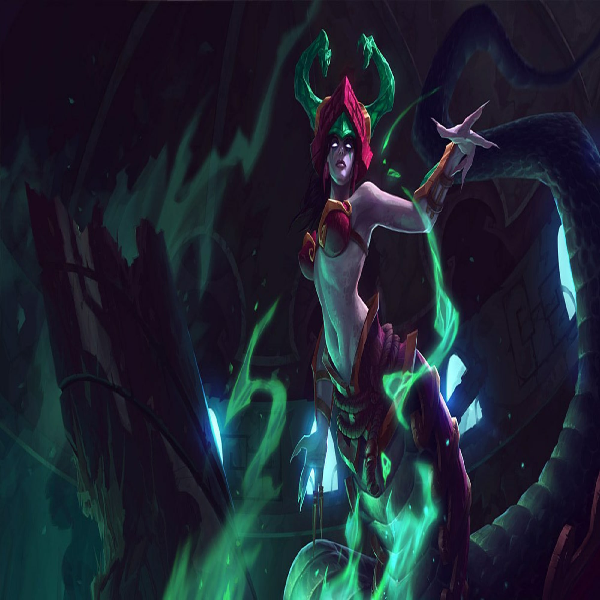

array([[0., 0., 0., 0., 1.]], dtype=float32)

4

In [61]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image

img = image.load_img('some_image.jpg', target_size=(600, 600))
display(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#images = np.vstack([x])
display(model.predict(x))
np.flip(np.argsort(model.predict(x)))[0][0]